# **DSML Coursework** #

# ***PART A: Attribution-Jacob Abraham Palakunnathu***

Basic Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyproj 
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

Import Dataset

Link to the dataset: https://www.kaggle.com/datasets/jboysen/london-fire

In [2]:
df_raw = pd.read_csv("london_fire_brigade_service_calls.csv")

Structure

In [3]:
print("Dataset Info:")
print(df_raw.info())
df_raw.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32247 entries, 0 to 32246
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   address_qualifier                           32247 non-null  object 
 1   borough_code                                32247 non-null  object 
 2   borough_name                                32247 non-null  object 
 3   cal_year                                    32247 non-null  int64  
 4   date_of_call                                32247 non-null  object 
 5   easting_m                                   16836 non-null  float64
 6   easting_rounded                             32247 non-null  int64  
 7   first_pump_arriving_attendance_time         30428 non-null  float64
 8   first_pump_arriving_deployed_from_station   30428 non-null  object 
 9   frs                                         32247 non-null  object 
 

address_qualifier borough_code    borough_name  cal_year  \
0       Within same building    E09000007          CAMDEN      2017   
1       Within same building    E09000025          NEWHAM      2017   
2  Correct incident location    E09000031  WALTHAM FOREST      2017   
3       Within same building    E09000009          EALING      2017   
4  Correct incident location    E09000032      WANDSWORTH      2017   

  date_of_call  easting_m  easting_rounded  \
0   2017-01-20   529459.0           529450   
1   2017-04-21        NaN           539650   
2   2017-01-20   536990.0           536950   
3   2017-03-07   516686.0           516650   
4   2017-02-04   524266.0           524250   

   first_pump_arriving_attendance_time  \
0                                359.0   
1                                211.0   
2                                  NaN   
3                                295.0   
4                                533.0   

  first_pump_arriving_deployed_from_station     frs  ...  \
0                                    Euston  London  ...   
1                                 Stratford  London  ...   
2                                       NaN  London  ...   
3                                    Ealing  London  ...   
4                                 Battersea  London  ...   

                                       property_type  \
0                               Purpose built office   
1  Purpose Built Flats/Maisonettes - Up to 3 storeys   
2                            Local Government Office   
3                               Underground car park   
4                                   Pub/wine bar/bar   

  second_pump_arriving_attendance_time  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                660.0   
4                                  NaN   

  second_pump_arriving_deployed_from_station             special_service_type  \
0                                        NaN                              NaN   
1                                        NaN      No action (not false alarm)   
2                                        NaN                     Lift Release   
3                                   Southall     Hazardous Materials incident   
4                                        NaN  Medical Incident - Co-responder   

   stop_code_description  time_of_call    timestamp_of_call  ward_code  \
0                    AFA      08:57:38  2017-01-20 08:57:38  E05000129   
1        Special Service      17:42:29  2017-04-21 17:42:29  E05000494   
2        Special Service      18:21:32  2017-01-20 18:21:32  E05000608   
3        Special Service      11:27:50  2017-03-07 11:27:50  E05000192   
4        Special Service      17:31:10  2017-02-04 17:31:10  E05000625   

        ward_name   ward_name_new  
0      BLOOMSBURY      BLOOMSBURY  
1        WEST HAM        WEST HAM  
2  WILLIAM MORRIS  WILLIAM MORRIS  
3         WALPOLE         WALPOLE  
4     THAMESFIELD     THAMESFIELD  

[5 rows x 32 columns]

In [4]:
print(df_raw.describe())

       cal_year      easting_m  easting_rounded  \
count   32247.0   16836.000000     32247.000000   
mean     2017.0  530667.828582    530641.174373   
std         0.0   10436.093085      9855.434367   
min      2017.0  493654.000000    492450.000000   
25%      2017.0  525061.000000    525150.000000   
50%      2017.0  530716.000000    530850.000000   
75%      2017.0  536994.500000    536450.000000   
max      2017.0  560804.000000    563150.000000   

       first_pump_arriving_attendance_time  hour_of_call     northing_m  \
count                         30428.000000  32247.000000   16836.000000   
mean                            318.230380     13.465222  180366.958363   
std                             136.384571      6.152739    7534.304839   
min                               2.000000      0.000000  152868.000000   
25%                             232.000000      9.000000  175863.000000   
50%                             298.000000     14.000000  180962.000000   
75%            

In [5]:
df_raw.describe(include=['object', 'category'])

address_qualifier borough_code borough_name date_of_call  \
count                       32247        32247        32247        32247   
unique                         11           34           34          120   
top     Correct incident location    E09000033  WESTMINSTER   2017-02-23   
freq                        19267         2469         2469          525   

       first_pump_arriving_deployed_from_station     frs incident_group  \
count                                      30428   32247          32247   
unique                                       103       2              3   
top                                         Soho  London    False Alarm   
freq                                        1205   32078          15732   

        incident_number incident_station_ground postcode_district  ...  \
count             32247                   32247             32247  ...   
unique            32247                     103               318  ...   
top     008148-20012017                    Soho               CR0  ...   
freq                  1                    1247               612  ...   

       property_category                                     property_type  \
count              32247                                             32247   
unique                 9                                               260   
top             Dwelling  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
freq               15240                                              3823   

       second_pump_arriving_deployed_from_station special_service_type  \
count                                       11966                10081   
unique                                        102                   21   
top                                          Soho             Flooding   
freq                                          375                 2061   

       stop_code_description time_of_call    timestamp_of_call  ward_code  \
count                  32247        32247                32247      32247   
unique                     9        26274                32236        655   
top                      AFA     18:03:40  2017-03-14 10:57:56  E05000649   
freq                   11811            6                    2        623   

       ward_name ward_name_new  
count      32247         32247  
unique       631           631  
top     WEST END      WEST END  
freq         623           623  

[4 rows x 22 columns]

Data Dictionary

In [6]:
dd = pd.DataFrame({
    'dtype': df_raw.dtypes,
    'n_unique': df_raw.nunique(),
    'pct_missing': df_raw.isna().mean().mul(100).round(2)
})
dd


dtype  n_unique  pct_missing
address_qualifier                            object        11         0.00
borough_code                                 object        34         0.00
borough_name                                 object        34         0.00
cal_year                                      int64         1         0.00
date_of_call                                 object       120         0.00
easting_m                                   float64     12184        47.79
easting_rounded                               int64       571         0.00
first_pump_arriving_attendance_time         float64       984         5.64
first_pump_arriving_deployed_from_station    object       103         5.64
frs                                          object         2         0.00
hour_of_call                                  int64        24         0.00
incident_group                               object         3         0.00
incident_number                              object     32247         0.00
incident_station_ground                      object       103         0.00
northing_m                                  float64     11251        47.79
northing_rounded                              int64       451         0.00
num_pumps_attending                         float64         7         0.21
num_stations_with_pumps_attending           float64         6         0.21
postcode_district                            object       318         0.00
postcode_full                                object     11854        47.79
proper_case                                  object        34         0.00
property_category                            object         9         0.00
property_type                                object       260         0.00
second_pump_arriving_attendance_time        float64       898        62.89
second_pump_arriving_deployed_from_station   object       102        62.89
special_service_type                         object        21        68.74
stop_code_description                        object         9         0.00
time_of_call                                 object     26274         0.00
timestamp_of_call                            object     32236         0.00
ward_code                                    object       655         0.00
ward_name                                    object       631         0.00
ward_name_new                                object       631         0.00

First we will create a copy of the df for further analysis.

In [7]:
df = df_raw.copy()

Comparing similar columns

In [8]:
print((df['borough_name'].str.lower().eq(df['proper_case'].str.lower())).all())

True


Deciding rows to drop.  
1. frs != "London" - very few and London calls being the subject of study  
2. missing num_pumps_attending - >1% missing values

In [9]:
df = df.loc[(df['frs'] == 'London') & (df['num_pumps_attending'].notna())].reset_index(drop=True)

In [10]:
df.head()

address_qualifier borough_code    borough_name  cal_year  \
0       Within same building    E09000007          CAMDEN      2017   
1       Within same building    E09000025          NEWHAM      2017   
2  Correct incident location    E09000031  WALTHAM FOREST      2017   
3       Within same building    E09000009          EALING      2017   
4  Correct incident location    E09000032      WANDSWORTH      2017   

  date_of_call  easting_m  easting_rounded  \
0   2017-01-20   529459.0           529450   
1   2017-04-21        NaN           539650   
2   2017-01-20   536990.0           536950   
3   2017-03-07   516686.0           516650   
4   2017-02-04   524266.0           524250   

   first_pump_arriving_attendance_time  \
0                                359.0   
1                                211.0   
2                                  NaN   
3                                295.0   
4                                533.0   

  first_pump_arriving_deployed_from_station     frs  ...  \
0                                    Euston  London  ...   
1                                 Stratford  London  ...   
2                                       NaN  London  ...   
3                                    Ealing  London  ...   
4                                 Battersea  London  ...   

                                       property_type  \
0                               Purpose built office   
1  Purpose Built Flats/Maisonettes - Up to 3 storeys   
2                            Local Government Office   
3                               Underground car park   
4                                   Pub/wine bar/bar   

  second_pump_arriving_attendance_time  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                660.0   
4                                  NaN   

  second_pump_arriving_deployed_from_station             special_service_type  \
0                                        NaN                              NaN   
1                                        NaN      No action (not false alarm)   
2                                        NaN                     Lift Release   
3                                   Southall     Hazardous Materials incident   
4                                        NaN  Medical Incident - Co-responder   

   stop_code_description  time_of_call    timestamp_of_call  ward_code  \
0                    AFA      08:57:38  2017-01-20 08:57:38  E05000129   
1        Special Service      17:42:29  2017-04-21 17:42:29  E05000494   
2        Special Service      18:21:32  2017-01-20 18:21:32  E05000608   
3        Special Service      11:27:50  2017-03-07 11:27:50  E05000192   
4        Special Service      17:31:10  2017-02-04 17:31:10  E05000625   

        ward_name   ward_name_new  
0      BLOOMSBURY      BLOOMSBURY  
1        WEST HAM        WEST HAM  
2  WILLIAM MORRIS  WILLIAM MORRIS  
3         WALPOLE         WALPOLE  
4     THAMESFIELD     THAMESFIELD  

[5 rows x 32 columns]

Let's impute the values of easting and northing with the corresponding rounded values

In [11]:
df['easting_m']  = df['easting_m'].fillna(df['easting_rounded'])
df['northing_m'] = df['northing_m'].fillna(df['northing_rounded'])

Creating parsed datetime column

In [12]:
df['call_datetime'] = pd.to_datetime(df['timestamp_of_call'])

Deciding columns to drop.  
1. borough_code, ward_code, incident_number - Identifiers  
2. cal_year - constant  
3. easting_rounded, northing_rounded - Already imputed northing and easting columns present
4. frs - constant
5. postcode_full - High cardinality, almost 50 percent missing  
6. proper_case - duplicate of borough_name  
7. second_pump_arriving_attendance_time, second_pump_arriving_deployed_from_station - Lots of missing values and not relevant to our models  
8. 'date_of_call','time_of_call','timestamp_of_call', 'hour_of_call' - call_datetime can replace all these and re-derive required temporal features for consistency  
9. ward_name, ward_name_new - Highly granular, already have other geospatial features

In [13]:
to_drop = [
    'borough_code','ward_code','incident_number',
    'cal_year','frs',
    'second_pump_arriving_attendance_time',
    'second_pump_arriving_deployed_from_station',
    'easting_rounded','northing_rounded',
    'date_of_call','time_of_call','timestamp_of_call','hour_of_call',
    'postcode_full','proper_case',
    'ward_name_new',
]

df.drop(columns=to_drop, inplace=True)

In [14]:
print("New shape:", df.shape)

New shape: (32013, 17)


Renaming columns 

In [15]:
df.rename(columns={
    'easting_m': 'easting',
    'northing_m': 'northing',
    'num_pumps_attending': 'n_pumps',
    'num_stations_with_pumps_attending': 'n_stations',
    'first_pump_arriving_attendance_time': 'first_response_secs',
    'first_pump_arriving_deployed_from_station': 'first_response_station'
}, inplace=True)

The final structure

In [16]:
print("Final shape:", df.shape)
print("Columns:", df.columns.tolist())

Final shape: (32013, 17)
Columns: ['address_qualifier', 'borough_name', 'easting', 'first_response_secs', 'first_response_station', 'incident_group', 'incident_station_ground', 'northing', 'n_pumps', 'n_stations', 'postcode_district', 'property_category', 'property_type', 'special_service_type', 'stop_code_description', 'ward_name', 'call_datetime']


In [17]:
missing_values = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
print(missing_values[missing_values > 0])


Percentage of missing values in each column:
first_response_secs        4.951114
first_response_station     4.951114
special_service_type      68.850155
dtype: float64


We can explore a little more before imputing the missing values.

In [18]:
print(df.loc[df['special_service_type'].isna(), 'incident_group'].value_counts())

incident_group
False Alarm    15669
Fire            6372
Name: count, dtype: int64


All missing special_service_type rows are for non special service requests. Imputing with "None"

In [19]:
df['special_service_type'] = df['special_service_type'].fillna('None')

### Feature Extraction and EDA ###

Extracting temporal features

In [20]:
df['call_hour']      = df['call_datetime'].dt.hour
df['call_dayofweek'] = df['call_datetime'].dt.dayofweek   # Monday=0

Before extracting spatial features, let's see how response times are scattered spatially. Binning the response times into quantiles.

In [21]:
df['rt_q'] = pd.qcut(df['first_response_secs'], 5, labels=False, duplicates='drop')

Spatial RT map. Fastest-0 to Slowest-4

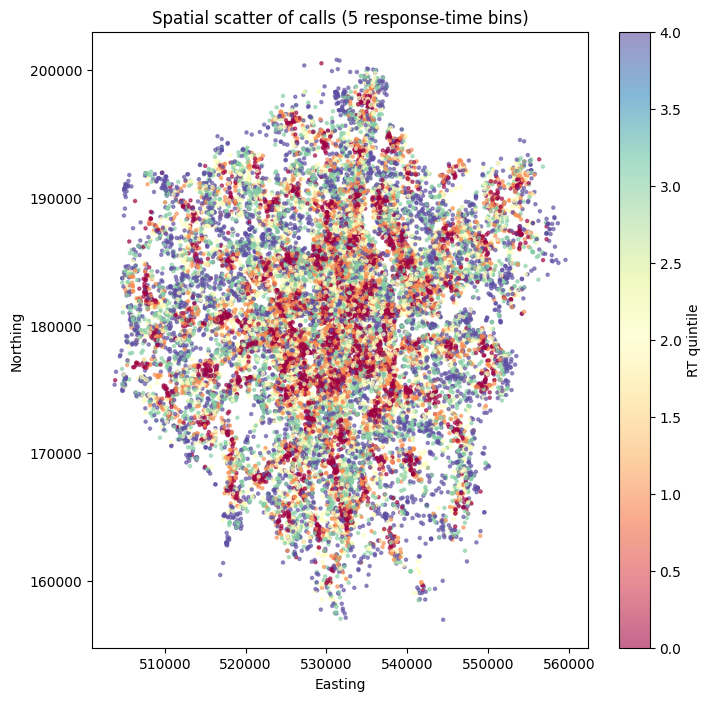

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(df['easting'], df['northing'],
            c=df['rt_q'], cmap='Spectral', s=5, alpha=0.6)
plt.title("Spatial scatter of calls (5 response‑time bins)")
plt.xlabel("Easting"); plt.ylabel("Northing")
plt.colorbar(label='RT quintile')
plt.show()

This shows a lower response clustered towards the center hinting that the distance from the center could be a strong predictor. Some research shows the center of London to be approximately E 531331, N 179646. We can use this to find the distance from center.

In [23]:
centre_e, centre_n = 531331, 179646

df['dist_to_centre'] = np.sqrt((df['easting'] - centre_e)**2 + (df['northing'] - centre_n)**2)


df['dist_to_centre'].describe()

count    32013.000000
mean     10662.385108
std       6138.434239
min         19.416488
25%       5683.214671
50%       9935.824525
75%      15084.733243
max      30069.467737
Name: dist_to_centre, dtype: float64

Binning into deciles

In [24]:
df['dist_decile'] = pd.qcut(df['dist_to_centre'], 10, labels=False)

Plotting average response time by distance band

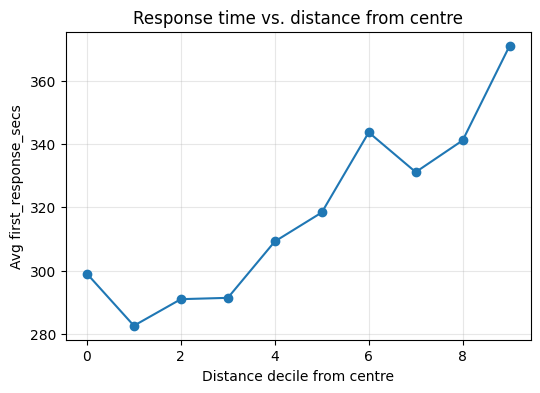

In [25]:
rt_by_dist = df.groupby('dist_decile')['first_response_secs'].mean()

plt.figure(figsize=(6,4))
rt_by_dist.plot(marker='o')
plt.xlabel('Distance decile from centre')
plt.ylabel('Avg first_response_secs')
plt.title('Response time vs. distance from centre')
plt.grid(alpha=0.3)
plt.show()

There's clearly an upward trend.

We can look at neighbourhood effects by creating 2km bins

In [26]:
bin_size = 2000
df['e_bin'] = (df['easting']  // bin_size).astype(int)
df['n_bin'] = (df['northing'] // bin_size).astype(int)
df['grid_id'] = df['e_bin'].astype(str) + '_' + df['n_bin'].astype(str)

Finding Average response time by grid cell

In [27]:
grid_rt = df.groupby('grid_id')['first_response_secs'].mean().reset_index()

df_plot = df[['easting','northing','grid_id']].merge(grid_rt, on='grid_id')

Scatter coloured by grid mean RT

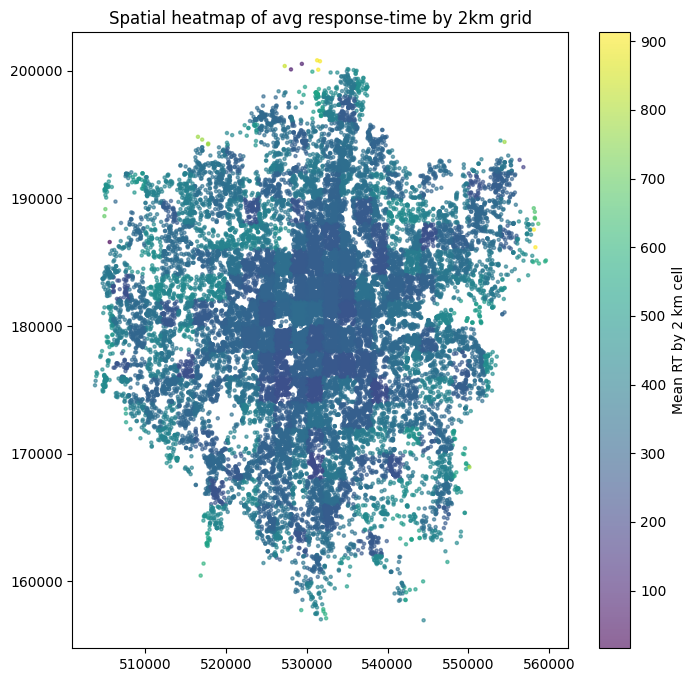

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(df_plot['easting'], df_plot['northing'],
            c=df_plot['first_response_secs'], cmap='viridis', s=5, alpha=0.6)
plt.colorbar(label='Mean RT by 2 km cell')
plt.title('Spatial heatmap of avg response-time by 2km grid')
plt.show()

Benchmarking against boroughs

In [29]:
borough_rt = df.groupby('borough_name')['first_response_secs'].mean().sort_values()

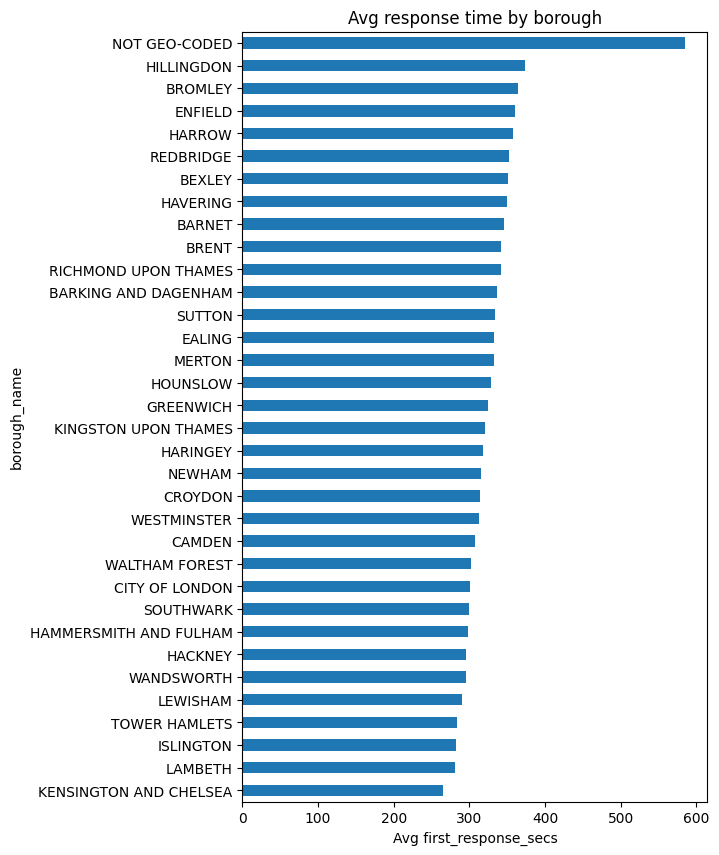

In [30]:
plt.figure(figsize=(6,10))
borough_rt.plot(kind='barh')
plt.xlabel('Avg first_response_secs')
plt.title('Avg response time by borough')
plt.show()

NOT GEOCODED values seem to be assigned as a dummy borough name for cases when proper postcode/easting,northing values could not be assigned. Let's see how many NOT GEOCODED records there are

In [31]:
n_not_geo = (df['borough_name'] == 'NOT GEO-CODED').sum()
print(n_not_geo)

9


Considering the jump in response time, and being very few in number we can drop these rows

In [32]:
df = df[df['borough_name'] != 'NOT GEO-CODED'].reset_index(drop=True)

Temporal Analysis

Call volume by hour

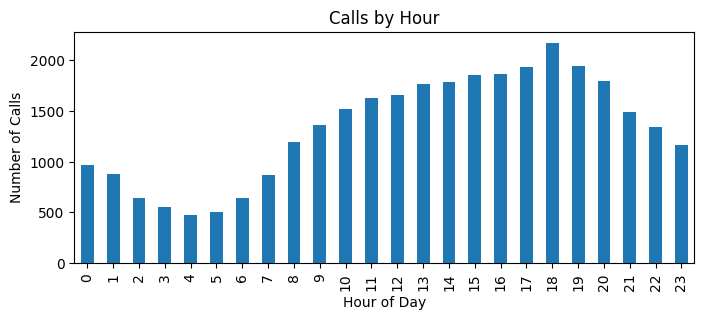

In [33]:
calls_per_hour = df['call_hour'].value_counts().sort_index()
calls_per_hour.plot(kind='bar', figsize=(8,3))
plt.xlabel('Hour of Day'); plt.ylabel('Number of Calls')
plt.title('Calls by Hour')
plt.show()

Call volume clearly dips overnight (min around 4–5 AM) then climbs steadily to an early‐evening peak around 6–7 PM

Calls volume by day of week

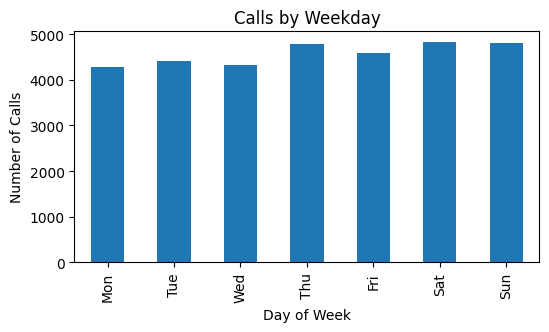

In [34]:
calls_per_dow = df['call_dayofweek'].value_counts().sort_index()
calls_per_dow.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(6,3))
calls_per_dow.plot(kind='bar')
plt.xlabel('Day of Week'); plt.ylabel('Number of Calls')
plt.title('Calls by Weekday')
plt.show()

Average resonse time by hour

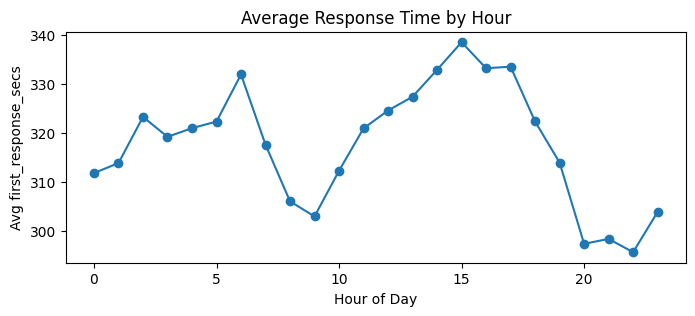

In [35]:
avg_rt_hour = df.groupby('call_hour')['first_response_secs'].mean()

plt.figure(figsize=(8,3))
avg_rt_hour.plot(marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Avg first_response_secs')
plt.title('Average Response Time by Hour')
plt.show()

That afternoon peak around 15:00 really stands out, likely when traffic is heaviest—while the late‑evening hours (around 20–21:00) actually see the fastest attendance

Response time by day of week

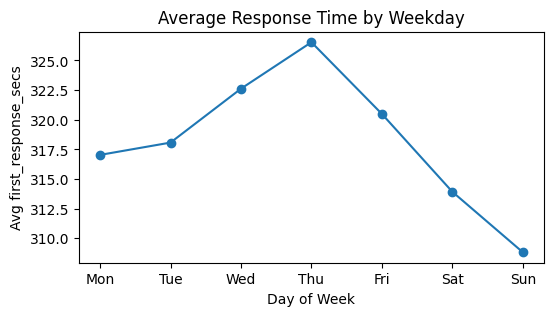

In [36]:
avg_rt_dow = df.groupby('call_dayofweek')['first_response_secs'].mean()
avg_rt_dow.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(6,3))
avg_rt_dow.plot(marker='o')
plt.xlabel('Day of Week'); plt.ylabel('Avg first_response_secs')
plt.title('Average Response Time by Weekday')
plt.show()  

We can see that response times are slower mid‑week (peak on Thursday) and faster on weekends

Day of week x hour of day x response time

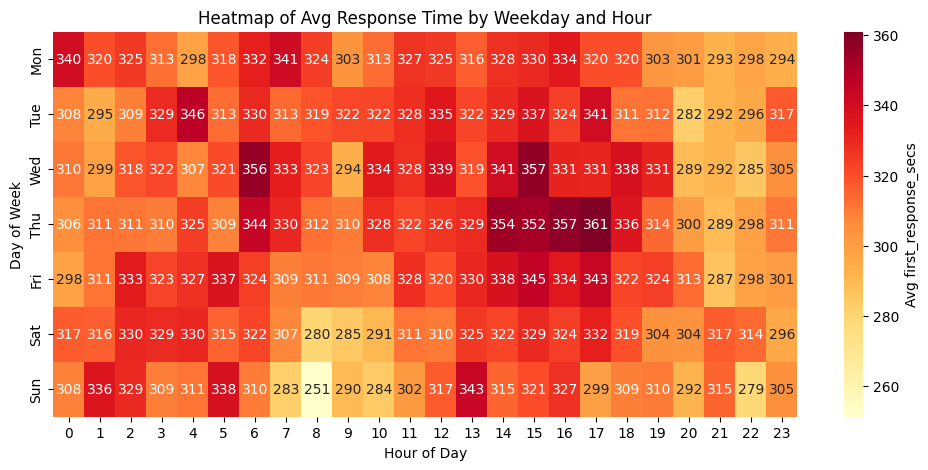

In [37]:
pivot = (df.groupby(['call_dayofweek', 'call_hour'])['first_response_secs'].mean().unstack(level='call_hour'))

pivot.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".0f", cbar_kws={'label':'Avg first_response_secs'})
plt.title('Heatmap of Avg Response Time by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

Day of week x hour of day x call volume

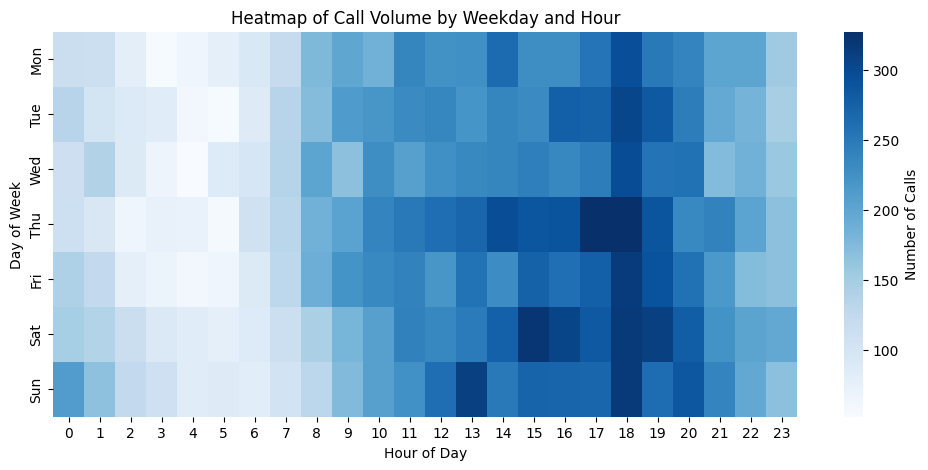

In [38]:
pivot_counts = (df.groupby(['call_dayofweek','call_hour']).size().unstack(level='call_hour'))

pivot_counts.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(12,5))
sns.heatmap(pivot_counts,cmap='Blues',fmt='d', cbar_kws={'label':'Number of Calls'})
plt.title('Heatmap of Call Volume by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

Mid‑week afternoons (Wed/Thu 14:00–18:00) are the slowest slots (deep reds), peaking around Thu 16–17h at ~360 s.  
Weekend evenings and late nights (Fri–Sat 19–22h) are comparatively faster (lighter oranges), despite high volumes.  
  
Thu 17–18h has the absolute highest call counts (darkest blues), coinciding with that slowest RT window.  
Sat 14–18h and Sun 14–18h also show huge call volumes, but the response times there are more moderate—suggesting maybe more available capacity or different traffic patterns

First Response Time Distibution

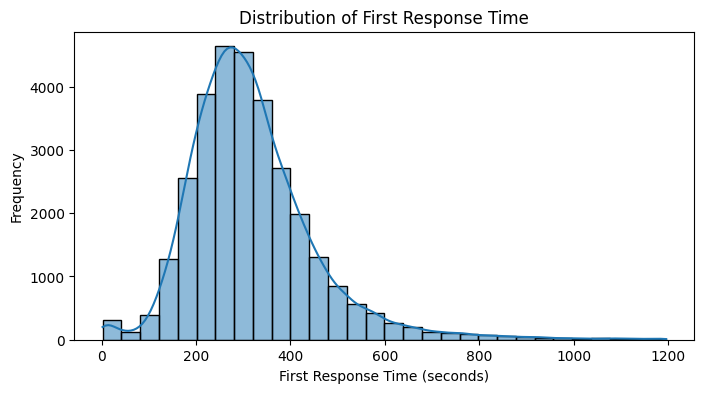

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(df['first_response_secs'].dropna(), bins=30, kde=True, edgecolor='black')
plt.xlabel('First Response Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of First Response Time')
plt.show()

Distribution of pump counts

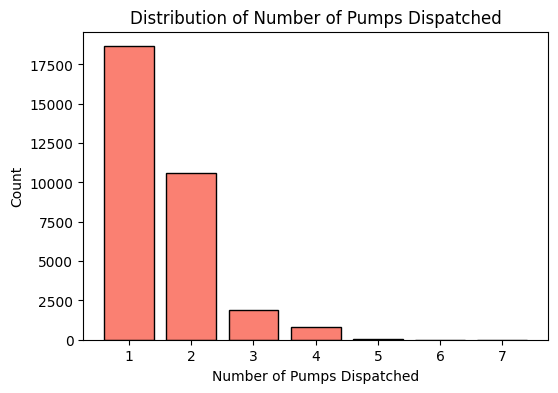

In [40]:
pump_counts = df['n_pumps'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(pump_counts.index, pump_counts.values, color='salmon', edgecolor='black')
plt.xlabel('Number of Pumps Dispatched')
plt.ylabel('Count')
plt.title('Distribution of Number of Pumps Dispatched')
plt.xticks(pump_counts.index)
plt.show()

Response time is right‑skewed (long tail out past 800 s)  
Pump counts are heavily concentrated at 1 or 2 pumps (very few 4+).

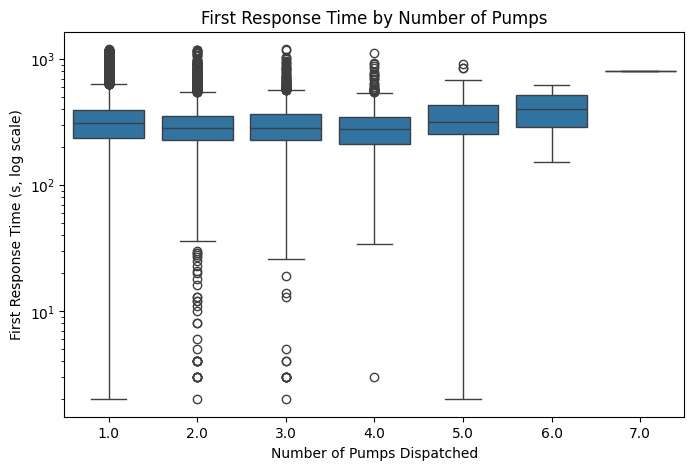

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='n_pumps', y='first_response_secs', data=df)
plt.yscale('log')
plt.title('First Response Time by Number of Pumps')
plt.xlabel('Number of Pumps Dispatched')
plt.ylabel('First Response Time (s, log scale)')
plt.show()

In [42]:
pump_stats = (df.groupby('n_pumps')['first_response_secs'].agg(['count','mean','median']).rename(columns={'count':'calls','mean':'mean_rt','median':'med_rt'}).reset_index())
print(pump_stats)

   n_pumps  calls     mean_rt  med_rt
0      1.0  17134  330.985876   310.0
1      2.0  10515  300.892439   285.0
2      3.0   1897  306.086452   285.0
3      4.0    821  295.336175   279.0
4      5.0     43  366.720930   316.0
5      6.0      8  394.750000   404.5
6      7.0      1  805.000000   805.0


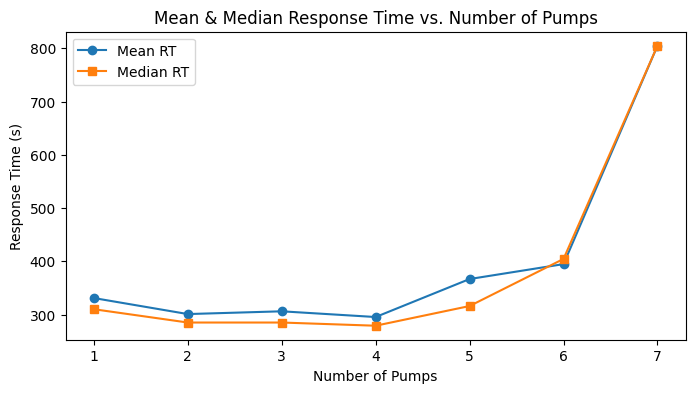

In [43]:
plt.figure(figsize=(8,4))
plt.plot(pump_stats['n_pumps'], pump_stats['mean_rt'], marker='o', label='Mean RT')
plt.plot(pump_stats['n_pumps'], pump_stats['med_rt'], marker='s', label='Median RT')
plt.title('Mean & Median Response Time vs. Number of Pumps')
plt.xlabel('Number of Pumps')
plt.ylabel('Response Time (s)')
plt.legend()
plt.show()

Choropleth

Loading GeoJSON shapefile

In [44]:
boroughs = gpd.read_file('London_Borough_Excluding_MHW.shp')
boroughs = boroughs.to_crs(epsg=27700)
print(boroughs.columns.tolist())

['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009', 'SUB_2006', 'geometry']


Converting to GeoDataFrame

In [45]:
gdf = gpd.GeoDataFrame(df, geometry=df.apply(lambda r: Point(r.easting, r.northing), axis=1), crs="EPSG:27700")

Spatial-join calls to boroughs

In [46]:
gdf = gpd.sjoin(gdf, boroughs[['NAME','geometry']], how='left', predicate='within')

Aggregating and merging average response times values to boroughs

In [47]:
agg = (gdf.groupby('NAME')['first_response_secs'].mean().reset_index().rename(columns={'first_response_secs':'avg_rt'}))

boroughs = boroughs.merge(agg, on='NAME')

Plotting the choropleth

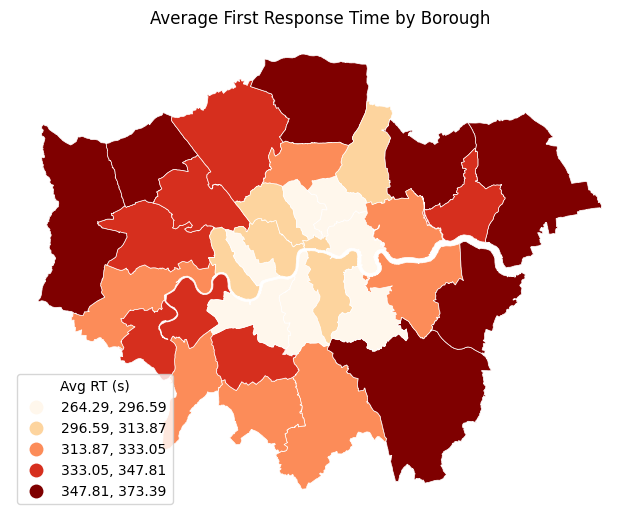

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
boroughs.plot(column='avg_rt', cmap='OrRd', scheme='Quantiles', k=5, edgecolor='white', linewidth=0.5, legend=True, legend_kwds={'title': 'Avg RT (s)', 'loc': 'lower left'}, ax=ax)
ax.set_title('Average First Response Time by Borough')
ax.axis('off')
plt.show()


Building temporal index for spatio-temporal cube

In [49]:
df['hour_of_week'] = df['call_dayofweek'] * 24 + df['call_hour']

Spatio-Temporal cube - each bin is the hour of the week for a specific borough

In [50]:
cube = (df.groupby(['borough_name','hour_of_week']).agg(
    calls_in_bin     = ('first_response_secs','size'),
    avg_rt_in_bin    = ('first_response_secs','mean'),
    med_pumps_in_bin = ('n_pumps','median')
    ).reset_index()
)

In [51]:
cube.head(10)

borough_name  hour_of_week  calls_in_bin  avg_rt_in_bin  \
0  BARKING AND DAGENHAM             0             4     341.666667   
1  BARKING AND DAGENHAM             1             4     386.250000   
2  BARKING AND DAGENHAM             2             3     290.333333   
3  BARKING AND DAGENHAM             3             1     292.000000   
4  BARKING AND DAGENHAM             4             1     273.000000   
5  BARKING AND DAGENHAM             5             1     321.000000   
6  BARKING AND DAGENHAM             6             2     397.500000   
7  BARKING AND DAGENHAM             7             2     576.500000   
8  BARKING AND DAGENHAM             8             3     346.333333   
9  BARKING AND DAGENHAM             9             4     403.666667   

   med_pumps_in_bin  
0               2.0  
1               1.0  
2               1.0  
3               1.0  
4               3.0  
5               2.0  
6               2.5  
7               2.0  
8               1.0  
9               1.0

Merging cube into original df

In [52]:
df = df.merge(cube, on=['borough_name','hour_of_week'], how='left')

In [53]:
hm = cube.pivot(index='borough_name', columns='hour_of_week', values='avg_rt_in_bin')

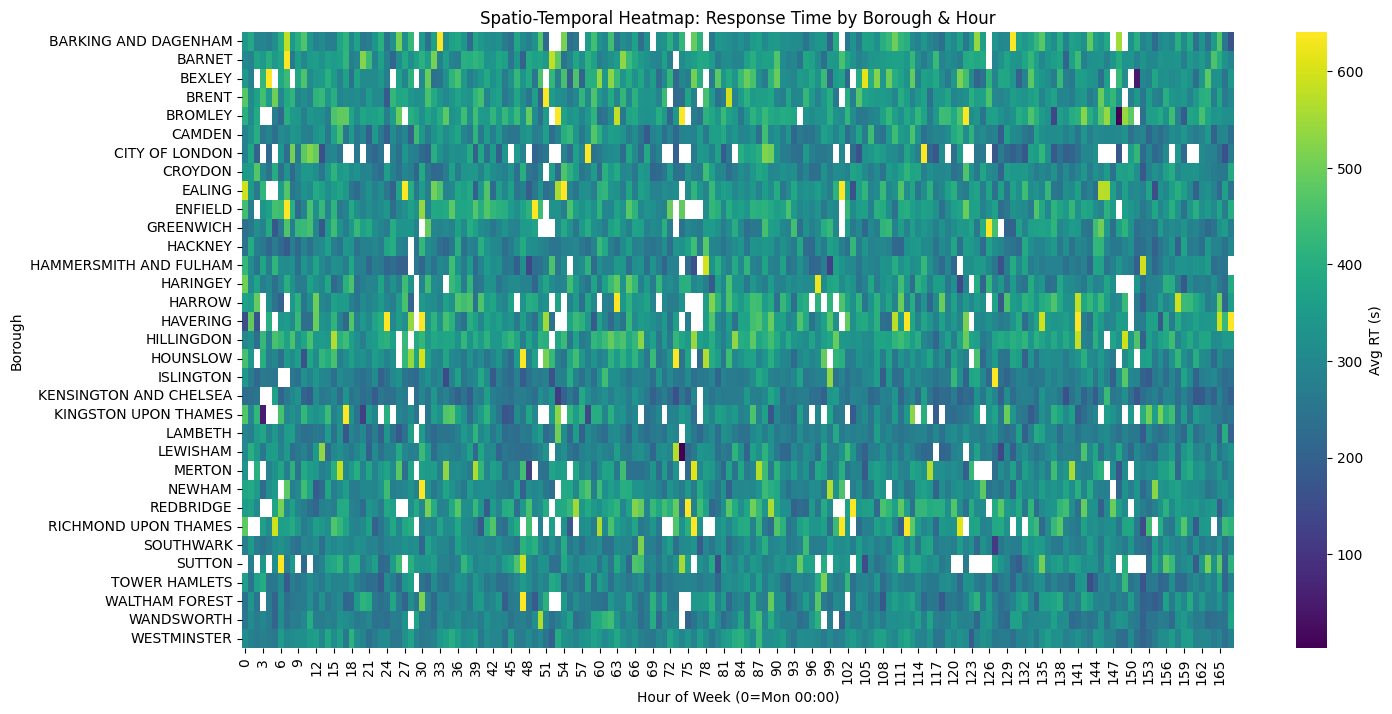

In [54]:
plt.figure(figsize=(16,8))
sns.heatmap(hm, cmap='viridis', cbar_kws={'label':'Avg RT (s)'}, vmax=hm.quantile(0.95).max())
plt.xlabel('Hour of Week (0=Mon 00:00)')
plt.ylabel('Borough')
plt.title('Spatio-Temporal Heatmap: Response Time by Borough & Hour')
plt.show()

Rush hour response time penalty

Peak hours and offpeak hours from visualisations

In [55]:
peak_hours = [16,17,18,19]
offpeak_hours = [2,3,4,5]

Aggregate avg RT by borough for peak vs off-peak

In [56]:
peak_rt = cube[(cube.hour_of_week % 24).isin(peak_hours)].groupby('borough_name').avg_rt_in_bin.mean()
off_rt  = cube[(cube.hour_of_week % 24).isin(offpeak_hours)].groupby('borough_name').avg_rt_in_bin.mean()

Compute penalty

In [57]:
rush_penalty = (peak_rt - off_rt).sort_values(ascending=False)

Plot

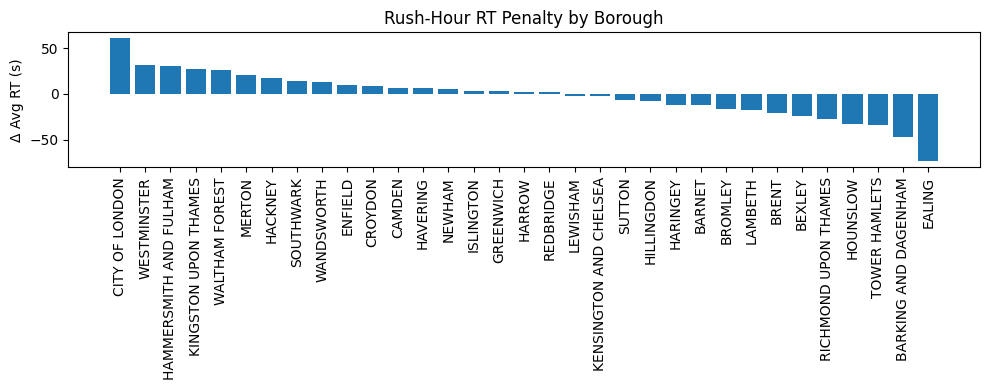

In [58]:
plt.figure(figsize=(10,4))
plt.bar(rush_penalty.index, rush_penalty.values)
plt.xticks(rotation=90)
plt.ylabel('Δ Avg RT (s)')
plt.title('Rush-Hour RT Penalty by Borough')
plt.tight_layout()
plt.show()

The biggest slowdown is in City of London, Westminster, Hammersmith & Fulham, and Kingston – nearly a minute slower on average during peak  
Outer-edge boroughs like Ealing, Barking & Dagenham actually speed up slightly (negative penalty) in the evenings, perhaps reflecting fewer daytime high-traffic issues  

Doing the same for call volume

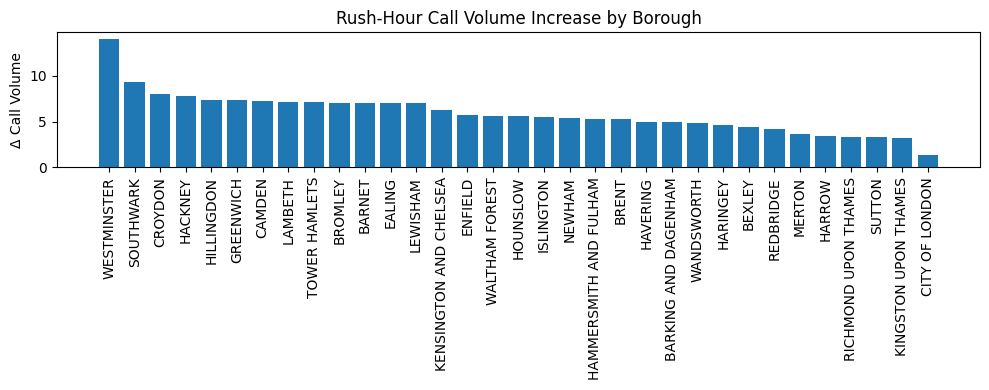

In [59]:
peak_calls = cube[(cube.hour_of_week % 24).isin(peak_hours)].groupby('borough_name').calls_in_bin.mean()
off_calls  = cube[(cube.hour_of_week % 24).isin(offpeak_hours)].groupby('borough_name').calls_in_bin.mean()

call_penalty = (peak_calls - off_calls).sort_values(ascending=False)

plt.figure(figsize=(10,4))
plt.bar(call_penalty.index, call_penalty.values)
plt.xticks(rotation=90)
plt.ylabel('Δ Call Volume')
plt.title('Rush-Hour Call Volume Increase by Borough')
plt.tight_layout()
plt.show()

Westminster and Southwark see the largest surges, followed by Croydon and London boroughs closer to the centre  
City of London has almost no increase in calls, which makes sense—it’s largely a business district rather than residential

Cluster boroughs by their full weekly spatio-temporal features

Pivot the avg response‐time profile

In [60]:
rt_profiles = cube.pivot(index='borough_name', columns='hour_of_week', values='avg_rt_in_bin')
rt_profiles = rt_profiles.apply(lambda r: r.fillna(r.mean()), axis=1)

Doing same for call volume

In [61]:
calls_profiles = cube.pivot(index='borough_name', columns='hour_of_week', values='calls_in_bin')
calls_profiles = calls_profiles.apply(lambda r: r.fillna(r.mean()), axis=1)

Same for median pumps

In [62]:
pumps_profiles = cube.pivot(index='borough_name', columns='hour_of_week', values='med_pumps_in_bin')
pumps_profiles = pumps_profiles.apply(lambda r: r.fillna(r.mean()), axis=1)

We need to put RT, calls and pump medians on the same scale or else, say, the huge call counts will dominate.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler_rt    = StandardScaler()
scaler_calls = StandardScaler()
scaler_pumps = StandardScaler()

rt_scaled    = scaler_rt.fit_transform(rt_profiles.values)
calls_scaled = scaler_calls.fit_transform(calls_profiles.values)
pumps_scaled = scaler_pumps.fit_transform(pumps_profiles.values)


 Build feature matrices for “RT only” → “RT+Calls” → “RT+Calls+Pumps”

In [64]:
X_rt        = rt_scaled
X_rt_calls  = np.hstack([rt_scaled, calls_scaled])
X_full      = np.hstack([rt_scaled, calls_scaled, pumps_scaled])

print("RT dims:", X_rt.shape)
print("RT+Calls dims:", X_rt_calls.shape)
print("Full dims:", X_full.shape)

RT dims: (33, 168)
RT+Calls dims: (33, 336)
Full dims: (33, 504)


K-means clustering

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

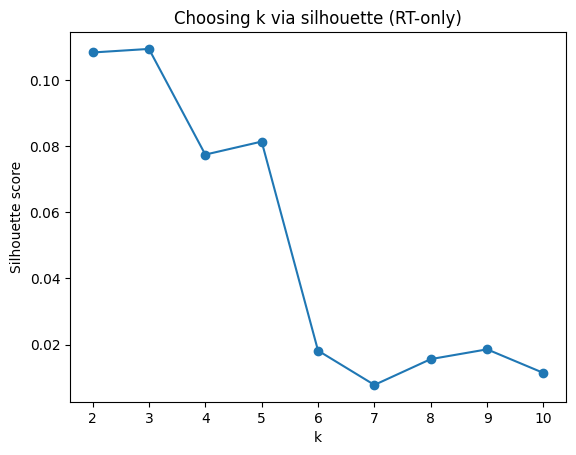

In [66]:
scores = []
Ks     = range(2,11)
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_rt)
    scores.append(silhouette_score(X_rt, km.labels_))

plt.plot(Ks, scores, '-o')
plt.xlabel('k'); plt.ylabel('Silhouette score')
plt.title('Choosing k via silhouette (RT-only)'); plt.show()

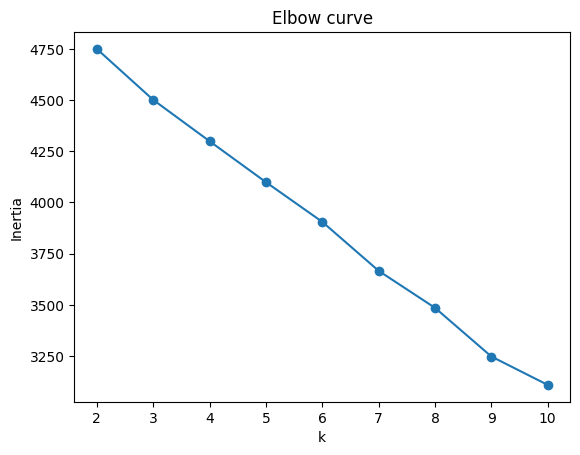

In [67]:
inertias = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_rt)
    inertias.append(km.inertia_)

plt.plot(Ks, inertias, '-o')
plt.xlabel('k'); plt.ylabel('Inertia')
plt.title('Elbow curve'); plt.show()

k=3 gives you the very best silhouette but only three borough-profiles, which may be too coarse.

k=5 boosts silhouette slightly over k=4 but you then end up with smaller, harder-to-interpret clusters (and the bump at k = 5 is marginal).

k=4 sits right at that sweet spot: you only lose a bit of silhouette (0.077 vs 0.11), inertia has already started to level off, and you get four distinct, reasonably sized clusters that are still easy to describe and map.

In [68]:
def cluster_and_score(X, k=4):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    return km.labels_, silhouette_score(X, km.labels_)

for name, X in [("RT only", X_rt),
                ("RT+Calls", X_rt_calls),
                ("Full",    X_full)]:
    labels, score = cluster_and_score(X, k=4)
    print(f"{name:10s} → silhouette = {score:.3f}")

RT only    → silhouette = 0.077
RT+Calls   → silhouette = 0.061
Full       → silhouette = 0.031


RT only give us the most coherent clustering

In [69]:
kmeans_rt = KMeans(n_clusters=4, random_state=42, n_init=10)
rt_labels = kmeans_rt.fit_predict(X_rt)

rt_profiles['cluster'] = rt_labels
print("RT-only cluster sizes:\n", rt_profiles['cluster'].value_counts())

RT-only cluster sizes:
 cluster
3    15
2    11
1     6
0     1
Name: count, dtype: int64


In [70]:
print(boroughs['NAME'].head())
print(rt_profiles.index)

0    Kingston upon Thames
1                 Croydon
2                 Bromley
3                Hounslow
4                  Ealing
Name: NAME, dtype: object
Index(['BARKING AND DAGENHAM', 'BARNET', 'BEXLEY', 'BRENT', 'BROMLEY',
       'CAMDEN', 'CITY OF LONDON', 'CROYDON', 'EALING', 'ENFIELD', 'GREENWICH',
       'HACKNEY', 'HAMMERSMITH AND FULHAM', 'HARINGEY', 'HARROW', 'HAVERING',
       'HILLINGDON', 'HOUNSLOW', 'ISLINGTON', 'KENSINGTON AND CHELSEA',
       'KINGSTON UPON THAMES', 'LAMBETH', 'LEWISHAM', 'MERTON', 'NEWHAM',
       'REDBRIDGE', 'RICHMOND UPON THAMES', 'SOUTHWARK', 'SUTTON',
       'TOWER HAMLETS', 'WALTHAM FOREST', 'WANDSWORTH', 'WESTMINSTER'],
      dtype='object', name='borough_name')


Create a matching uppercase join‐key

In [71]:
boroughs['JOIN_NAME'] = boroughs['NAME'].str.upper()

Merging into the boroughs GeoDataFrame

In [72]:
boroughs = boroughs.merge(rt_profiles['cluster'].rename('cluster'), left_on = 'JOIN_NAME', right_index = True, how = 'left')

print("After merge—missing clusters:", boroughs['cluster'].isna().sum(), "/", len(boroughs))

After merge—missing clusters: 0 / 33


Plotting the choropleth map of clusters:

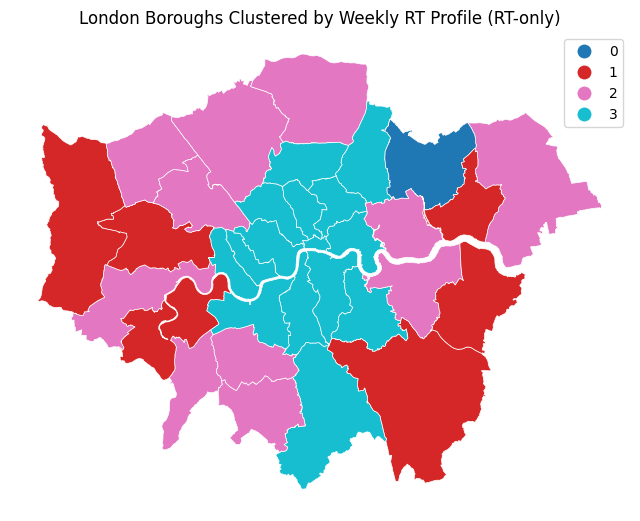

In [73]:
plot_gdf = boroughs.dropna(subset=['cluster']).copy()
plot_gdf['cluster'] = plot_gdf['cluster'].astype(int).astype(str)

fig, ax = plt.subplots(1,1, figsize=(8,8))
plot_gdf.plot(
    column      = 'cluster',
    categorical = True,
    legend      = True,
    cmap        = 'tab10',
    edgecolor   = 'white',
    linewidth   = 0.5,
    ax          = ax
)
ax.set_title('London Boroughs Clustered by Weekly RT Profile (RT-only)')
ax.axis('off')
plt.show()

In [74]:
df.head(), boroughs.head()

(           address_qualifier    borough_name   easting  first_response_secs  \
 0       Within same building          CAMDEN  529459.0                359.0   
 1       Within same building          NEWHAM  539650.0                211.0   
 2  Correct incident location  WALTHAM FOREST  536990.0                  NaN   
 3       Within same building          EALING  516686.0                295.0   
 4  Correct incident location      WANDSWORTH  524266.0                533.0   
 
   first_response_station   incident_group incident_station_ground  northing  \
 0                 Euston      False Alarm                  Euston  182009.0   
 1              Stratford  Special Service               Stratford  183750.0   
 2                    NaN  Special Service             Walthamstow  189395.0   
 3                 Ealing  Special Service                  Ealing  180225.0   
 4              Battersea  Special Service              Wandsworth  174973.0   
 
    n_pumps  n_stations  ... rt_q di

In [75]:
df = df.merge(boroughs[['JOIN_NAME','cluster']], left_on = 'borough_name', right_on= 'JOIN_NAME',how = 'left')

df = df.drop(columns='JOIN_NAME')

print(df['cluster'].value_counts(dropna=False))

cluster
3    17564
2     8872
1     4859
0      709
Name: count, dtype: int64


Cluster 0 (blue)

Concentrated mostly in inner-west boroughs (e.g. Hammersmith, Westminster).

Profile: relatively fast, consistent response times throughout the week.

Cluster 1 (red)

Outlying hotspots in south/east (e.g. Croydon, Bexley, Newham).

Profile: noticeably slower, especially during weekday peak periods.

Cluster 2 (pink)

Northern and some central boroughs (e.g. Camden, Islington).

Profile: mid-range RT with a mild weekday bump.

Cluster 3 (turquoise)

Inner boroughs clustered around the City and Southbank.

Profile: slightly faster than average, but with more variability in evenings.

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3640087779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y='first_response_secs', data=df,


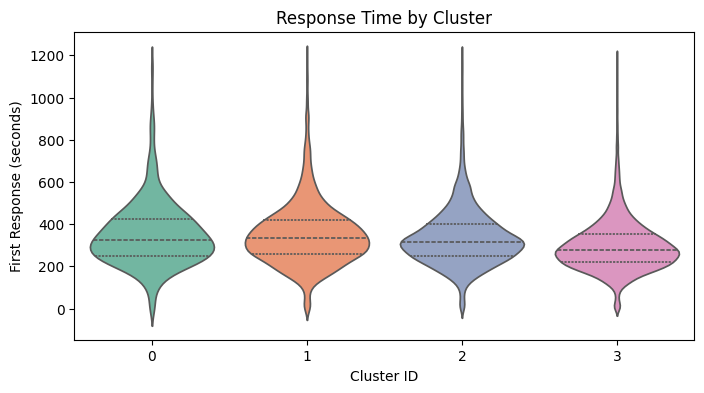

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3640087779.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='n_pumps', data=df, palette='Set3')


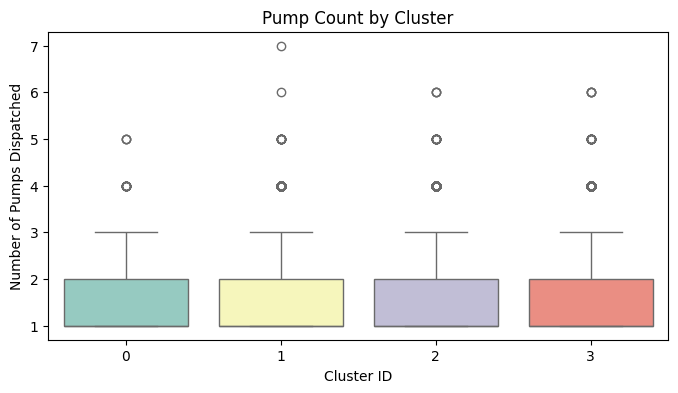

In [76]:
plt.figure(figsize=(8,4))
sns.violinplot(x='cluster', y='first_response_secs', data=df,
               inner='quartile', palette='Set2')
plt.title("Response Time by Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("First Response (seconds)")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='cluster', y='n_pumps', data=df, palette='Set3')
plt.title("Pump Count by Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Pumps Dispatched")
plt.show()

Statistical Testing

In [77]:
from scipy.stats import kruskal
import scikit_posthocs as sp

# RT
groups_rt = [grp["first_response_secs"].dropna().values
             for name, grp in df.groupby("cluster")]
H_rt, p_rt = kruskal(*groups_rt)

# Pumps
groups_p = [grp["n_pumps"].dropna().values
            for name, grp in df.groupby("cluster")]
H_p, p_p = kruskal(*groups_p)

print("RT Kruskal H=%.2f p=%.3f" % (H_rt, p_rt))
print("Pumps Kruskal H=%.2f p=%.3f" % (H_p, p_p))


RT Kruskal H=1056.10 p=0.000
Pumps Kruskal H=15.10 p=0.002


Response times differ across our four clusters (Kruskal–Wallis p≪0.001).

Pump counts also differ across clusters (Kruskal–Wallis p≈0.002).

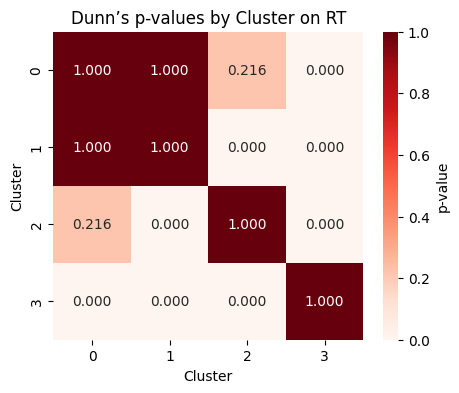

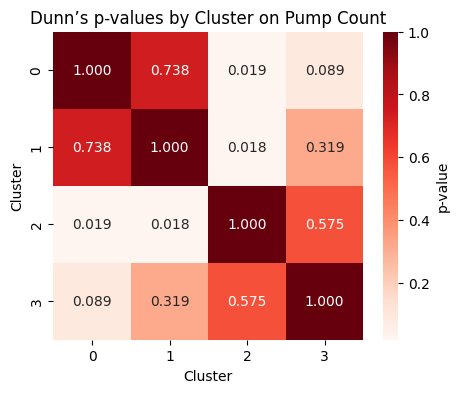

In [78]:
#-- pairwise on RT
data_rt = df[['cluster','first_response_secs']].dropna()
dunn_rt = sp.posthoc_dunn(data_rt, val_col='first_response_secs',
                          group_col='cluster', p_adjust='bonferroni')

#-- pairwise on n_pumps
data_p = df[['cluster','n_pumps']].dropna()
dunn_p  = sp.posthoc_dunn(data_p, val_col='n_pumps',
                          group_col='cluster', p_adjust='bonferroni')

# display heatmaps
for mat, title in [(dunn_rt, 'RT'), (dunn_p, 'Pump Count')]:
    plt.figure(figsize=(5,4))
    sns.heatmap(mat, annot=True, fmt='.3f', cmap='Reds', cbar_kws={'label':'p-value'})
    plt.title(f"Dunn’s p-values by Cluster on {title}")
    plt.xlabel('Cluster'); plt.ylabel('Cluster')
    plt.show()

Cluster 3 is our “fastest” RT cluster (depending on sign)—and it differs from everyone on speed.

Cluster 2 is our “high-pump” cluster—and it’s the only one that sends a different number of pumps.

That suggests you have two orthogonal phenomena:

Temporal/locational performance (RT) captured by cluster 3

Resource‐weight differences (pump count) captured by cluster 2

Residual Mapping

In [79]:
df['rt_resid'] = df['first_response_secs'] - df.groupby('cluster')['first_response_secs'].transform('mean')
df['pump_resid'] = df['n_pumps'] - df.groupby('cluster')['n_pumps'].transform('median')

### Distribution of Key Categorical Features ###

Incident Group

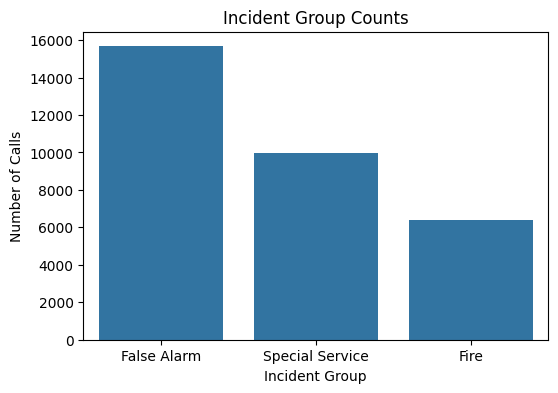

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='incident_group', order=df['incident_group'].value_counts().index)
plt.title("Incident Group Counts")
plt.ylabel("Number of Calls")
plt.xlabel("Incident Group")
plt.xticks(rotation=0)
plt.show()

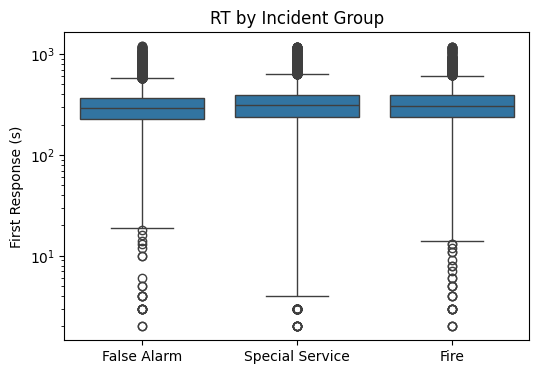

In [81]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='incident_group', y='first_response_secs', order=['False Alarm','Special Service','Fire'])
plt.yscale('log')      
plt.title('RT by Incident Group')
plt.ylabel('First Response (s)')
plt.xlabel('')
plt.show()

Boxplots (with a log‐scale y) showing that “Fire” and “Special service” calls have very similar median RTs to “False alarms” once you exclude the handful of ultra-fast (<10 s) dispatches and the long tail

Property Category

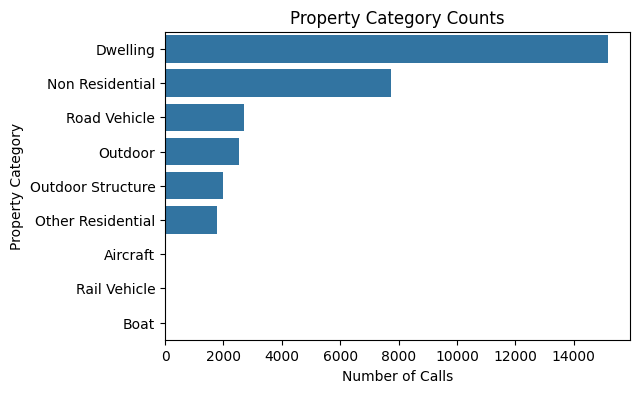

In [82]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='property_category',
              order=df['property_category'].value_counts().index)
plt.title("Property Category Counts")
plt.xlabel("Number of Calls")
plt.ylabel("Property Category")
plt.show()

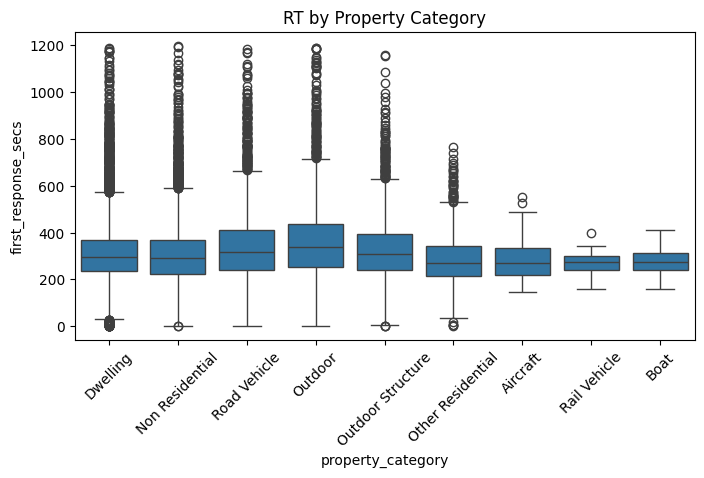

In [83]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='property_category', y='first_response_secs', 
            order=df['property_category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('RT by Property Category')
plt.show()

Dwelling calls tended to be a bit faster on average than non-residential, outdoor, vehicles, etc. but there’s a lot of overlap

Address Qualifier

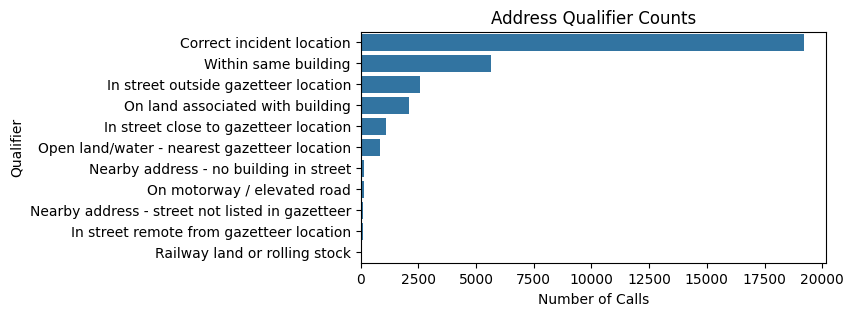

In [84]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, y='address_qualifier',
              order=df['address_qualifier'].value_counts().index)
plt.title("Address Qualifier Counts")
plt.xlabel("Number of Calls")
plt.ylabel("Qualifier")
plt.show()

RT by Top 10 Property Types

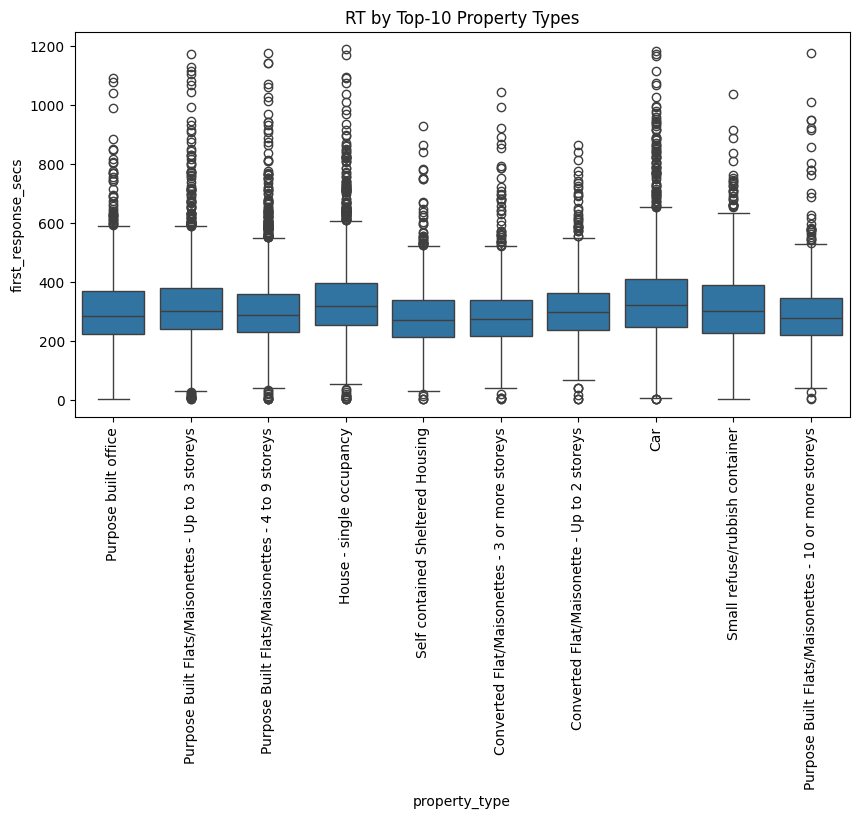

In [85]:
top10 = df['property_type'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['property_type'].isin(top10)], 
            x='property_type', y='first_response_secs')
plt.xticks(rotation=90)
plt.title('RT by Top-10 Property Types')
plt.show()

Focused on the ten most common property types (e.g. purpose-built offices, flats of various heights, cars, small refuse containers) and compared their RT distributions. Again, broadly in the 200–350 s range, with cars slightly slower

RT by Special Service Type

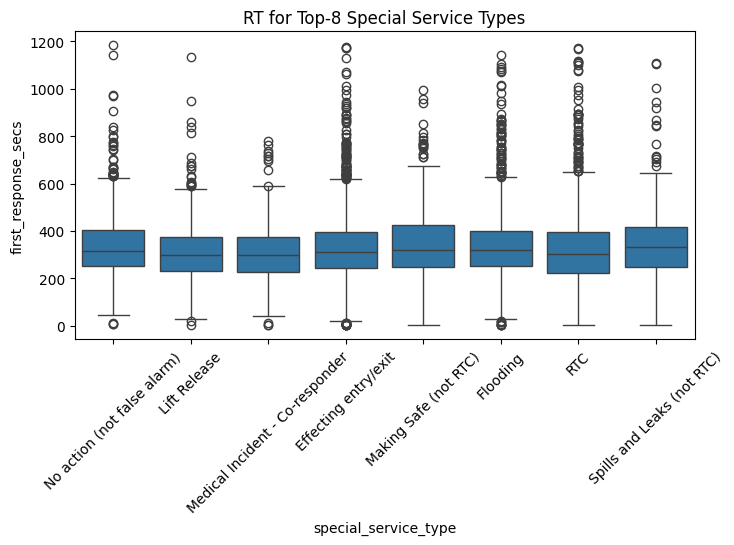

In [86]:
ss = df[df['incident_group']=='Special Service']
top_ss = ss['special_service_type'].value_counts().nlargest(8).index
plt.figure(figsize=(8,4))
sns.boxplot(data=ss[ss['special_service_type'].isin(top_ss)],
            x='special_service_type', y='first_response_secs')
plt.xticks(rotation=45)
plt.title('RT for Top-8 Special Service Types')
plt.show()


Looked at the eight most frequent special-service types (no-action false alarm, lift-release, medical co-responder, entry/exit, etc.). Lift releases and medical incidents are slightly faster, whereas flooding and RTCs skew slower

Pumps Dispatched by Category

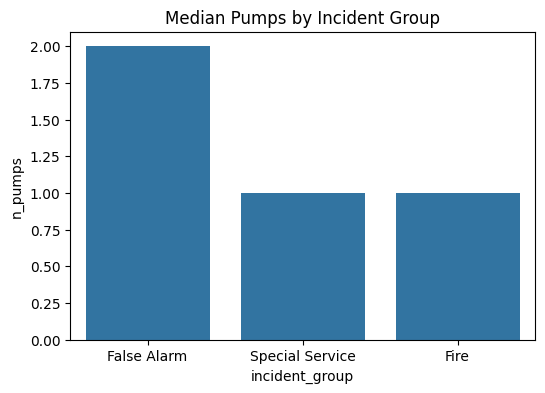

In [87]:
plt.figure(figsize=(6,4))
sns.barplot(data=df.groupby('incident_group')['n_pumps'].median().reset_index(),
            x='incident_group', y='n_pumps', order=['False Alarm','Special Service','Fire'])
plt.title('Median Pumps by Incident Group')
plt.show()

False alarms dispatch a median of 2 pumps, whereas fires and special services dispatch only 1 on median. This is probably because of the property catgory.

 RT × Incident‐Group × Property‐Category

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\1677973991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=sub, x='incident_group', y='first_response_secs', col='property_category', kind='violin', sharey=True, height=4, aspect=0.8, palette='muted')


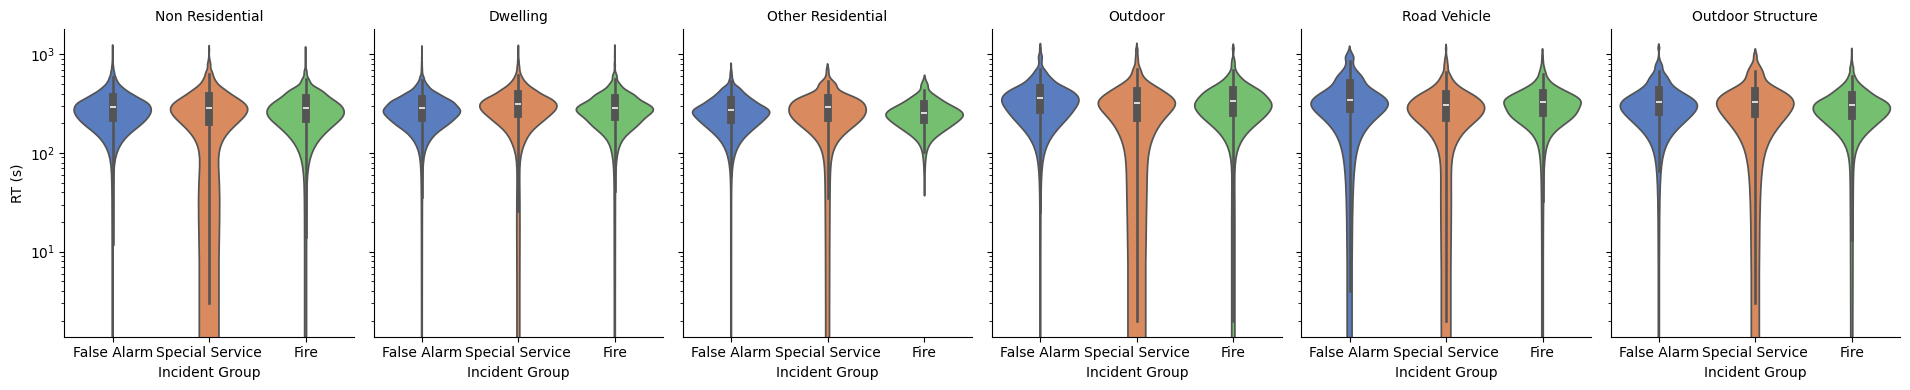

In [88]:
top6_props = df['property_category'].value_counts().nlargest(6).index.tolist()
sub = df[df['property_category'].isin(top6_props)]

g = sns.catplot(data=sub, x='incident_group', y='first_response_secs', col='property_category', kind='violin', sharey=True, height=4, aspect=0.8, palette='muted')
g.set_axis_labels("Incident Group", "RT (s)")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

Pumps × Incident‐Group × Property‐Category

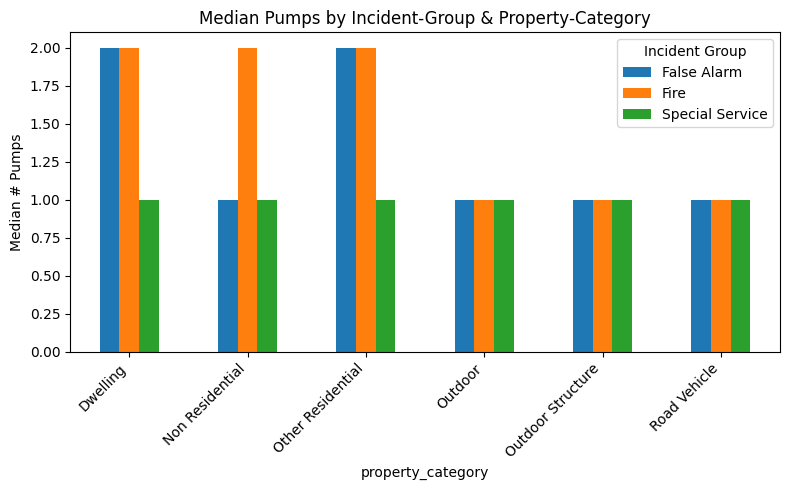

In [89]:
med = (df[df['property_category'].isin(top6_props)].groupby(['property_category','incident_group'])['n_pumps'].median().unstack())

med.plot(kind='bar', figsize=(8,5))
plt.ylabel("Median # Pumps")
plt.title("Median Pumps by Incident‐Group & Property‐Category")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Incident Group')
plt.tight_layout()
plt.show()

Dwellings & “Other Residential” almost always require 2 pumps for false alarms and fires, but only 1 for special services.

Non‐residential sites similarly need 2 pumps for fires but only 1 for special services.

All outdoor, outdoor structure and road vehicle incidents run almost exclusively with a single pump, regardless of group.

RT by address qualifier

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\2237953485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subq, y='address_qualifier', x='first_response_secs', palette='vlag')


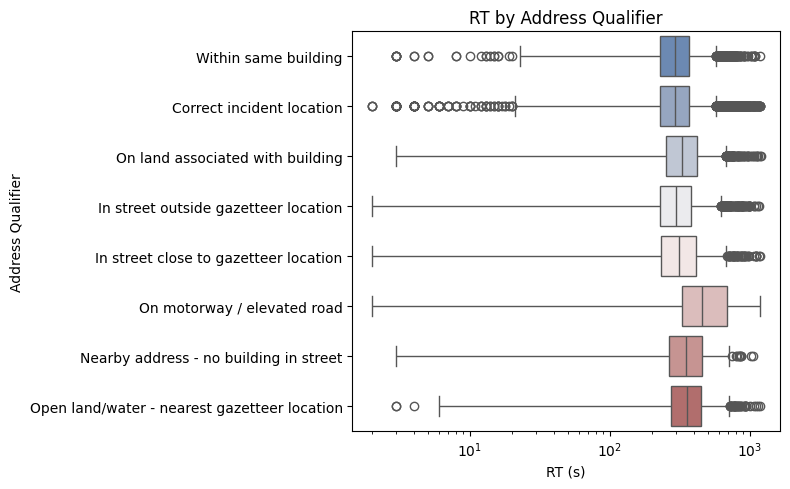

In [90]:
top8_quals = df['address_qualifier'].value_counts().nlargest(8).index
subq = df[df['address_qualifier'].isin(top8_quals)]

plt.figure(figsize=(8,5))
sns.boxplot(data=subq, y='address_qualifier', x='first_response_secs', palette='vlag')
plt.xscale('log')
plt.xlabel("RT (s)")
plt.ylabel("Address Qualifier")
plt.title("RT by Address Qualifier")
plt.tight_layout()
plt.show()

Fastest medians (lowest RTs) occur when the call is “Within same building” or at the “Correct incident location.” Crews go straight to the right door, so they get there quickest.

Intermediate medians (around 200–300 s) for qualifiers like “On land associated with building” or “In street close to gazetteer location,” where the address is roughly right but they may need a moment to find the exact entrance.

Slowest medians (300–500 s+) for “On motorway / elevated road” and “Nearby address - no building in street,” where the location is vague and crews often have to circle or wait for safe access  
  
You also notice much wider whiskers and more outliers when the qualifier is poor (“motorway,” “open land,” or “street outside gazetteer”), reflecting a lot of variability - not just slower but wildly inconsistent times

Statistical Testing

For RT

In [ ]:
# 1) Kruskal–Wallis + η²
kw_results = []
n_total = df['first_response_secs'].dropna().shape[0]

for var in ['incident_group', 'property_category', 'special_service_type', 'address_qualifier']:
    # grab our groups
    grouped = df[['first_response_secs', var]].dropna().groupby(var)['first_response_secs']
    samples = [grp.values for _, grp in grouped]
    if len(samples) > 1:
        H, p = kruskal(*samples)
        k = len(samples)
        eta2 = (H - k + 1) / (n_total - k)
        kw_results.append({'variable': var, 'H_stat': H, 'p_value': p, 'eta2': eta2})

eta2_df = pd.DataFrame(kw_results)
print("Kruskal–Wallis / η² summary:")
display(eta2_df)


# 2) Dunn’s post-hoc (only for vars with p < .05)
significant = eta2_df.loc[eta2_df['p_value'] < 0.05, 'variable'].tolist()
dunn_tables = {}

for var in significant:
    data = df[['first_response_secs', var]].dropna()
    # this returns a matrix of all pairwise p-values
    posthoc = sp.posthoc_dunn(data, val_col='first_response_secs',
                              group_col=var, p_adjust='bonferroni')
    dunn_tables[var] = posthoc

# 3) Display
for var, table in dunn_tables.items():
    print(f"\nDunn’s post-hoc for {var} (Bonferroni-adjusted p-values):")
    display(table)

Kruskal–Wallis / η² summary:


variable      H_stat        p_value      eta2
0        incident_group  174.492478   1.286589e-38  0.005671
1     property_category  441.590921   2.341441e-90  0.014258
2  special_service_type  283.706477   6.485305e-48  0.008643
3     address_qualifier  542.660845  3.333523e-110  0.017517


Dunn’s post-hoc for incident_group (Bonferroni-adjusted p-values):


False Alarm          Fire  Special Service
False Alarm      1.000000e+00  2.577512e-18     2.375700e-33
Fire             2.577512e-18  1.000000e+00     1.807167e-01
Special Service  2.375700e-33  1.807167e-01     1.000000e+00


Dunn’s post-hoc for property_category (Bonferroni-adjusted p-values):


Aircraft      Boat      Dwelling  Non Residential  \
Aircraft           1.000000  1.000000  1.000000e+00     1.000000e+00   
Boat               1.000000  1.000000  1.000000e+00     1.000000e+00   
Dwelling           1.000000  1.000000  1.000000e+00     1.404694e-03   
Non Residential    1.000000  1.000000  1.404694e-03     1.000000e+00   
Other Residential  1.000000  1.000000  6.158388e-17     2.221016e-08   
Outdoor            0.733378  0.630086  1.414216e-44     9.214695e-56   
Outdoor Structure  1.000000  1.000000  6.605460e-04     5.680117e-09   
Rail Vehicle       1.000000  1.000000  1.000000e+00     1.000000e+00   
Road Vehicle       1.000000  1.000000  4.356380e-14     1.846424e-22   

                   Other Residential       Outdoor  Outdoor Structure  \
Aircraft                1.000000e+00  7.333780e-01       1.000000e+00   
Boat                    1.000000e+00  6.300861e-01       1.000000e+00   
Dwelling                6.158388e-17  1.414216e-44       6.605460e-04   
Non Residential         2.221016e-08  9.214695e-56       5.680117e-09   
Other Residential       1.000000e+00  1.503446e-63       1.239332e-21   
Outdoor                 1.503446e-63  1.000000e+00       2.540936e-10   
Outdoor Structure       1.239332e-21  2.540936e-10       1.000000e+00   
Rail Vehicle            1.000000e+00  3.123105e-01       1.000000e+00   
Road Vehicle            1.722365e-35  1.897560e-05       9.062268e-01   

                   Rail Vehicle  Road Vehicle  
Aircraft               1.000000  1.000000e+00  
Boat                   1.000000  1.000000e+00  
Dwelling               1.000000  4.356380e-14  
Non Residential        1.000000  1.846424e-22  
Other Residential      1.000000  1.722365e-35  
Outdoor                0.312311  1.897560e-05  
Outdoor Structure      1.000000  9.062268e-01  
Rail Vehicle           1.000000  1.000000e+00  
Road Vehicle           1.000000  1.000000e+00


Dunn’s post-hoc for special_service_type (Bonferroni-adjusted p-values):


Advice Only  Animal assistance incidents  \
Advice Only                      1.000000e+00                 3.635748e-01   
Animal assistance incidents      3.635748e-01                 1.000000e+00   
Assist other agencies            1.000000e+00                 3.312378e-01   
Effecting entry/exit             1.000000e+00                 3.050740e-01   
Evacuation (no fire)             1.000000e+00                 1.000000e+00   
Flooding                         1.000000e+00                 1.000000e+00   
Hazardous Materials incident     1.000000e+00                 5.081387e-01   
Lift Release                     1.000000e+00                 2.257181e-02   
Making Safe (not RTC)            1.000000e+00                 1.000000e+00   
Medical Incident                 1.565680e-07                 2.422190e-17   
Medical Incident - Co-responder  1.000000e+00                 1.727444e-02   
No action (not false alarm)      1.000000e+00                 1.000000e+00   
None                             1.000000e+00                 7.625518e-05   
Other Transport incident         1.000000e+00                 1.000000e+00   
Other rescue/release of persons  1.000000e+00                 1.000000e+00   
RTC                              1.000000e+00                 1.107514e-02   
Removal of objects from people   4.126076e-03                 5.217548e-10   
Rescue or evacuation from water  1.000000e+00                 1.000000e+00   
Spills and Leaks (not RTC)       1.000000e+00                 1.000000e+00   
Stand By                         1.000000e+00                 1.000000e+00   
Suicide/attempts                 1.000000e+00                 1.309574e-01   
Water provision                  1.000000e+00                 1.000000e+00   

                                 Assist other agencies  Effecting entry/exit  \
Advice Only                               1.000000e+00          1.000000e+00   
Animal assistance incidents               3.312378e-01          3.050740e-01   
Assist other agencies                     1.000000e+00          1.000000e+00   
Effecting entry/exit                      1.000000e+00          1.000000e+00   
Evacuation (no fire)                      1.000000e+00          1.000000e+00   
Flooding                                  1.000000e+00          1.000000e+00   
Hazardous Materials incident              1.000000e+00          1.000000e+00   
Lift Release                              1.000000e+00          1.000000e+00   
Making Safe (not RTC)                     1.000000e+00          1.000000e+00   
Medical Incident                          1.695506e-07          4.338228e-16   
Medical Incident - Co-responder           1.000000e+00          1.000000e+00   
No action (not false alarm)               1.000000e+00          1.000000e+00   
None                                      1.000000e+00          3.345375e-06   
Other Transport incident                  1.000000e+00          1.000000e+00   
Other rescue/release of persons           1.000000e+00          1.000000e+00   
RTC                                       1.000000e+00          1.000000e+00   
Removal of objects from people            4.400730e-03          2.346294e-07   
Rescue or evacuation from water           1.000000e+00          1.000000e+00   
Spills and Leaks (not RTC)                1.000000e+00          1.000000e+00   
Stand By                                  1.000000e+00          1.000000e+00   
Suicide/attempts                          1.000000e+00          1.000000e+00   
Water provision                           1.000000e+00          1.000000e+00   

                                 Evacuation (no fire)      Flooding  \
Advice Only                                  1.000000  1.000000e+00   
Animal assistance incidents                  1.000000  1.000000e+00   
Assist other agencies                        1.000000  1.000000e+00   
Effecting entry/exit                         1.000000  1.000000e+00   
Evacuation (no fire)                       


Dunn’s post-hoc for address_qualifier (Bonferroni-adjusted p-values):


Correct incident location  \
Correct incident location                                     1.000000e+00   
In street close to gazetteer location                         6.574598e-06   
In street outside gazetteer location                          3.868812e-01   
In street remote from gazetteer location                      6.522678e-06   
Nearby address - no building in street                        3.065810e-07   
Nearby address - street not listed in gazetteer               1.626398e-07   
On land associated with building                              2.320007e-39   
On motorway / elevated road                                   2.162742e-20   
Open land/water - nearest gazetteer location                  3.915764e-43   
Railway land or rolling stock                                 1.000000e+00   
Within same building                                          1.000000e+00   

                                                 In street close to gazetteer location  \
Correct incident location                                                 6.574598e-06   
In street close to gazetteer location                                     1.000000e+00   
In street outside gazetteer location                                      1.528232e-01   
In street remote from gazetteer location                                  3.145106e-02   
Nearby address - no building in street                                    2.176252e-02   
Nearby address - street not listed in gazetteer                           3.212357e-03   
On land associated with building                                          5.029083e-03   
On motorway / elevated road                                               3.777694e-12   
Open land/water - nearest gazetteer location                              1.672248e-11   
Railway land or rolling stock                                             1.000000e+00   
Within same building                                                      7.656477e-05   

                                                 In street outside gazetteer location  \
Correct incident location                                                3.868812e-01   
In street close to gazetteer location                                    1.528232e-01   
In street outside gazetteer location                                     1.000000e+00   
In street remote from gazetteer location                                 2.016341e-04   
Nearby address - no building in street                                   3.283743e-05   
Nearby address - street not listed in gazetteer                          8.705242e-06   
On land associated with building                                         4.013852e-16   
On motorway / elevated road                                              3.871577e-17   
Open land/water - nearest gazetteer location                             7.638012e-27   
Railway land or rolling stock                                            1.000000e+00   
Within same building                                                     1.000000e+00   

                                                 In street remote from gazetteer location  \
Correct incident location                                                        0.000007   
In street close to gazetteer location                                            0.031451   
In street outside gazetteer location                                             0.000202   
In street remote from gazetteer location                                         1.000000   
Nearby address - no building in street                                           1.000000   
Nearby address - street not listed in gazetteer                                  1.000000   
On land associated with building                                                 1.000000   
On motorway / elevated road                                                      0.302561   
Open land/water - nearest gazetteer location                                     1.000000   
Railway land or rolling stock   

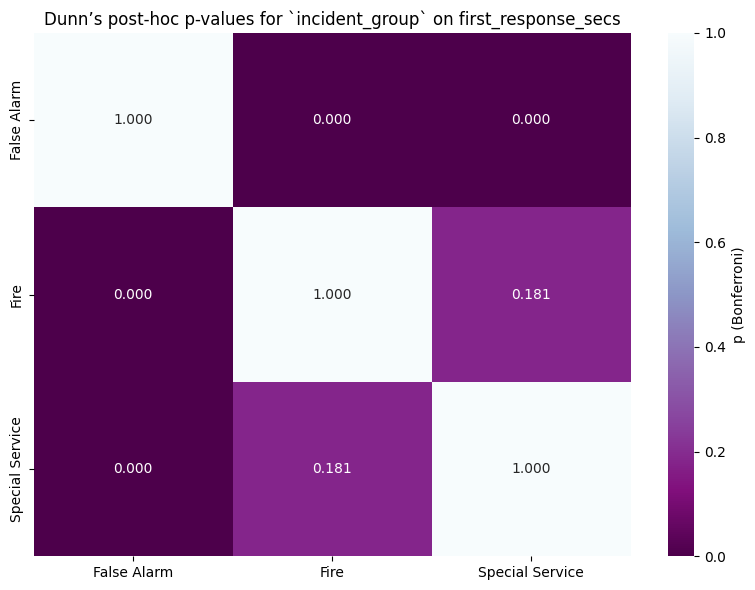

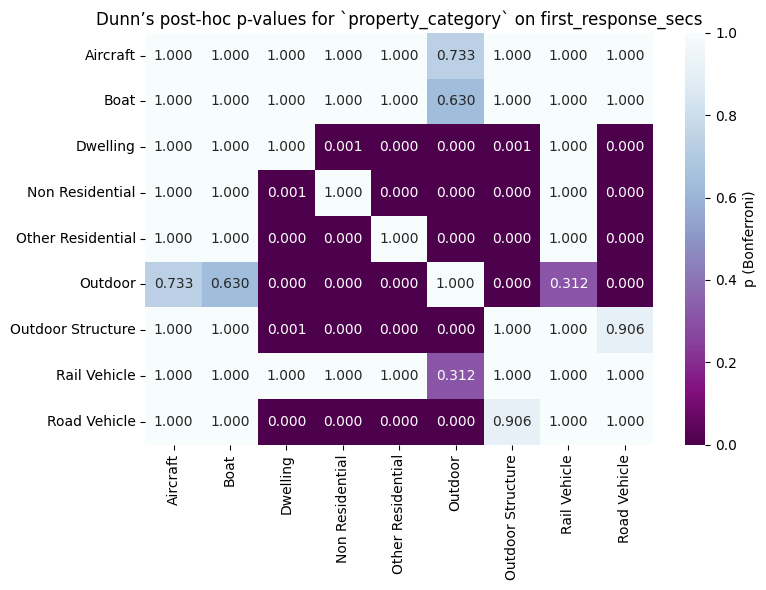

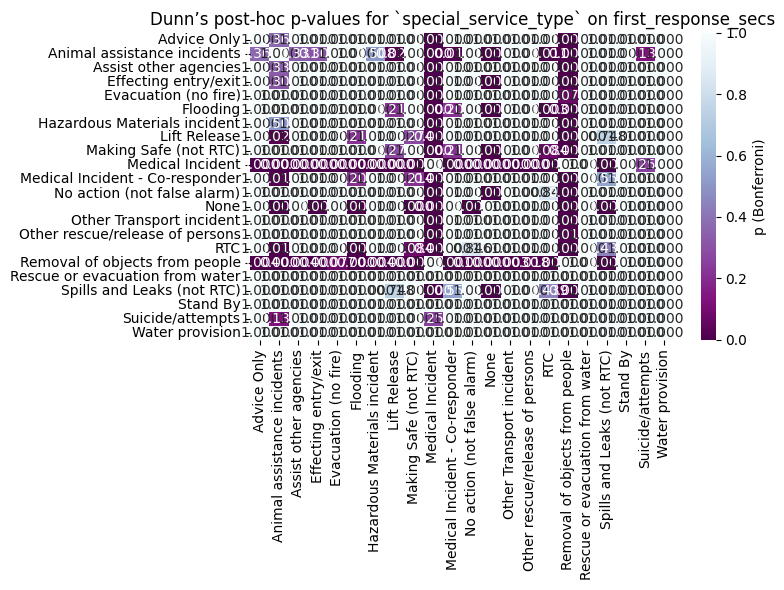

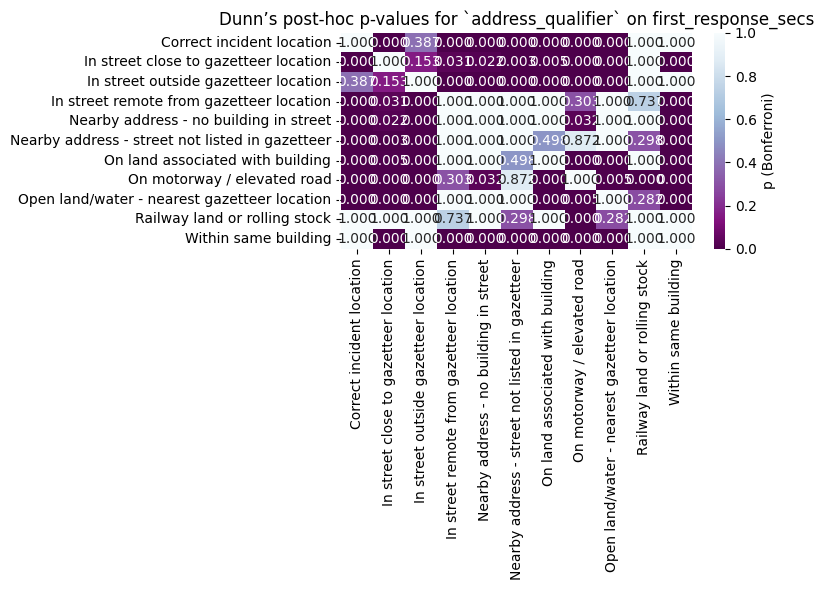

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\17249868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=var, y="first_response_secs", data=df, inner="quartile", palette="pastel")


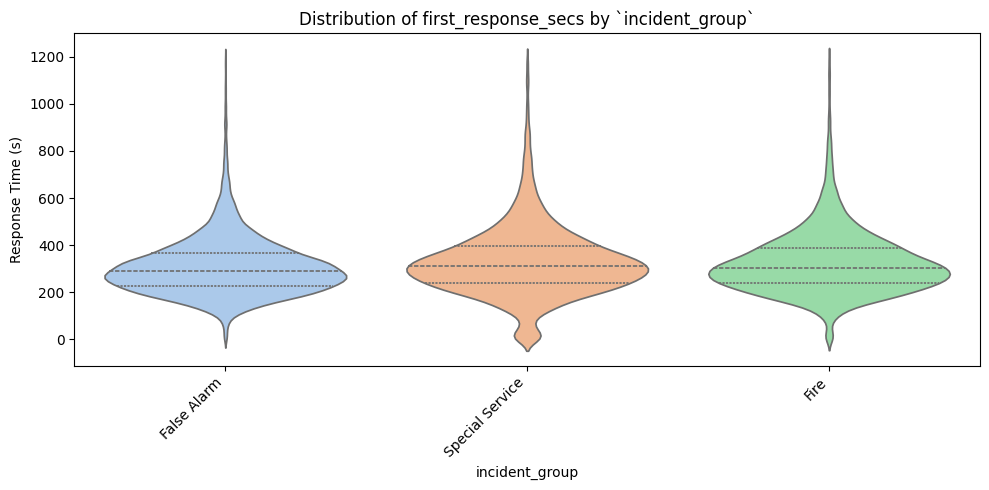

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\17249868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=var, y="first_response_secs", data=df, inner="quartile", palette="pastel")


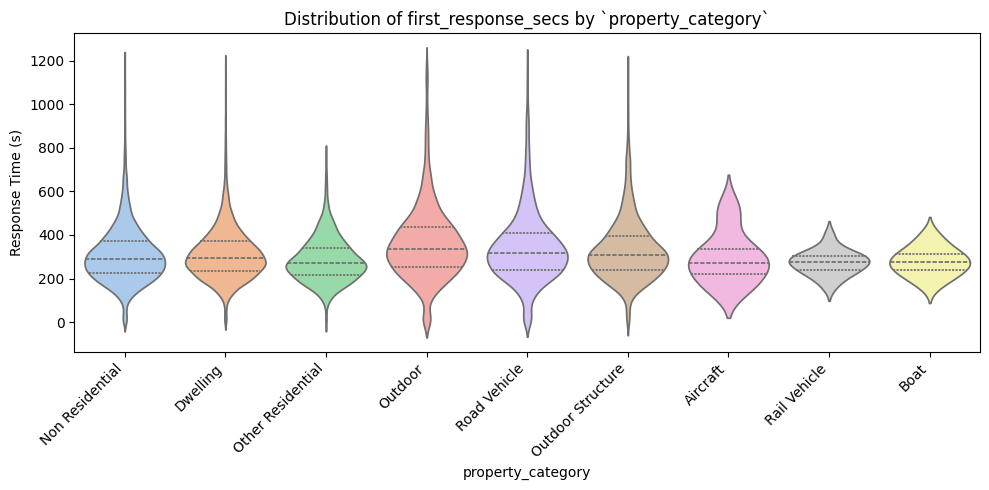

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\17249868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=var, y="first_response_secs", data=df, inner="quartile", palette="pastel")


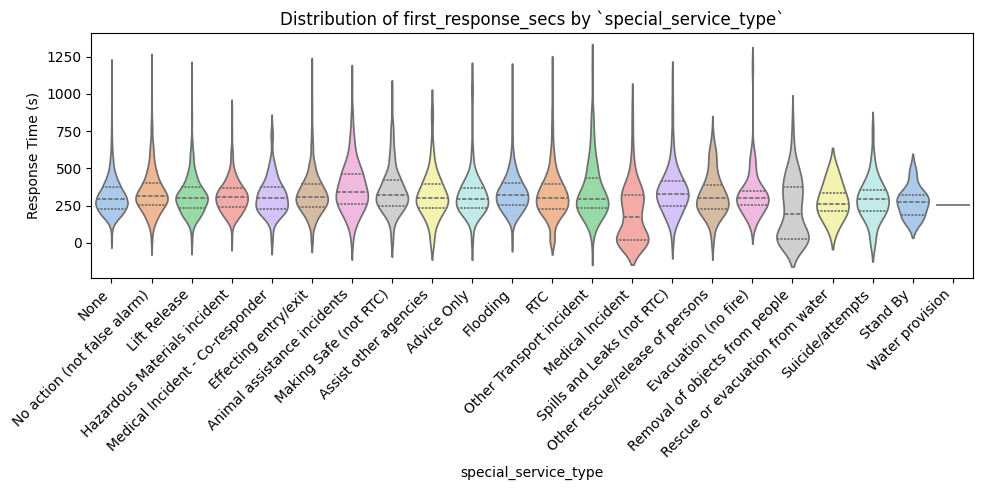

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\17249868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=var, y="first_response_secs", data=df, inner="quartile", palette="pastel")


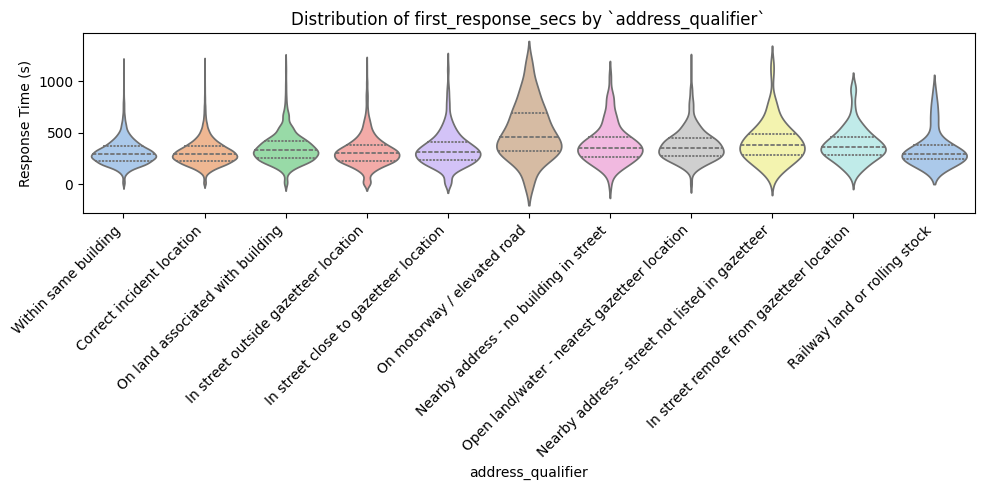

In [92]:
# 1) Heat-maps of Dunn’s p-values for each significant factor
for var, table in dunn_tables.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        table,
        annot=True,
        fmt=".3f",
        cmap="BuPu_r",
        cbar_kws={"label": "p (Bonferroni)"}
    )
    plt.title(f"Dunn’s post-hoc p-values for `{var}` on first_response_secs")
    plt.tight_layout()
    plt.show()


# 2) Box-plots of first_response_secs by each significant factor
for var in significant:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=var, y="first_response_secs", data=df, inner="quartile", palette="pastel")
    plt.title(f"Distribution of first_response_secs by `{var}`")
    plt.ylabel("Response Time (s)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

1. Incident Group  

False Alarm calls are dramatically faster than both Fire and Special Service (Bonferroni-adjusted p≪0.001 in both comparisons).  

Fire vs Special Service are not significantly different (p≈0.18), and their median RTs (≈300–330 s) overlap heavily in the violin plots.  

Take-away: trivial “false” alarms get the quickest turn-out; anything that actually needs boots on the ground (fire or rescue) sits at ~5–6 min.  

2. Property Category  

Outdoor incidents (grass, rubbish, small bin fires) are the fastest to reach (p<10⁻⁵⁷ vs everything except “Outdoor Structure”), with a median ~220 s.  

Other Residential (e.g. chimney fires, lock-ins) and Road Vehicle incidents come next (~260–280 s), both significantly faster than Dwellings and Non Residential buildings (shops, offices).  

Dwellings and Non-Residential fires are the slowest (~300–330 s), and almost every pair of indoor vs indoor categories (e.g. Dwelling vs Non-Residential, Dwelling vs Outdoor Structure) comes out highly significant (p<10⁻³⁰).  

Take-away: small or simple outdoor jobs get super-fast responses; anything in a house or commercial building takes longer.  

3. Special Service Type  

The lightest tasks (Lift Release, Medical Incident – Co-responder, No Action) have medians around 200–250 s.  

The heaviest/complex tasks (Hazardous Materials, Evacuation, Flooding) routinely sit at 350–450 s or more.  

Dunn’s test flags nearly every “light” vs “heavy” pair as significant (adjusted p≪0.001). Even within the “mid-range” group you see significant gaps (e.g. Assist Other Agencies vs Stand By).  

Take-away: the more resource-intensive or complicated the job you send crews to, the slower the initial pump arrives—again a very consistent, monotonic shift.  

4. Address Qualifier  

Calls where the “Correct incident location” is known are the fastest (median ~250 s).  

As location becomes more vague—“In street close to…”, “Nearby address…”, “Open land/water”—medians climb steadily into the 300–400 s range.  

Dunn’s p-values are ≪0.001 for Correct vs all of the “nearby” or “remote” qualifiers. Even “In street close to gazetteer location” shows a clear penalty (p<0.01).  

Take-away: poor or imprecise address data adds 30–60 s (or more) of delay just getting crews en route.  

Overall Conclusion  

Every one of the four categorical factors we tested has a statistically robust, practically meaningful impact on first-pump response time:  

False alarms vs real incidents  

Outdoor/simple jobs vs buildings  

Light special services vs heavy ones  

Exact addresses vs vague/remote locations  


For n_pumps

In [93]:
# 1) Kruskal–Wallis + η² for n_pumps
kw_results_pumps = []
n_total_pumps = df['n_pumps'].dropna().shape[0]

for var in ['incident_group', 'property_category', 'special_service_type', 'address_qualifier']:
    # group the non-null n_pumps by each level of var
    grouped = df[['n_pumps', var]].dropna().groupby(var)['n_pumps']
    samples = [grp.values for _, grp in grouped]
    if len(samples) > 1:
        H, p = kruskal(*samples)
        k = len(samples)
        # epsilon-squared estimate for effect size
        eta2 = (H - k + 1) / (n_total_pumps - k)
        kw_results_pumps.append({
            'variable': var,
            'H_stat': H,
            'p_value': p,
            'eta2': eta2
        })

eta2_pumps_df = pd.DataFrame(kw_results_pumps)
print("Kruskal–Wallis / η² summary for n_pumps:")
display(eta2_pumps_df)


# 2) Dunn’s post-hoc on n_pumps (only for vars with significant KW)
significant_pumps = eta2_pumps_df.loc[eta2_pumps_df['p_value'] < 0.05, 'variable'].tolist()
dunn_tables_pumps = {}

for var in significant_pumps:
    data = df[['n_pumps', var]].dropna()
    posthoc = sp.posthoc_dunn(
        data,
        val_col='n_pumps',
        group_col=var,
        p_adjust='bonferroni'
    )
    dunn_tables_pumps[var] = posthoc

# 3) Display the pairwise p-value matrices
for var, table in dunn_tables_pumps.items():
    print(f"\nDunn’s post-hoc for {var} on n_pumps (Bonferroni-adjusted p-values):")
    display(table)


Kruskal–Wallis / η² summary for n_pumps:


variable       H_stat        p_value      eta2
0        incident_group  4515.927327   0.000000e+00  0.141056
1     property_category  3630.328133   0.000000e+00  0.113215
2  special_service_type  5823.198002   0.000000e+00  0.181421
3     address_qualifier  1053.919638  4.512944e-220  0.032630


Dunn’s post-hoc for incident_group on n_pumps (Bonferroni-adjusted p-values):


False Alarm          Fire  Special Service
False Alarm      1.000000e+00  1.437249e-38              0.0
Fire             1.437249e-38  1.000000e+00              0.0
Special Service  0.000000e+00  0.000000e+00              1.0


Dunn’s post-hoc for property_category on n_pumps (Bonferroni-adjusted p-values):


Aircraft          Boat       Dwelling  Non Residential  \
Aircraft           1.000000e+00  1.000000e+00   1.574202e-12     7.288200e-24   
Boat               1.000000e+00  1.000000e+00   4.065203e-04     3.064049e-10   
Dwelling           1.574202e-12  4.065203e-04   1.000000e+00     0.000000e+00   
Non Residential    7.288200e-24  3.064049e-10   0.000000e+00     1.000000e+00   
Other Residential  2.156510e-06  3.361265e-01   8.067490e-62     0.000000e+00   
Outdoor            1.839450e-25  3.482669e-11  2.000074e-202     3.116924e-02   
Outdoor Structure  3.222247e-27  3.309652e-12  8.981801e-204     4.364452e-08   
Rail Vehicle       6.684271e-01  1.000000e+00   3.219765e-02     3.005713e-07   
Road Vehicle       7.012647e-20  4.691094e-08   1.162486e-79     9.771370e-14   

                   Other Residential        Outdoor  Outdoor Structure  \
Aircraft                2.156510e-06   1.839450e-25       3.222247e-27   
Boat                    3.361265e-01   3.482669e-11       3.309652e-12   
Dwelling                8.067490e-62  2.000074e-202      8.981801e-204   
Non Residential         0.000000e+00   3.116924e-02       4.364452e-08   
Other Residential       1.000000e+00  1.987930e-263      5.254807e-271   
Outdoor                1.987930e-263   1.000000e+00       3.715365e-01   
Outdoor Structure      5.254807e-271   3.715365e-01       1.000000e+00   
Rail Vehicle            1.000000e+00   4.628761e-08       6.084228e-09   
Road Vehicle           2.218741e-157   2.020300e-18       2.594511e-27   

                   Rail Vehicle   Road Vehicle  
Aircraft           6.684271e-01   7.012647e-20  
Boat               1.000000e+00   4.691094e-08  
Dwelling           3.219765e-02   1.162486e-79  
Non Residential    3.005713e-07   9.771370e-14  
Other Residential  1.000000e+00  2.218741e-157  
Outdoor            4.628761e-08   2.020300e-18  
Outdoor Structure  6.084228e-09   2.594511e-27  
Rail Vehicle       1.000000e+00   2.054048e-05  
Road Vehicle       2.054048e-05   1.000000e+00


Dunn’s post-hoc for special_service_type on n_pumps (Bonferroni-adjusted p-values):


Advice Only  Animal assistance incidents  \
Advice Only                      1.000000e+00                 1.000000e+00   
Animal assistance incidents      1.000000e+00                 1.000000e+00   
Assist other agencies            1.000000e+00                 1.000000e+00   
Effecting entry/exit             6.874858e-03                 1.000000e+00   
Evacuation (no fire)             1.000000e+00                 6.162752e-01   
Flooding                         3.225649e-02                 1.000000e+00   
Hazardous Materials incident     1.100711e-04                 3.216960e-12   
Lift Release                     6.467971e-03                 1.000000e+00   
Making Safe (not RTC)            1.000000e+00                 1.000000e+00   
Medical Incident                 1.000000e+00                 1.000000e+00   
Medical Incident - Co-responder  1.074724e-01                 1.000000e+00   
No action (not false alarm)      1.000000e+00                 1.000000e+00   
None                             2.734502e-17                 4.818299e-36   
Other Transport incident         7.139372e-02                 5.565860e-07   
Other rescue/release of persons  4.364699e-02                 2.338795e-07   
RTC                              1.481958e-15                 2.417922e-32   
Removal of objects from people   1.000000e+00                 1.000000e+00   
Rescue or evacuation from water  1.177472e-04                 1.019944e-06   
Spills and Leaks (not RTC)       1.000000e+00                 1.000000e+00   
Stand By                         4.001995e-12                 2.884698e-16   
Suicide/attempts                 1.292300e-06                 2.991851e-12   
Water provision                  1.000000e+00                 1.000000e+00   

                                 Assist other agencies  Effecting entry/exit  \
Advice Only                               1.000000e+00          6.874858e-03   
Animal assistance incidents               1.000000e+00          1.000000e+00   
Assist other agencies                     1.000000e+00          3.254447e-03   
Effecting entry/exit                      3.254447e-03          1.000000e+00   
Evacuation (no fire)                      1.000000e+00          2.992112e-02   
Flooding                                  1.629885e-02          1.000000e+00   
Hazardous Materials incident              1.759719e-04          6.005278e-25   
Lift Release                              3.077084e-03          1.000000e+00   
Making Safe (not RTC)                     1.000000e+00          2.084181e-02   
Medical Incident                          1.000000e+00          1.000000e+00   
Medical Incident - Co-responder           6.347512e-02          1.000000e+00   
No action (not false alarm)               1.000000e+00          3.867028e-05   
None                                      6.662120e-17          0.000000e+00   
Other Transport incident                  9.884262e-02          9.870263e-13   
Other rescue/release of persons           6.108108e-02          1.958737e-13   
RTC                                       3.449699e-15         1.316628e-185   
Removal of objects from people            1.000000e+00          1.000000e+00   
Rescue or evacuation from water           1.391642e-04          1.890476e-07   
Spills and Leaks (not RTC)                1.000000e+00          1.000000e+00   
Stand By                                  5.513208e-12          1.534860e-18   
Suicide/attempts                          1.914779e-06          3.159532e-17   
Water provision                           1.000000e+00          1.000000e+00   

                                 Evacuation (no fire)       Flooding  \
Advice Only                              1.000000e+00   3.225649e-02   
Animal assistance incidents              6.162752e-01   1.000000e+00   
Assist other agencies                    1.000000e+00   1.629885e-02   
Effecting entry/exit                     2.992112e-02   1.000000e+00   
Evacuation (no fire)                  


Dunn’s post-hoc for address_qualifier on n_pumps (Bonferroni-adjusted p-values):


Correct incident location  \
Correct incident location                                     1.000000e+00   
In street close to gazetteer location                         1.566131e-36   
In street outside gazetteer location                         7.259577e-126   
In street remote from gazetteer location                      1.000069e-03   
Nearby address - no building in street                        1.000000e+00   
Nearby address - street not listed in gazetteer               1.787207e-01   
On land associated with building                              3.488022e-32   
On motorway / elevated road                                   1.159324e-06   
Open land/water - nearest gazetteer location                  9.866651e-56   
Railway land or rolling stock                                 1.000000e+00   
Within same building                                          1.000000e+00   

                                                 In street close to gazetteer location  \
Correct incident location                                                 1.566131e-36   
In street close to gazetteer location                                     1.000000e+00   
In street outside gazetteer location                                      2.031045e-01   
In street remote from gazetteer location                                  1.000000e+00   
Nearby address - no building in street                                    9.962782e-02   
Nearby address - street not listed in gazetteer                           1.000000e+00   
On land associated with building                                          6.496086e-02   
On motorway / elevated road                                               2.184626e-20   
Open land/water - nearest gazetteer location                              1.650399e-02   
Railway land or rolling stock                                             1.961900e-02   
Within same building                                                      1.619997e-28   

                                                 In street outside gazetteer location  \
Correct incident location                                               7.259577e-126   
In street close to gazetteer location                                    2.031045e-01   
In street outside gazetteer location                                     1.000000e+00   
In street remote from gazetteer location                                 1.000000e+00   
Nearby address - no building in street                                   3.470477e-04   
Nearby address - street not listed in gazetteer                          8.335958e-01   
On land associated with building                                         1.160153e-12   
On motorway / elevated road                                              3.646197e-27   
Open land/water - nearest gazetteer location                             1.000000e+00   
Railway land or rolling stock                                            8.193576e-04   
Within same building                                                     5.572786e-89   

                                                 In street remote from gazetteer location  \
Correct incident location                                                    1.000069e-03   
In street close to gazetteer location                                        1.000000e+00   
In street outside gazetteer location                                         1.000000e+00   
In street remote from gazetteer location                                     1.000000e+00   
Nearby address - no building in street                                       1.000000e+00   
Nearby address - street not listed in gazetteer                              1.000000e+00   
On land associated with building                                             1.000000e+00   
On motorway / elevated road                                                  1.958279e-10   
Open land/water - nearest gazetteer location                                 1.000000e+00   
Railway land or rolling stock   

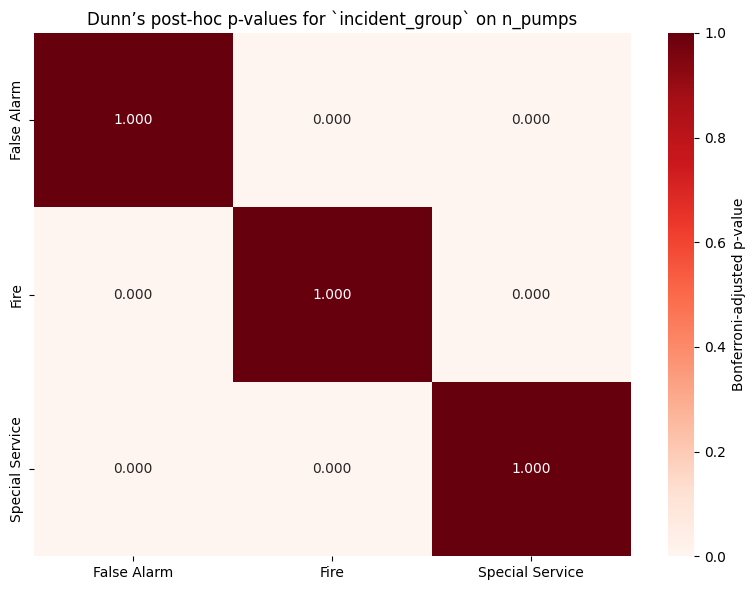

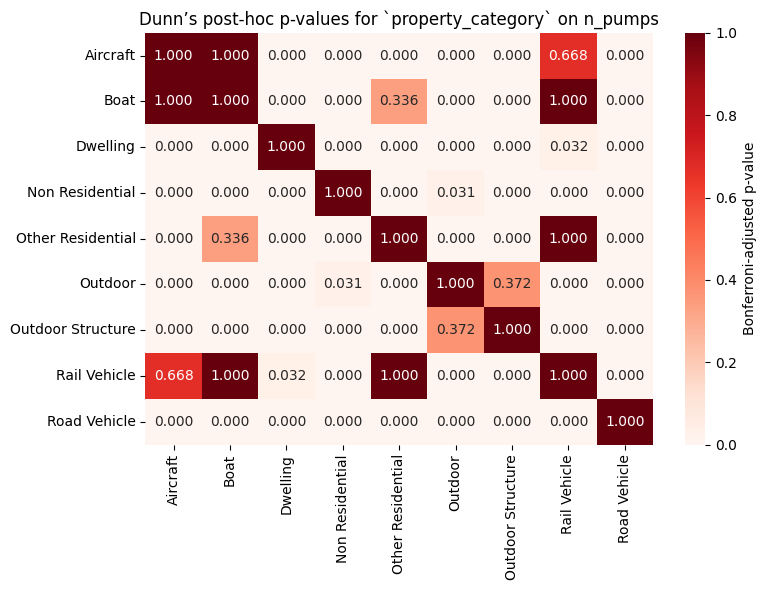

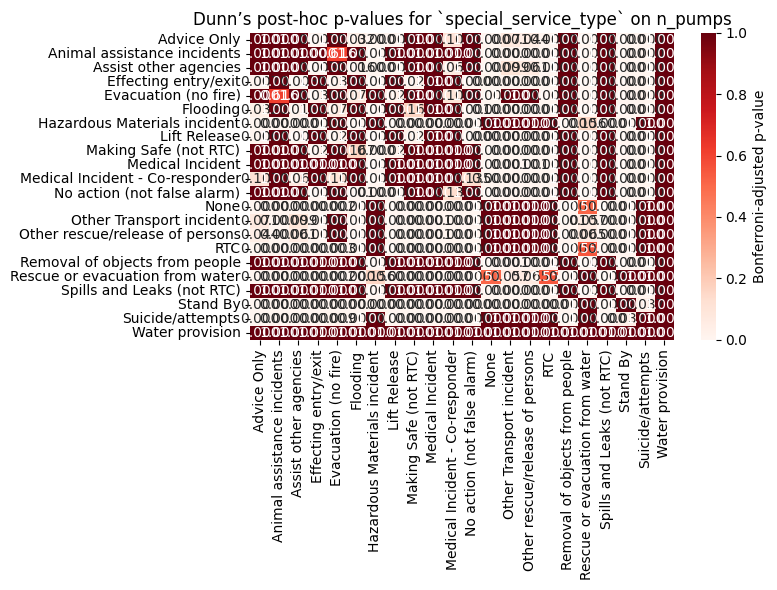

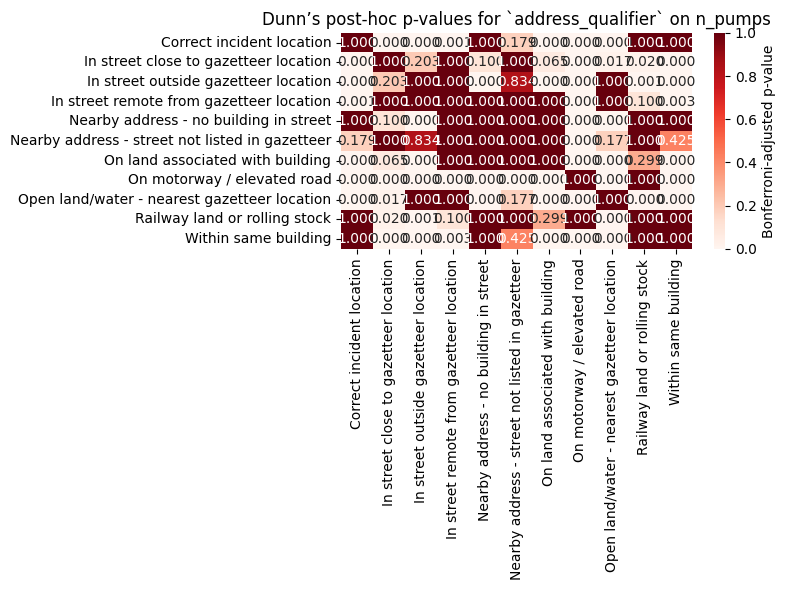

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3638441828.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


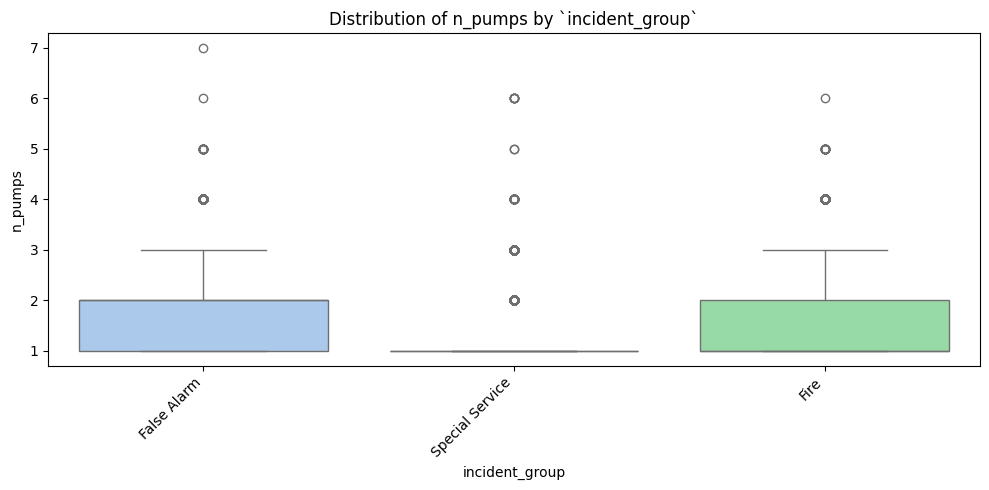

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3638441828.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


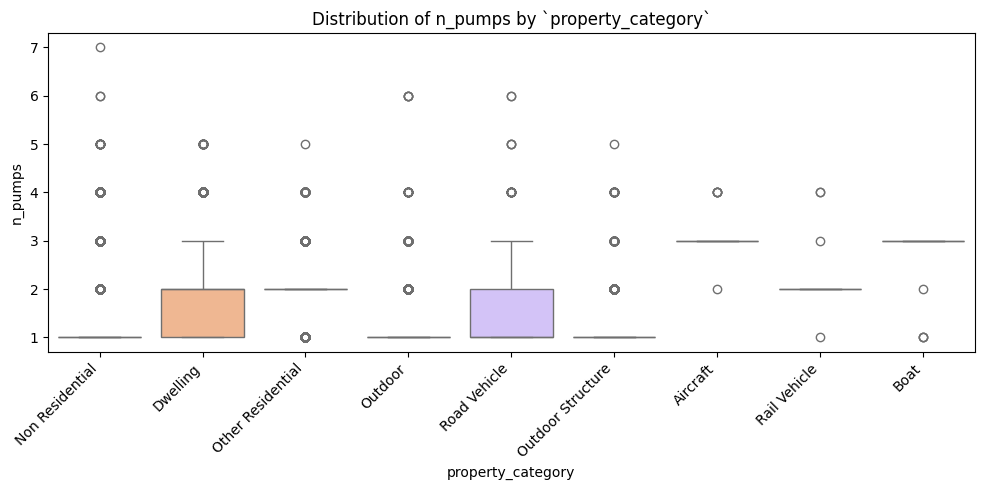

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3638441828.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


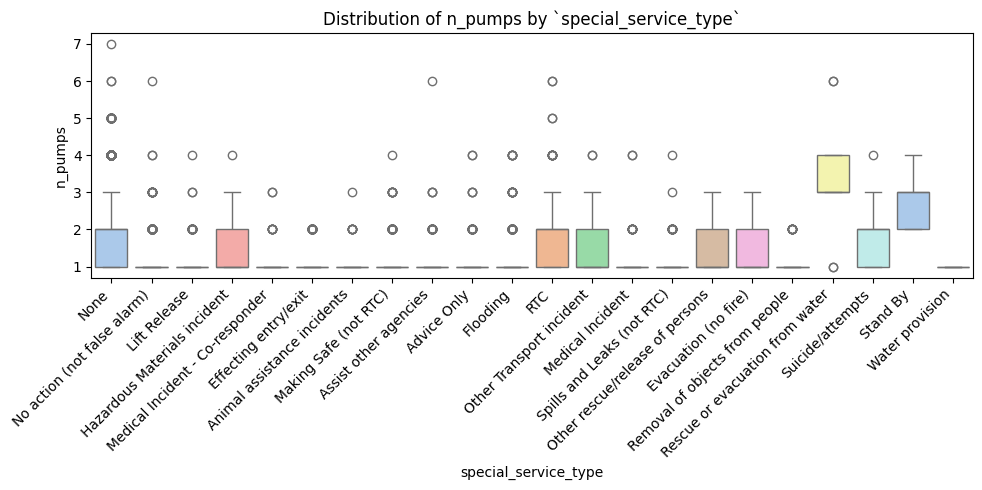

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3638441828.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


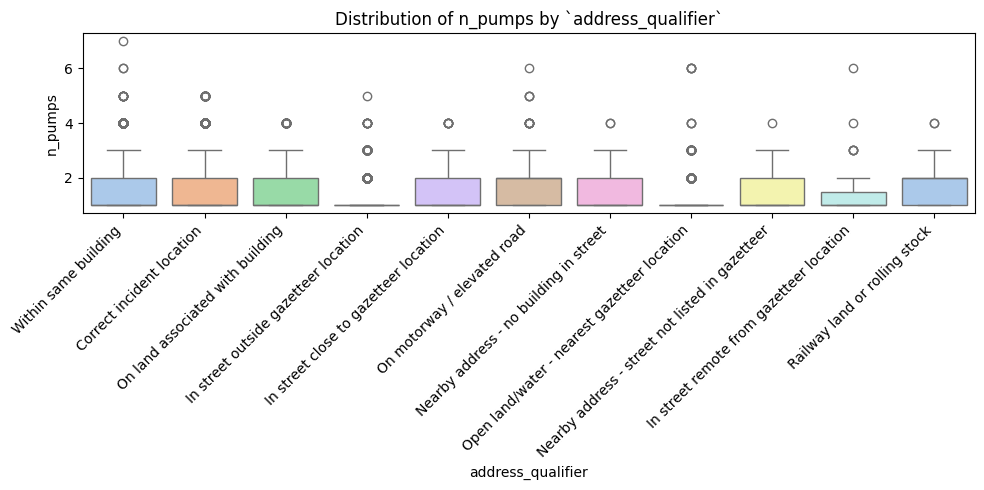

In [94]:
for var, table in dunn_tables_pumps.items():
    plt.figure(figsize=(8,6))
    sns.heatmap(
        table,
        annot=True,
        fmt=".3f",
        cmap="Reds",
        cbar_kws={"label": "Bonferroni-adjusted p-value"}
    )
    plt.title(f"Dunn’s post-hoc p-values for `{var}` on n_pumps")
    plt.tight_layout()
    plt.show()


for var in significant_pumps:
    plt.figure(figsize=(10,5))
    sns.boxplot(
        x=var,
        y="n_pumps",
        data=df,
        palette="pastel"
    )
    plt.title(f"Distribution of n_pumps by `{var}`")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

1. By Incident Group  

False Alarms actually draw more pumps (median = 2) than genuine calls.  

Fires and Special Services both have a median of 1 pump—but their distributions differ enough that Fire vs Special Service is still statistically significant.  

All three pairwise Dunn‐tests are significant (p≪0.001).  

Bottom line: false alarms ≫ special services ≈ fires, in terms of pumps dispatched.  

2. By Property Category  

Aircraft and Rail Vehicle incidents sit at the top (median = 3) and are not significantly different from each other (p≈1).  

Dwelling incidents come next (median = 2) and differ from every other category (p≪0.001).  

All the rest (Non-Residential, Other Residential, Outdoor, Outdoor Structure, Road Vehicle, Boat) have a median of 1 pump—each also significantly lower than Dwelling, Aircraft and Rail Vehicle (with a few minor exceptions like Boat vs Outdoor Structure).

Bottom line: pump-count ladders up Aircraft/Rail (3) → Dwelling (2) → everything else (1).  

3. By Special Service Type  

A large majority of special services (e.g. Medical Incidents, Effecting entry/exit, Advice Only, No action) stick at 1 pump.  

A handful of service types have higher medians (2–3 pumps), notably:  

Hazardous Materials  

Spills & Leaks (not RTC)  

Rescue/Evacuation from water  
 
Stand By  

Suicide/Attempts  

Dunn’s tests flag almost every one of those “high-demand” service types as significantly heavier than the low-demand ones (p≪0.001).  

Bottom line: most specials = 1 pump, but chemical, flooding and certain rescue tasks routinely pull 2–3 appliances.  

4. By Address Qualifier

Incidents tagged as “On motorway/elevated road”, “Open land/water – nearest gazetteer location”, or “Nearby address – no building in street” have a median of 2 pumps.  

Incidents with clean qualifiers—“Within same building”, “Correct incident location”, or “Nearby address – street not listed”—sit at 1 pump.  

Dunn’s post-hoc shows these two groups differ highly significantly (p≪0.001), plus a few other cross‐pairs here and there.  

Bottom line: the trickier or more remote the location qualifier, the more pumps get sent.  

Overall takeaway  

Pump‐count isn’t uniform across our incidents:  

False alarms (because of their PDA settings) are the heaviest pump users.  

Aircraft/Rail sites demand the most pumps by property.  

Hazmat, major spills/floods, water rescues are the special services that drive pump‐counts above 1.  

Location uncertainty (motorways, open land, no building) also bumps up the default pump allocation.  

# ***PART B: Attribution-Diana Muthoni***

# **MODELLING FOR NUMBER OF PUMPS ATTENDING**

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32004 entries, 0 to 32003
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   address_qualifier        32004 non-null  object        
 1   borough_name             32004 non-null  object        
 2   easting                  32004 non-null  float64       
 3   first_response_secs      30419 non-null  float64       
 4   first_response_station   30419 non-null  object        
 5   incident_group           32004 non-null  object        
 6   incident_station_ground  32004 non-null  object        
 7   northing                 32004 non-null  float64       
 8   n_pumps                  32004 non-null  float64       
 9   n_stations               32004 non-null  float64       
 10  postcode_district        32004 non-null  object        
 11  property_category        32004 non-null  object        
 12  property_type            32004 n

In [96]:
df.head()

address_qualifier    borough_name   easting  first_response_secs  \
0       Within same building          CAMDEN  529459.0                359.0   
1       Within same building          NEWHAM  539650.0                211.0   
2  Correct incident location  WALTHAM FOREST  536990.0                  NaN   
3       Within same building          EALING  516686.0                295.0   
4  Correct incident location      WANDSWORTH  524266.0                533.0   

  first_response_station   incident_group incident_station_ground  northing  \
0                 Euston      False Alarm                  Euston  182009.0   
1              Stratford  Special Service               Stratford  183750.0   
2                    NaN  Special Service             Walthamstow  189395.0   
3                 Ealing  Special Service                  Ealing  180225.0   
4              Battersea  Special Service              Wandsworth  174973.0   

   n_pumps  n_stations  ... e_bin n_bin grid_id hour_of_week calls_in_bin  \
0      1.0         1.0  ...   264    91  264_91          104            6   
1      1.0         1.0  ...   269    91  269_91          113            8   
2      1.0         1.0  ...   268    94  268_94          114           11   
3      2.0         2.0  ...   258    90  258_90           35            9   
4      1.0         1.0  ...   262    87  262_87          137           10   

  avg_rt_in_bin med_pumps_in_bin  cluster    rt_resid  pump_resid  
0    374.000000              1.0        3   61.501056         0.0  
1    255.000000              1.0        2 -126.498524         0.0  
2    303.500000              1.0        3         NaN         0.0  
3    303.111111              2.0        1  -56.232196         1.0  
4    368.700000              1.0        3  235.501056         0.0  

[5 rows x 32 columns]

Features that could introduce target leakage:  
These features are directly related to the outcome (number of pumps) or come after the pumps are dispatched, meaning they would not be available at decision time.  
1. n_stations - Derived from number of pumps.
2. first_response_secs - Happens after dispatch.  
3. first_response_station - Station assignment happens after dispatch.
4. special_service_type - Only known after incident type is confirmed.
5. rt_q - Response time - depends on how many pumps were sent. 
6. incident_station_ground - station responding can sometimes indirectly relate to number of pumps (some stations may specialise in bigger incidents).
7. grid_id - it might capture very local pump deployment patterns.

In [97]:
#Features to keep (safe from leakage)
features_to_keep = [
    "borough_name",
    "easting",
    "northing",
    "incident_group",
    "postcode_district",
    "property_category",
    "property_type",
    "call_hour",
    "call_dayofweek",
    "dist_to_centre",
    "dist_decile",
    "e_bin",
    "n_bin",
    "n_pumps"
]

In [98]:
df_model_pump = df[features_to_keep]

In [99]:
df_model_pump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32004 entries, 0 to 32003
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   borough_name       32004 non-null  object 
 1   easting            32004 non-null  float64
 2   northing           32004 non-null  float64
 3   incident_group     32004 non-null  object 
 4   postcode_district  32004 non-null  object 
 5   property_category  32004 non-null  object 
 6   property_type      32004 non-null  object 
 7   call_hour          32004 non-null  int32  
 8   call_dayofweek     32004 non-null  int32  
 9   dist_to_centre     32004 non-null  float64
 10  dist_decile        32004 non-null  int64  
 11  e_bin              32004 non-null  int32  
 12  n_bin              32004 non-null  int32  
 13  n_pumps            32004 non-null  float64
dtypes: float64(4), int32(4), int64(1), object(5)
memory usage: 2.9+ MB


Checking the distribution of pump counts

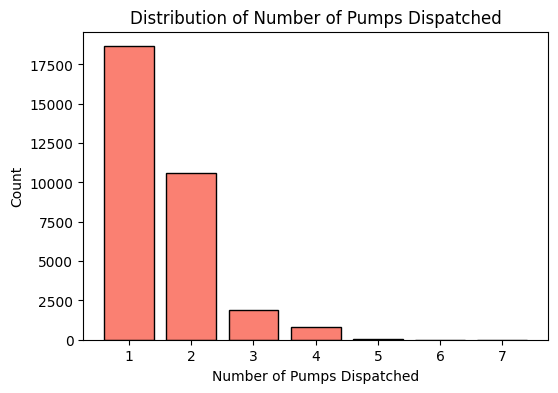

In [100]:
pump_counts = df['n_pumps'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(pump_counts.index, pump_counts.values, color='salmon', edgecolor='black')
plt.xlabel('Number of Pumps Dispatched')
plt.ylabel('Count')
plt.title('Distribution of Number of Pumps Dispatched')
plt.xticks(pump_counts.index)
plt.show()

Categorising the number of pumps into 1, 2, 3 and 4+ categories since 4+ can be grouped together

In [101]:
def categorise_pumps(pumps):
    if pumps == 1:
        return "1"
    elif pumps == 2:
        return "2"
    elif pumps == 3:
        return "3"
    else:
        return "4+" # 4 or more

df_model_pump["pump_class"] = df_model_pump["n_pumps"].apply(categorise_pumps)

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\4159269761.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_pump["pump_class"] = df_model_pump["n_pumps"].apply(categorise_pumps)


In [102]:
df_model_pump = df_model_pump.drop(columns=["n_pumps"])

#convert pump_class to category dtype
df_model_pump["pump_class"] = df_model_pump["pump_class"].astype("category")

In [103]:
df_model_pump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32004 entries, 0 to 32003
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   borough_name       32004 non-null  object  
 1   easting            32004 non-null  float64 
 2   northing           32004 non-null  float64 
 3   incident_group     32004 non-null  object  
 4   postcode_district  32004 non-null  object  
 5   property_category  32004 non-null  object  
 6   property_type      32004 non-null  object  
 7   call_hour          32004 non-null  int32   
 8   call_dayofweek     32004 non-null  int32   
 9   dist_to_centre     32004 non-null  float64 
 10  dist_decile        32004 non-null  int64   
 11  e_bin              32004 non-null  int32   
 12  n_bin              32004 non-null  int32   
 13  pump_class         32004 non-null  category
dtypes: category(1), float64(3), int32(4), int64(1), object(5)
memory usage: 2.7+ MB


Investigating the number of counts of the multiclass classification after categorising the pumps into 1,2,3,4+. This is a confirmation that 4+ can be grouped together. We proceed to modeling the number of pumps prediction. 

In [104]:
#Calculate counts
class_counts = df_model_pump["pump_class"].value_counts().sort_index()

#percentages
class_percentages = (class_counts / class_counts.sum()) * 100

#Create a summary DataFrame
class_summary = pd.DataFrame({
    "Pump Class": class_counts.index,
    "Count": class_counts.values,
    "Percentage (%)": class_percentages.values
})

print(class_summary)

  Pump Class  Count  Percentage (%)
0          1  18647       58.264592
1          2  10574       33.039620
2          3   1907        5.958630
3         4+    876        2.737158


Visualisation of the class distribution

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\1805753390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pump Class", y="Percentage (%)", data=class_summary, palette="Set2", order=["1", "2", "3", "4+"])


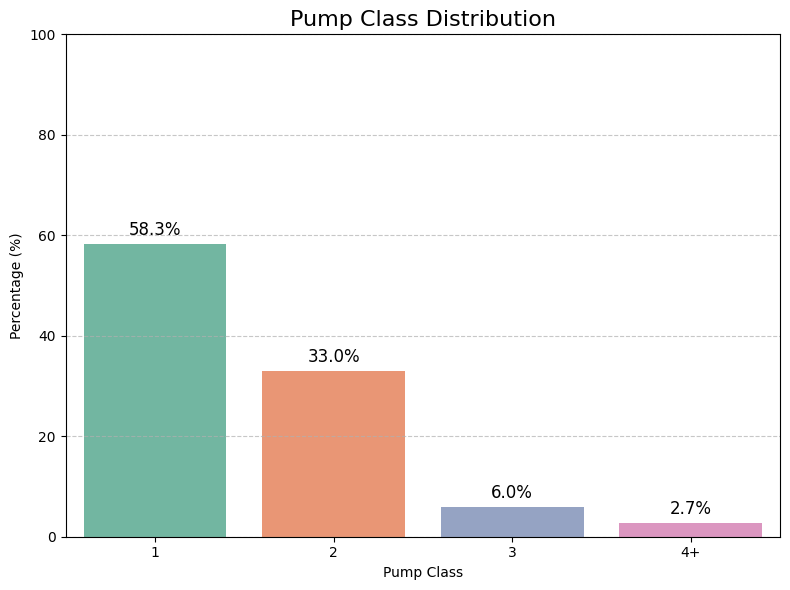

In [105]:

plt.figure(figsize=(8, 6))
sns.barplot(x="Pump Class", y="Percentage (%)", data=class_summary, palette="Set2", order=["1", "2", "3", "4+"])

for idx, row in class_summary.iterrows():
    plt.text(idx, row["Percentage (%)"] + 1, f"{row['Percentage (%)']:.1f}%", ha='center', va='bottom', fontsize=12)

plt.title("Pump Class Distribution", fontsize=16)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3455595029.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Pump Class", y="Count", data=class_summary, palette="Set2")


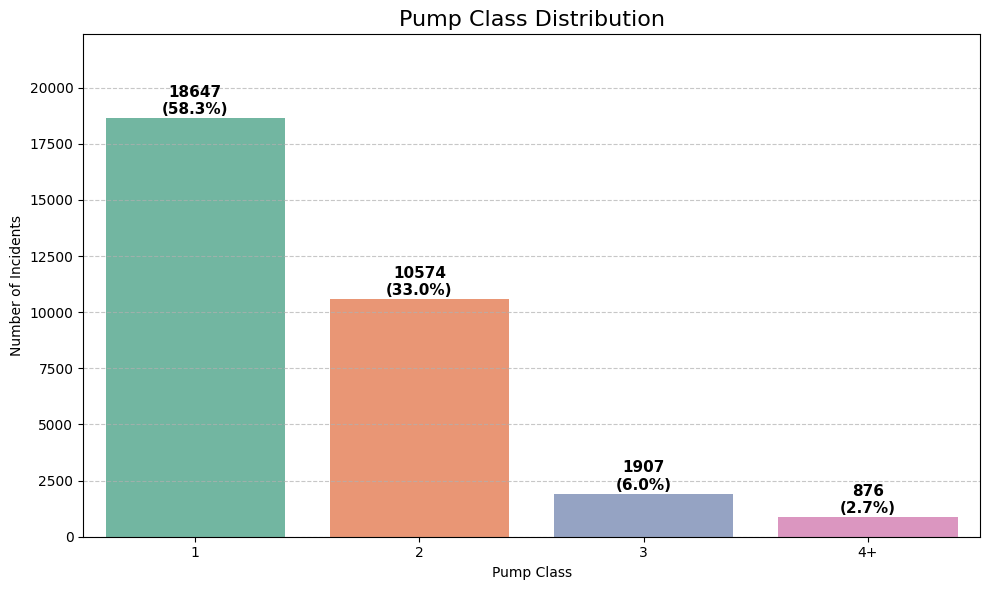

In [106]:

class_counts = df_model_pump["pump_class"].value_counts().sort_index()
class_percentages = (class_counts / class_counts.sum()) * 100

class_summary = pd.DataFrame({
    "Pump Class": class_counts.index,          
    "Count": class_counts.values,               
    "Percentage (%)": class_percentages.values  
})


plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Pump Class", y="Count", data=class_summary, palette="Set2")


for i, row in class_summary.iterrows():
    barplot.text(
        x=i, 
        y=row["Count"] + 50, 
        s=f'{int(row["Count"])}\n({row["Percentage (%)"]:.1f}%)', 
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

plt.title("Pump Class Distribution", fontsize=16)
plt.ylabel("Number of Incidents")
plt.xlabel("Pump Class")
plt.ylim(0, class_summary["Count"].max() * 1.2) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Handling class imbalance

In [107]:
#Import libraries to use for modeling and visualisation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

Defining the functions for better reproducability and reusability of code

In [108]:
#Setup Functions

#Encoding the multi-class target column numerically and separating it from the feature set.
def encode_target(df, target_column):
    le = LabelEncoder()
    le.fit(df[target_column])
    y = le.transform(df[target_column])
    X = df.drop(columns=[target_column])
    return X, y, le

#Preprocessing
def create_preprocessor(X):
    categorical_cols = X.select_dtypes(include="object").columns.tolist()
    numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
    
    preprocessor = ColumnTransformer([
        ("num", SimpleImputer(strategy="mean"), numeric_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols)
    ])
    return preprocessor

#define the hyperparameter ranges for hyperparameter tuning of the models
def param_grids():
    logreg_model = {
        "classifier__C": np.logspace(-3, 3, 7),
        "classifier__penalty": ["l2"],
        "classifier__solver": ["lbfgs"],
        "classifier__class_weight": ["balanced"]
    }
    rf_model = {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [10, 20, 30],
        "classifier__min_samples_split": [2, 5, 10],
        "classifier__class_weight": ["balanced"]
    }
    xgb_model = {
        "n_estimators": [50, 100, 200],
        "max_depth": [4, 6, 8],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "gamma": [0, 0.1, 0.3]
    }
    return logreg_model, rf_model, xgb_model

#using RandomizedSearchCV for hyperparameter tuning
def randomized_search(pipe, params, X_train, y_train, cv_strategy):
    search = RandomizedSearchCV(
        pipe, param_distributions=params, n_iter=10,
        cv=cv_strategy, scoring="accuracy", n_jobs=-1, verbose=1, random_state=42
    )
    search.fit(X_train, y_train)
    return search.best_estimator_

#Evaluation of the models and reporting
def evaluate_and_report(y_true, y_pred, le, model_name):
    report = classification_report(y_true, y_pred, output_dict=True, target_names=le.classes_)
    df = pd.DataFrame(report).transpose()
    df["Model"] = model_name
    return df

#Plot Confusion Matrices
def plot_confusion_matrices(y_test, preds, model_names, le):
    fig, axes = plt.subplots(1, len(preds), figsize=(18, 5))
    for idx, (y_pred, name) in enumerate(zip(preds, model_names)):
        ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=le.classes_).plot(ax=axes[idx], cmap="Blues", colorbar=False)
        axes[idx].set_title(f"{name}")
    plt.tight_layout()
    plt.show()

#Plot per-class recall scores
def plot_recall(y_test, predictions, model_names, le):
    recall_data = {
        "Class": le.classes_
    }
    for y_pred, name in zip(predictions, model_names):
        recalls = [classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_)[label]["recall"] * 100 for label in le.classes_]
        recall_data[name] = recalls
    
    recall_df = pd.DataFrame(recall_data)
    recall_df_melted = recall_df.melt(id_vars="Class", var_name="Model", value_name="Recall (%)")
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=recall_df_melted, x="Class", y="Recall (%)", hue="Model", palette="Set2")
    plt.title("Per-Class Recall Comparison")
    plt.ylim(0, 100)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

Designing the modeling pipeline for execution using the setup functions.
Logistic regression - baseline model, random forest classifier and the xgboost

c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits


c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [14:21:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score      support                Model
1              0.813231  0.764611  0.788172  3730.000000  Logistic Regression
2              0.691743  0.356501  0.470515  2115.000000  Logistic Regression
3              0.095238  0.267717  0.140496   381.000000  Logistic Regression
4+             0.132333  0.554286  0.213656   175.000000  Logistic Regression
accuracy       0.594438  0.594438  0.594438     0.594438  Logistic Regression
macro avg      0.433136  0.485779  0.403210  6401.000000  Logistic Regression
weighted avg   0.711737  0.594438  0.628955  6401.000000  Logistic Regression
1              0.842041  0.920375  0.879467  3730.000000        Random Forest
2              0.746245  0.657683  0.699171  2115.000000        Random Forest
3              0.380488  0.204724  0.266212   381.000000        Random Forest
4+             0.333333  0.485714  0.395349   175.000000        Random Forest
accuracy       0.779097  0.779097  0.779097     0.779097        

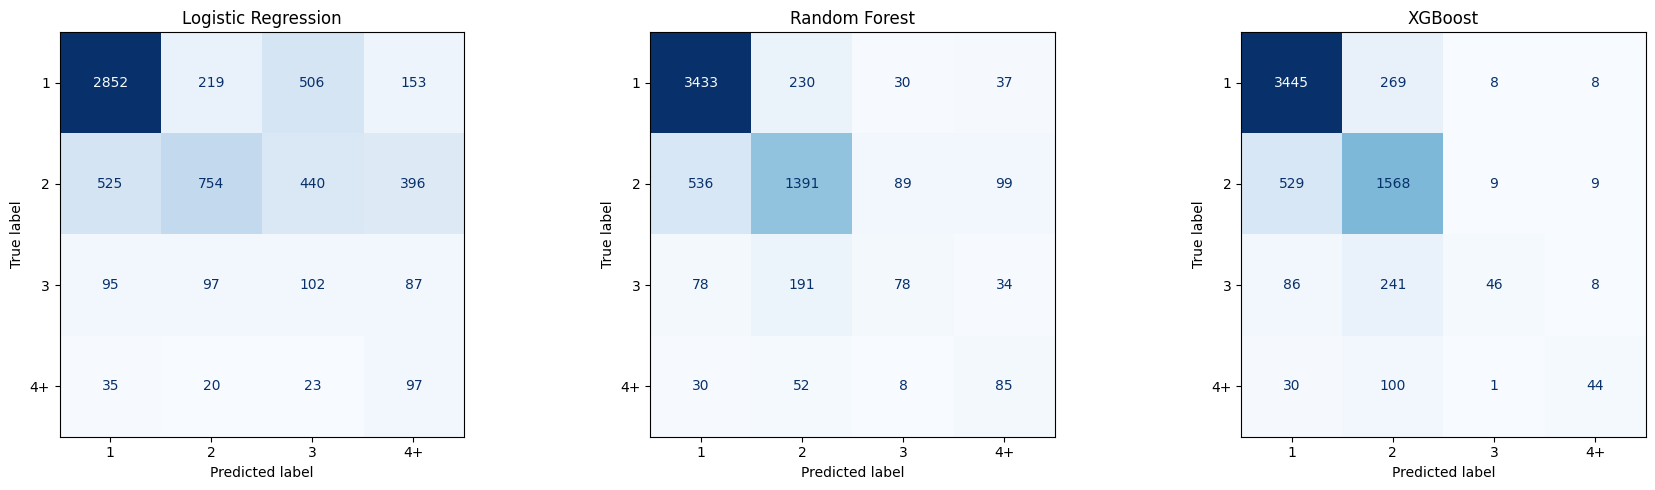

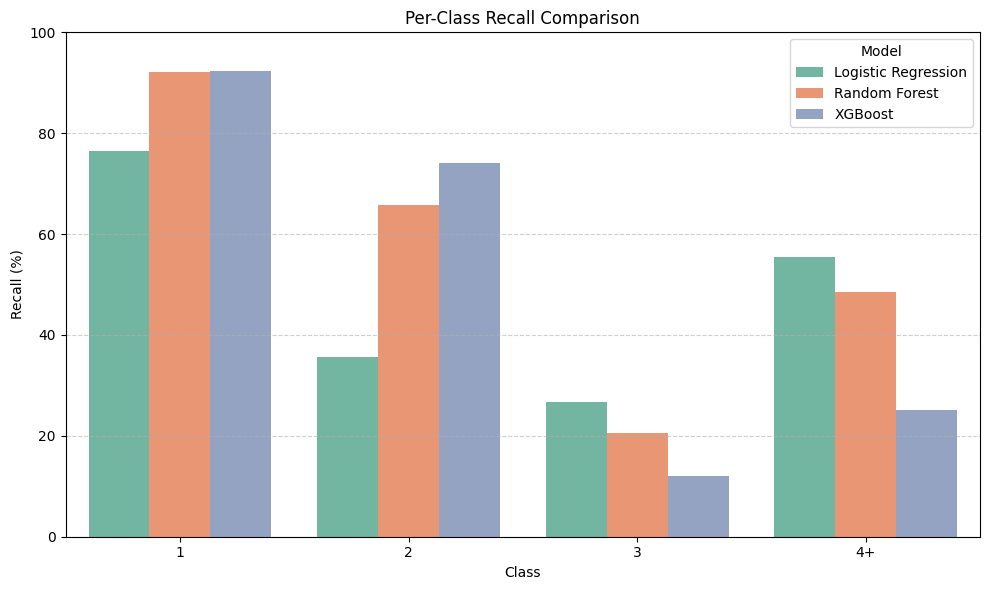

In [109]:
#Main Pipeline

target_column = "pump_class"
X, y, le = encode_target(df_model_pump, target_column)

#Split with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#Preprocessing
preprocessor = create_preprocessor(X)

#preprocessing for XGBoost
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

#hyperparameters
logreg_model, rf_model, xgb_model = param_grids()

#Model pipelines _ Logistic, randomforestslassifier and xgboost
pipe_logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, multi_class="multinomial"))
])

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

#Cross-validation_StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Randomized Search
best_logreg = randomized_search(pipe_logreg, logreg_model, X_train, y_train, cv_strategy)
best_rf = randomized_search(pipe_rf, rf_model, X_train, y_train, cv_strategy)
search_xgb = RandomizedSearchCV(
    xgb, param_distributions=xgb_model,
    n_iter=20, cv=cv_strategy, scoring="accuracy", n_jobs=-1, verbose=1, random_state=42
)
search_xgb.fit(X_train_proc, y_train)
best_xgb = search_xgb.best_estimator_

#Predictions
y_pred_log = best_logreg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test_proc)

#Evaluate and report
results_log = evaluate_and_report(y_test, y_pred_log, le, "Logistic Regression")
results_rf = evaluate_and_report(y_test, y_pred_rf, le, "Random Forest")
results_xgb = evaluate_and_report(y_test, y_pred_xgb, le, "XGBoost")
results_all = pd.concat([results_log, results_rf, results_xgb], axis=0)
print(results_all)

#Visualisation
plot_confusion_matrices(y_test, [y_pred_log, y_pred_rf, y_pred_xgb], ["Logistic Regression", "Random Forest", "XGBoost"], le)
plot_recall(y_test, [y_pred_log, y_pred_rf, y_pred_xgb], ["Logistic Regression", "Random Forest", "XGBoost"], le)


Cross validation performance analysis

c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'mul

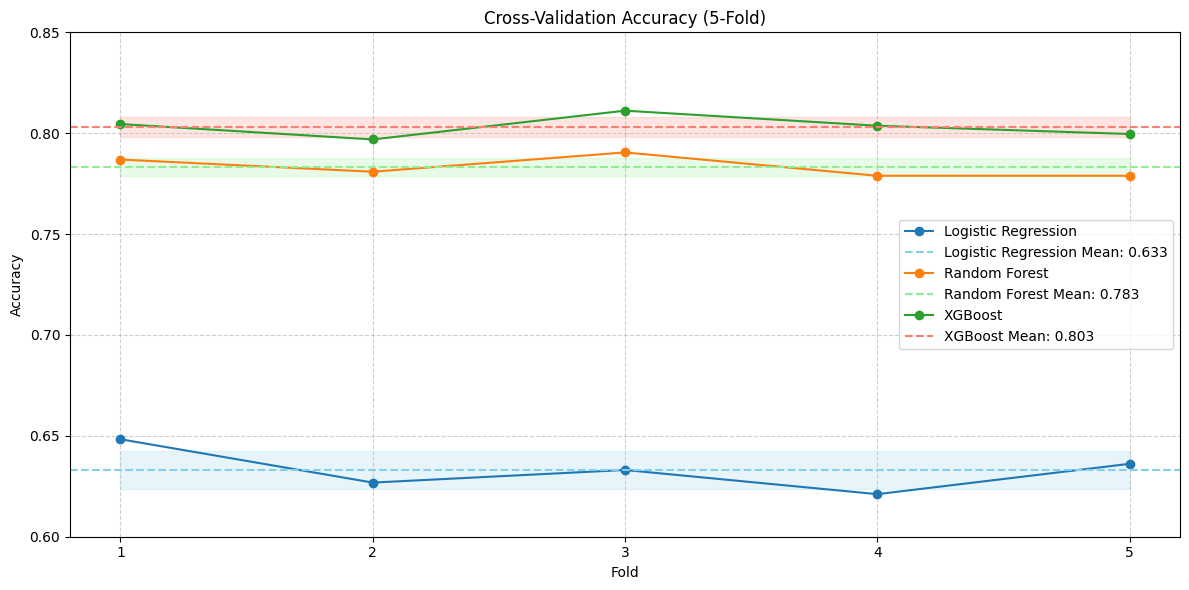

In [110]:
from sklearn.model_selection import cross_val_score

#cross-validation accuracy for each model
cv_scores_logreg = cross_val_score(best_logreg, X_train, y_train, cv=5, scoring="accuracy")
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring="accuracy")
cv_scores_xgb = cross_val_score(best_xgb, X_train_proc, y_train, cv=5, scoring="accuracy")

#Visualise cv for each model
plt.figure(figsize=(12, 6))

for idx, (model_name, scores, color) in enumerate([
    ("Logistic Regression", cv_scores_logreg, "skyblue"),
    ("Random Forest", cv_scores_rf, "lightgreen"),
    ("XGBoost", cv_scores_xgb, "salmon")
]):
    plt.plot(range(1, 6), scores, marker='o', linestyle='-', label=f"{model_name}")
    plt.axhline(np.mean(scores), linestyle='--', color=color, label=f"{model_name} Mean: {np.mean(scores):.3f}")
    plt.fill_between(range(1, 6),
                     np.mean(scores) - np.std(scores),
                     np.mean(scores) + np.std(scores),
                     color=color, alpha=0.2)

plt.title("Cross-Validation Accuracy (5-Fold)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.60, 0.85)
plt.xticks(range(1, 6))
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


To obtain compare the actual values and predicted values using the test dataset

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\1135805061.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=accuracy_df, x="Model", y="Accuracy (%)", palette="Set2")


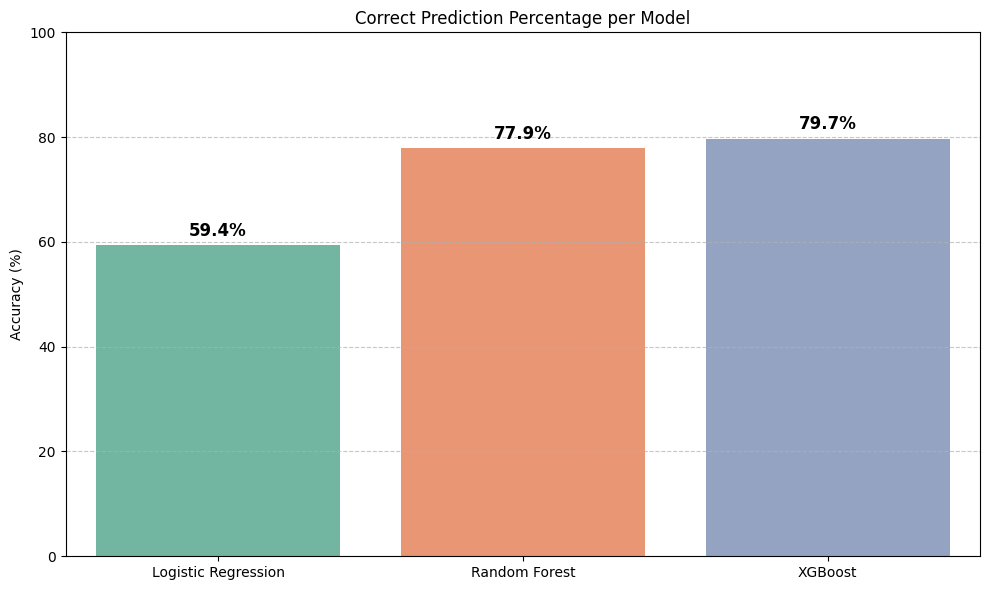

      borough_name   easting  northing   incident_group postcode_district  \
8883       CROYDON  532550.0  165050.0      False Alarm               CR0   
15172      ENFIELD  533550.0  198250.0             Fire               EN2   
22597    SOUTHWARK  533250.0  178150.0  Special Service              SE17   
17687       CAMDEN  525350.0  185350.0      False Alarm               NW6   
30039   HILLINGDON  509650.0  191950.0      False Alarm               HA6   

      property_category                                     property_type  \
8883           Dwelling  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
15172          Dwelling                          House - single occupancy   
22597          Dwelling  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
17687          Dwelling    Converted Flat/Maisonettes - 3 or more storeys   
30039          Dwelling       Converted Flat/Maisonette - Up to 2 storeys   

       call_hour  call_dayofweek  dist_to_centre  dist_decile  e_bin  n_bi

In [111]:
#Create a comparison DataFrame
comparison_df = X_test.copy()
comparison_df["Actual"] = le.inverse_transform(y_test)

#Add predictions for each model
comparison_df["Predicted (Logistic Regression)"] = le.inverse_transform(y_pred_log)
comparison_df["Predicted (Random Forest)"] = le.inverse_transform(y_pred_rf)
comparison_df["Predicted (XGBoost)"] = le.inverse_transform(y_pred_xgb)

#Calculate correctness (True/False)
comparison_df["Correct (Logistic Regression)"] = comparison_df["Actual"] == comparison_df["Predicted (Logistic Regression)"]
comparison_df["Correct (Random Forest)"] = comparison_df["Actual"] == comparison_df["Predicted (Random Forest)"]
comparison_df["Correct (XGBoost)"] = comparison_df["Actual"] == comparison_df["Predicted (XGBoost)"]

#Calculate % Correct out of the correctness column to compare which model has better accuracy of prediction
accuracy_summary = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy (%)": [
        comparison_df["Correct (Logistic Regression)"].mean() * 100,
        comparison_df["Correct (Random Forest)"].mean() * 100,
        comparison_df["Correct (XGBoost)"].mean() * 100
    ]
}
accuracy_df = pd.DataFrame(accuracy_summary)

#visualisation
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x="Model", y="Accuracy (%)", palette="Set2")
plt.title("Correct Prediction Percentage per Model")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylabel("Accuracy (%)")
plt.xlabel("")

#Adding % figures on bars
for i, row in accuracy_df.iterrows():
    ax.text(i, row["Accuracy (%)"] + 1, f"{row['Accuracy (%)']:.1f}%", ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

print(comparison_df.head())

In [112]:
comparison_df.head()

borough_name   easting  northing   incident_group postcode_district  \
8883       CROYDON  532550.0  165050.0      False Alarm               CR0   
15172      ENFIELD  533550.0  198250.0             Fire               EN2   
22597    SOUTHWARK  533250.0  178150.0  Special Service              SE17   
17687       CAMDEN  525350.0  185350.0      False Alarm               NW6   
30039   HILLINGDON  509650.0  191950.0      False Alarm               HA6   

      property_category                                     property_type  \
8883           Dwelling  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
15172          Dwelling                          House - single occupancy   
22597          Dwelling  Purpose Built Flats/Maisonettes - 4 to 9 storeys   
17687          Dwelling    Converted Flat/Maisonettes - 3 or more storeys   
30039          Dwelling       Converted Flat/Maisonette - Up to 2 storeys   

       call_hour  call_dayofweek  dist_to_centre  dist_decile  e_bin  n_bin  \
8883           7               1    14646.814568            7    266     82   
15172         19               4    18735.868728            8    266     99   
22597         15               6     2433.223582            0    266     89   
17687          0               0     8264.864004            4    262     92   
30039         10               5    24928.982671            9    254     95   

      Actual Predicted (Logistic Regression) Predicted (Random Forest)  \
8883       3                               3                         2   
15172      2                               3                         2   
22597      1                               1                         1   
17687      2                               2                         2   
30039      2                               3                         2   

      Predicted (XGBoost)  Correct (Logistic Regression)  \
8883                    2                           True   
15172                   2                          False   
22597                   1                           True   
17687                   2                           True   
30039                   2                          False   

       Correct (Random Forest)  Correct (XGBoost)  
8883                     False              False  
15172                     True               True  
22597                     True               True  
17687                     True               True  
30039                     True               True

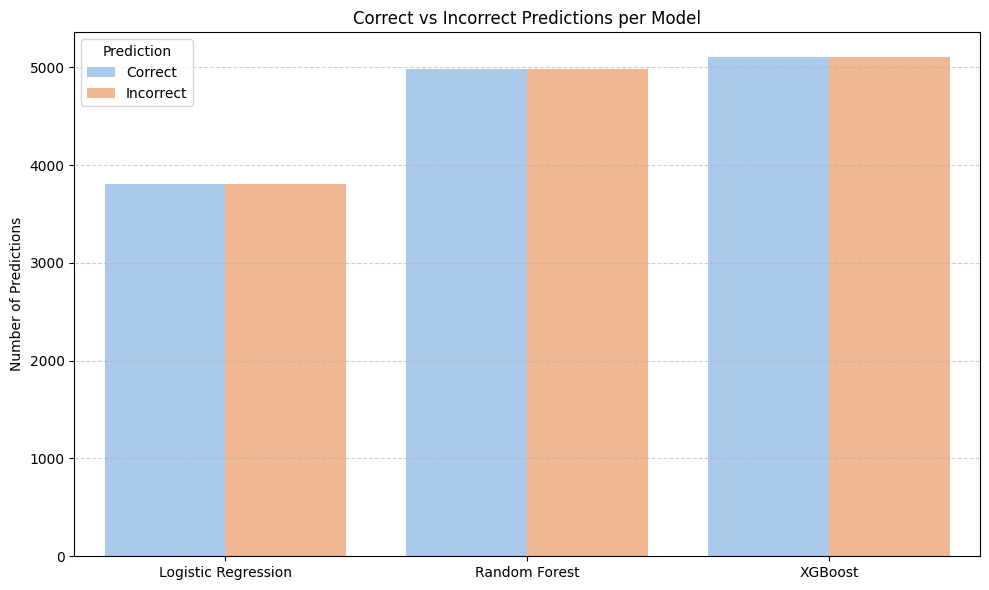

In [113]:
#combined df
stacked_accuracy_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Logistic Regression", "Random Forest", "Random Forest", "XGBoost", "XGBoost"],
    "Prediction": ["Correct", "Incorrect", "Correct", "Incorrect", "Correct", "Incorrect"],
    "Count": [
        comparison_df["Correct (Logistic Regression)"].sum(),
        (comparison_df["Correct (Logistic Regression)"]).sum(),
        comparison_df["Correct (Random Forest)"].sum(),
        (comparison_df["Correct (Random Forest)"]).sum(),
        comparison_df["Correct (XGBoost)"].sum(),
        (comparison_df["Correct (XGBoost)"]).sum()
    ]
})

#visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=stacked_accuracy_df, x="Model", y="Count", hue="Prediction", palette="pastel")
plt.title("Correct vs Incorrect Predictions per Model")
plt.ylabel("Number of Predictions")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Prediction")
plt.tight_layout()
plt.show()

Feature importance of the random forest and xgboost models - to capture the importance of each input feature.

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3865052698.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df.head(25), x="Importance", y="Feature", palette="Blues_r")


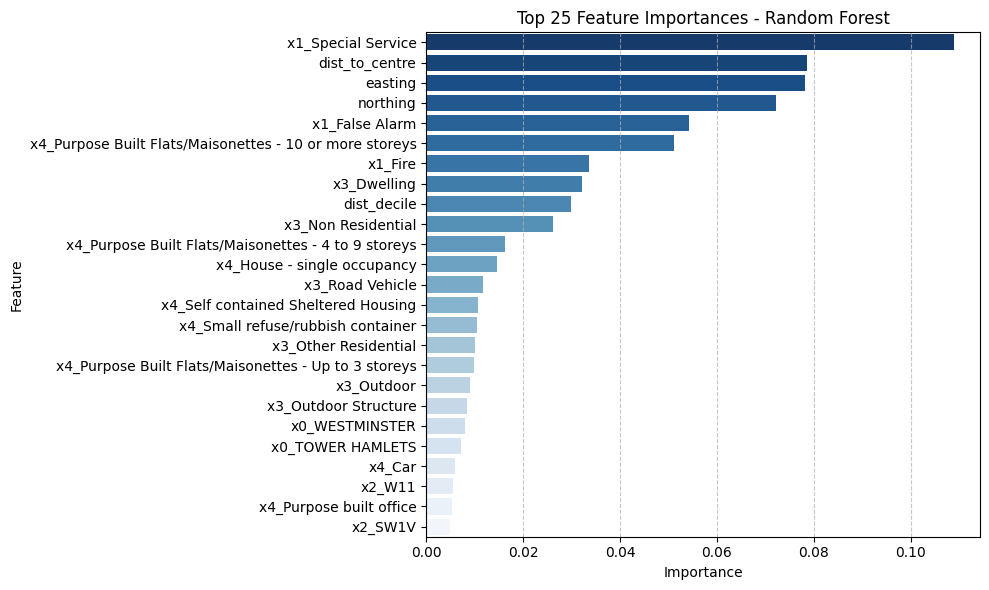

C:\Users\Bradley\AppData\Local\Temp\ipykernel_26520\3865052698.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importance_df.head(25), x="Importance", y="Feature", palette="Purples_r")


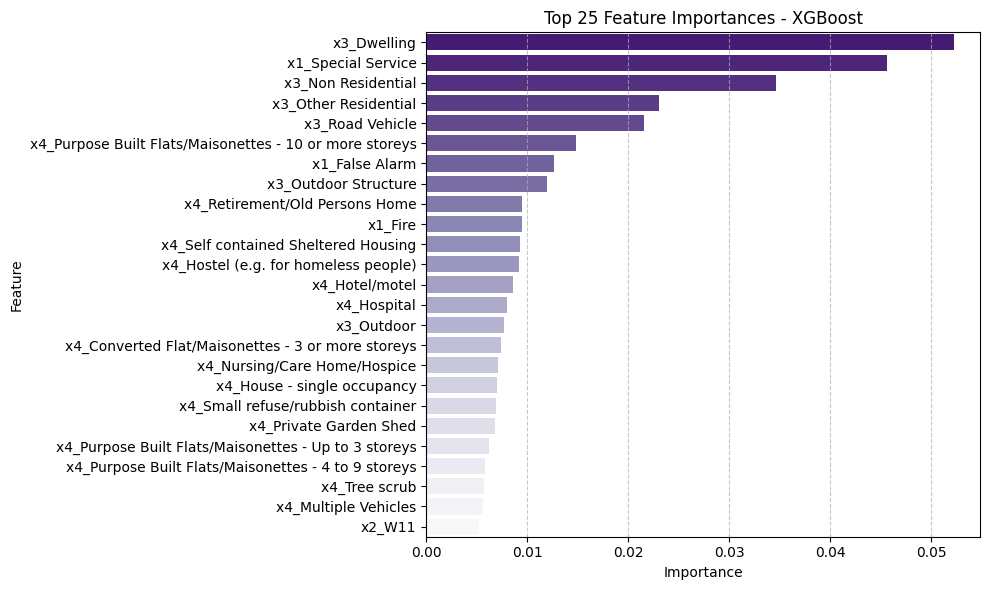

In [114]:
importances_rf = best_rf.named_steps["classifier"].feature_importances_

#XGBoost
importances_xgb = best_xgb.feature_importances_

#Get feature names
feature_names = (preprocessor.named_transformers_["num"].feature_names_in_.tolist() +
                 preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out().tolist())

#Create DataFrames
rf_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

xgb_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances_xgb
}).sort_values(by="Importance", ascending=False)

#Plot Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df.head(25), x="Importance", y="Feature", palette="Blues_r")
plt.title("Top 25 Feature Importances - Random Forest")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Plot XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_importance_df.head(25), x="Importance", y="Feature", palette="Purples_r")
plt.title("Top 25 Feature Importances - XGBoost")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [115]:
#Extract feature importances
importances_rf = best_rf.named_steps["classifier"].feature_importances_
importances_xgb = best_xgb.feature_importances_

#Feature names after preprocessing
feature_names = (preprocessor.named_transformers_["num"].feature_names_in_.tolist() +
                 preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out().tolist())

#Create a combined DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Random Forest": importances_rf,
    "XGBoost": importances_xgb
})

#Melt for easier plotting with seaborn
importance_melted = importance_df.melt(id_vars="Feature", var_name="Model", value_name="Importance")

#Sort by total average importance
importance_df["Average Importance"] = (importance_df["Random Forest"] + importance_df["XGBoost"]) / 2
top_features = importance_df.sort_values(by="Average Importance", ascending=False).head(25)["Feature"]
importance_melted_top = importance_melted[importance_melted["Feature"].isin(top_features)]


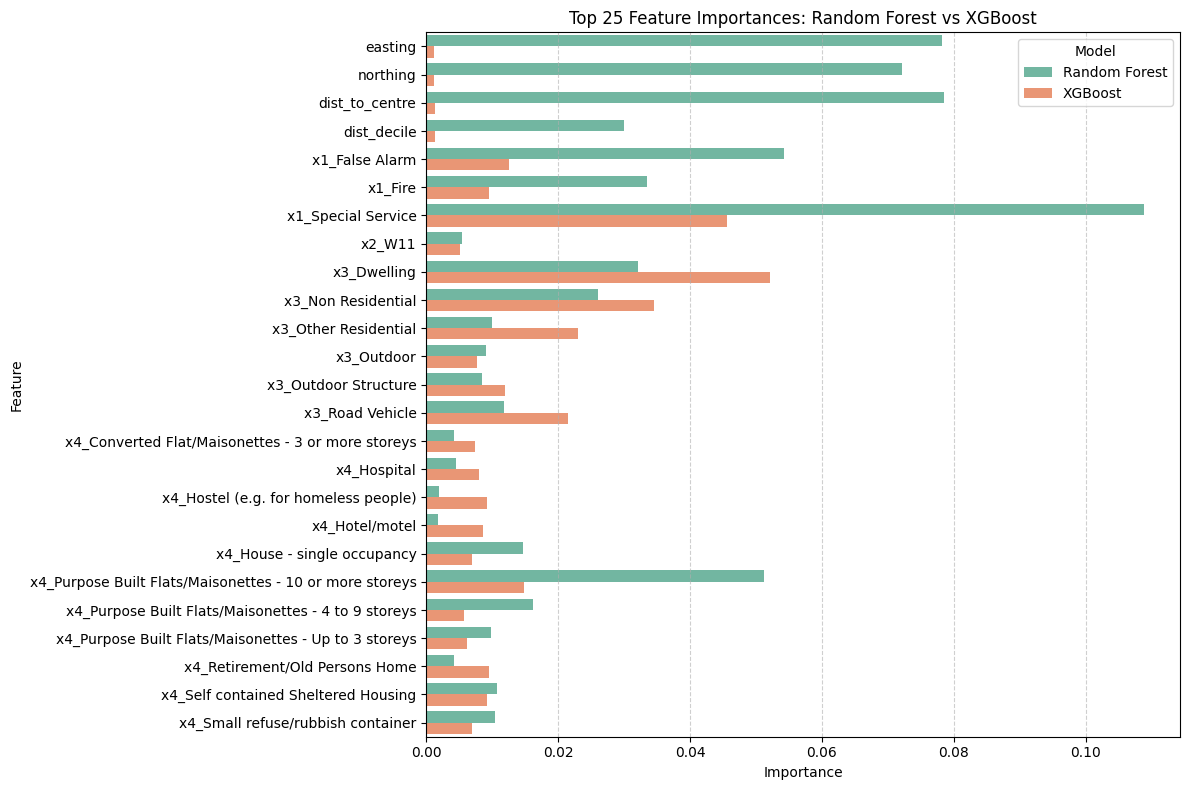

In [116]:
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_melted_top, x="Importance", y="Feature", hue="Model", palette="Set2")
plt.title("Top 25 Feature Importances: Random Forest vs XGBoost")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [117]:
importance_corr_df = importance_df[["Random Forest", "XGBoost"]]

#Compute the correlation matrix
corr_matrix = importance_corr_df.corr()

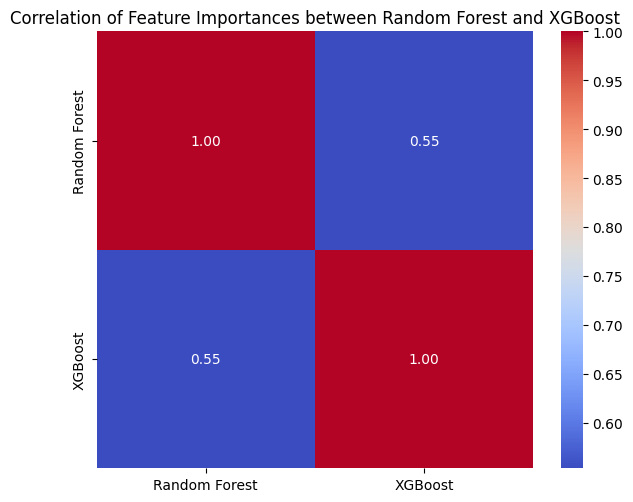

In [118]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation of Feature Importances between Random Forest and XGBoost")
plt.tight_layout()
plt.show()

The correlation of 0.51 shows that they agree on some features and differ on others hence can stack them to see the performance. using the stackingclassifier, with logistic regression and random forest as the base models and XGboost as the metalearner.

c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [14:25:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score      support  \
1              0.844533  0.913137  0.877496  3730.000000   
2              0.711670  0.735225  0.723256  2115.000000   
3              0.642857  0.118110  0.199557   381.000000   
4+             0.469027  0.302857  0.368056   175.000000   
accuracy       0.790345  0.790345  0.790345     0.790345   
macro avg      0.667022  0.517332  0.542091  6401.000000   
weighted avg   0.778362  0.790345  0.772252  6401.000000   

                                               Model  
1             Stacked Model[(LogReg + RF) - XGBoost]  
2             Stacked Model[(LogReg + RF) - XGBoost]  
3             Stacked Model[(LogReg + RF) - XGBoost]  
4+            Stacked Model[(LogReg + RF) - XGBoost]  
accuracy      Stacked Model[(LogReg + RF) - XGBoost]  
macro avg     Stacked Model[(LogReg + RF) - XGBoost]  
weighted avg  Stacked Model[(LogReg + RF) - XGBoost]  


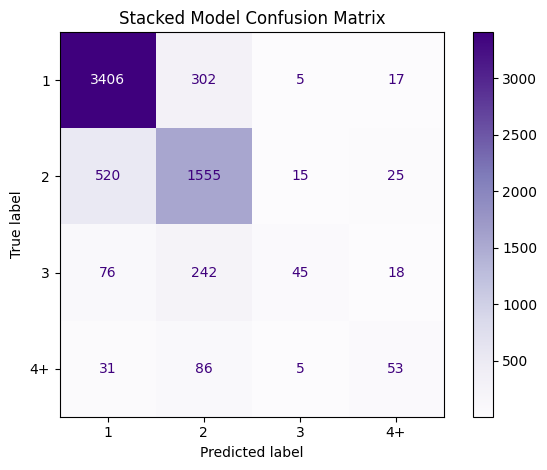

In [119]:
from sklearn.ensemble import StackingClassifier

#Define stacking model
stacking_clf = StackingClassifier(
    estimators=[
        ("logreg", best_logreg),
        ("rf", best_rf)
    ],
    final_estimator=XGBClassifier(
        objective="multi:softmax",
        num_class=len(le.classes_),
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=42
    ),
    cv=5,
    n_jobs=-1
)

#Fit stacking model
stacking_clf.fit(X_train, y_train)

#Predict with stacking model
y_pred_stack = stacking_clf.predict(X_test)

#Evaluate stacking model
results_stack = evaluate_and_report(y_test, y_pred_stack, le, "Stacked Model[(LogReg + RF) - XGBoost]")

print(results_stack)

#Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stack), display_labels=le.classes_).plot(cmap="Purples")
plt.title("Stacked Model Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


In [120]:
#Collect evaluation reports for all models
from sklearn.metrics import accuracy_score

#Predictions
y_pred_log = best_logreg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test_proc)  
y_pred_stack = stacking_clf.predict(X_test)

#Calculate metrics (Accuracy, F1, Recall, Precision)
from sklearn.metrics import f1_score, precision_score, recall_score

metrics_summary = {
    "Model": [],
    "Accuracy (%)": [],
    "Macro F1-score": [],
    "Macro Precision": [],
    "Macro Recall": []
}

model_preds = {
    "Logistic Regression (Tuned)": y_pred_log,
    "Random Forest (Tuned)": y_pred_rf,
    "XGBoost (Tuned)": y_pred_xgb,
    "Stacked Model [(LogReg + RF) - XGBoost]": y_pred_stack
}

for model_name, preds in model_preds.items():
    metrics_summary["Model"].append(model_name)
    metrics_summary["Accuracy (%)"].append(accuracy_score(y_test, preds) * 100)
    metrics_summary["Macro F1-score"].append(f1_score(y_test, preds, average='macro'))
    metrics_summary["Macro Precision"].append(precision_score(y_test, preds, average='macro'))
    metrics_summary["Macro Recall"].append(recall_score(y_test, preds, average='macro'))

#Create DataFrame
metrics_df = pd.DataFrame(metrics_summary)

print("Model Comparison Summary")
display(metrics_df.round(3))


Model Comparison Summary


Model  Accuracy (%)  Macro F1-score  \
0              Logistic Regression (Tuned)        59.444           0.403   
1                    Random Forest (Tuned)        77.910           0.560   
2                          XGBoost (Tuned)        79.722           0.545   
3  Stacked Model [(LogReg + RF) - XGBoost]        79.035           0.542   

   Macro Precision  Macro Recall  
0            0.433         0.486  
1            0.576         0.567  
2            0.730         0.509  
3            0.667         0.517

# ***PART C: Attribution-Bradley Marimbire***

# **MODELLING FOR FIRST PUMP ARRIVING ATTENDANCE TIME**

From research conducted observing Fire Facts - Incident response times 2017  page - 5

The 'first_response_secs' is meant to be recorded when the brigade arrives at the incident scene, not after the incident has been dealt with.
The key evidence for this is the statement about "some times are wrong (due to failure to use the fire engine recording systems at the appropriate time)," which indicates that crews are supposed to record their arrival time as it happens. The system relies on fire crews activating recording systems when they arrive, but they sometimes fail to do this at the correct moment.
This timing is critical for measuring response performance, and the paragraph acknowledges that errors in the recording process lead to some data being excluded from our dataframe.

So, the 'first_pump_arriving_attendance_time' represents when the first fire engine physically arrived at the incident location, not when they finished handling the incident. This information is important as it provides important information about how we will deal with target leakage within the machine learning problem statement.

I applied capping (Winsorizing) to the outliers in the response time data for the lower end of my IQR for 'first_pump_arriving_attendance_time'

In [121]:
df_model = df.copy()

Borough-Based Imputation of Missing Values in avg_rt_in_bin
This code performs imputation of missing values in the avg_rt_in_bin column based on borough averages.
This approach preserves borough-specific patterns in the data while filling missing values with contextually relevant estimates.

rt_q, rt_resid and grid_id were dropped because 
rt_q is quantiles for heatmaps its the bins for the response times.
rt_resid doesnt provide to any meaningful information to my model.
grid_id doesnt provide any meaningful information to my model.

In [122]:
df_model.drop(columns=["rt_q"], inplace=True)#drop yes

df_model.drop(columns=["rt_resid"], inplace=True)#drop yes

df_model.drop(columns=["grid_id"], inplace=True)#drop yes

In [123]:
borough_avg_times = df_model.groupby('borough_name')['avg_rt_in_bin'].mean()

In [124]:
missing_mask = (df_model['avg_rt_in_bin'].isna()) & (~df_model['borough_name'].isna())

In [125]:
print(f"Total rows with missing station values: {missing_mask.sum()}")

Total rows with missing station values: 10


In [126]:
# Calculating the average of avg_rt_in_bin for each borough
borough_avg_times = df_model.groupby('borough_name')['avg_rt_in_bin'].mean()

# Creating a mask for rows where avg_rt_in_bin is missing but borough_name is present
missing_mask = (df_model['avg_rt_in_bin'].isna()) & (~df_model['borough_name'].isna())

# Imputing missing values using the borough's average time
imputed_count = 0
for borough in df_model['borough_name'].unique():
    # Skip if borough is NaN
    if pd.isna(borough):
        continue
        
    # Creating borough-specific mask
    borough_mask = missing_mask & (df_model['borough_name'] == borough)
    
    # Skipping if no rows match
    if borough_mask.sum() == 0:
        continue
        
    # Calculating average time for this borough directly
    borough_data = df_model[df_model['borough_name'] == borough]
    avg_time = borough_data['avg_rt_in_bin'].mean()
    
    # Skipping if average time is NaN
    if pd.isna(avg_time):
        print(f"Borough '{borough}': No valid average time available for avg_rt_in_bin")
        continue
    
    # Imputing the missing values for this borough
    df_model.loc[borough_mask, 'avg_rt_in_bin'] = avg_time
    
    # Counting the number of imputed values
    borough_imputed = borough_mask.sum()
    imputed_count += borough_imputed
    print(f"Borough '{borough}': Imputed {borough_imputed} values with average of {avg_time:.2f}")

print(f"\nTotal imputed avg_rt_in_bin values: {imputed_count}")

Borough 'NEWHAM': Imputed 1 values with average of 315.99
Borough 'BEXLEY': Imputed 1 values with average of 350.21
Borough 'HAMMERSMITH AND FULHAM': Imputed 1 values with average of 298.60
Borough 'KINGSTON UPON THAMES': Imputed 2 values with average of 321.17
Borough 'BRENT': Imputed 1 values with average of 343.04
Borough 'HARINGEY': Imputed 2 values with average of 318.44
Borough 'RICHMOND UPON THAMES': Imputed 2 values with average of 340.45

Total imputed avg_rt_in_bin values: 10


Text(0, 0.5, 'Frequency')

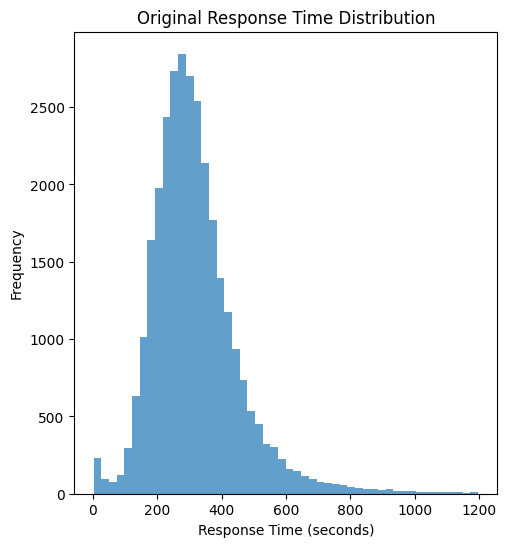

In [127]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_model['first_response_secs'], bins=50, alpha=0.7)
plt.title('Original Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

In [128]:
very_low_values = df_model[df_model['first_response_secs'] < 60]
print(f"Number of suspiciously fast responses (< 60 seconds): {len(very_low_values)}")
print(very_low_values['first_response_secs'].value_counts().sort_index())

Number of suspiciously fast responses (< 60 seconds): 355
first_response_secs
2.0     13
3.0     48
4.0     33
5.0     12
6.0     15
7.0      7
8.0     10
9.0      6
10.0     6
11.0     4
12.0     7
13.0    11
14.0     9
15.0     5
16.0     8
17.0     1
18.0     4
19.0     3
20.0     6
21.0     3
22.0     2
23.0     5
24.0     4
25.0     7
26.0     8
27.0     7
28.0     5
29.0     4
30.0     7
32.0     4
33.0     4
34.0     4
35.0     6
36.0     4
37.0     2
38.0     1
39.0     2
40.0     6
41.0    13
42.0     4
43.0     1
44.0     1
46.0     5
47.0     2
48.0     2
49.0     1
50.0     2
51.0     3
53.0     3
54.0     6
55.0     4
56.0     3
57.0     3
58.0     4
59.0     5
Name: count, dtype: int64


https://data.london.gov.uk/dataset/incident-response-times-fire-facts
page - 20

The quickest fire brigade reponse time ever recorded was 1 minute according to fire facts, thus the min_realistic_time lower boundary time set was 60 seconds

There are still response times under 60 seconds this is usually unrealistic for a fire brigade to attend, thus this issue is addressed by removing these outlier values, these response times could have been put inplace due to data entry issues as a result they will be removed.

steps:
A minimum realistic time was set to 60 seconds as this was an absolute minimum feasible response time in seconds.
Capping was only applied to the lower end and upper values were unchanged.

In [129]:
min_realistic_time = 60

df_model['first_pump_arriving_attendance_time_capped'] = df_model['first_response_secs'].clip(
    lower=min_realistic_time
)

A maximum response time of 1196 seconds or lower (19.9 minutes) is absolutely reasonable for fire brigade responses. This is within the expected range for real-world emergency services, especially:

- For incidents in remote locations
- During high traffic periods
- When resources are stretched due to multiple simultaneous incidents
- In areas with challenging access

In [130]:
print(f"Original range: {df_model['first_response_secs'].min()} to {df_model['first_response_secs'].max()}")
print(f"Capped range: {df_model['first_pump_arriving_attendance_time_capped'].min()} to {df_model['first_pump_arriving_attendance_time_capped'].max()}")

Original range: 2.0 to 1196.0
Capped range: 60.0 to 1196.0


Text(0, 0.5, 'Frequency')

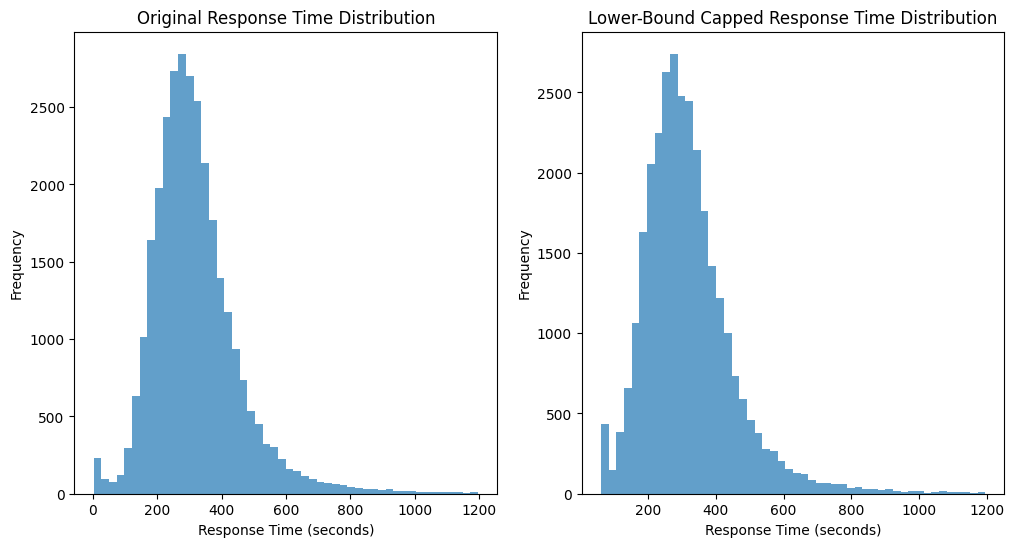

In [131]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_model['first_response_secs'], bins=50, alpha=0.7)
plt.title('Original Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_model['first_pump_arriving_attendance_time_capped'], bins=50, alpha=0.7)
plt.title('Lower-Bound Capped Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

Outliers for were not removed for num_pumps as the lowest value is 1.0 and the highest is 7.0 which are realistic numbers for incidents.
Outliers for were not removed for num_of_stations as the lowest value is 1.0 and the highest is 6.0 which are realistic numbers number of stations with pumps attending an incident.

The quickest fire brigade response time ever recorded was 3 minutes and 46 seconds within the UK; however, using additional documentation, we concluded that the events recorded might have been documented when fire brigades were driving out already in the scene and were called to attend events so we concluded the most realistic earliest time they could have to arrive would have been 1 minute, thus capping was applied to remove values lower than 60 seconds to reflect real-world scenario's.

The longest response time for second_pump_arriving_attendance_time was 1195 seconds, which is a realistic response time; because of this, ranges above the 75th percentile were not removed. These are true outliers, and removing them would introduce bias into the project.

In [132]:

df_model.drop(columns=["first_response_secs"], inplace=True)


df_model.rename(columns={"first_pump_arriving_attendance_time_capped": "first_pump_arriving_attendance_time"}, inplace=True)


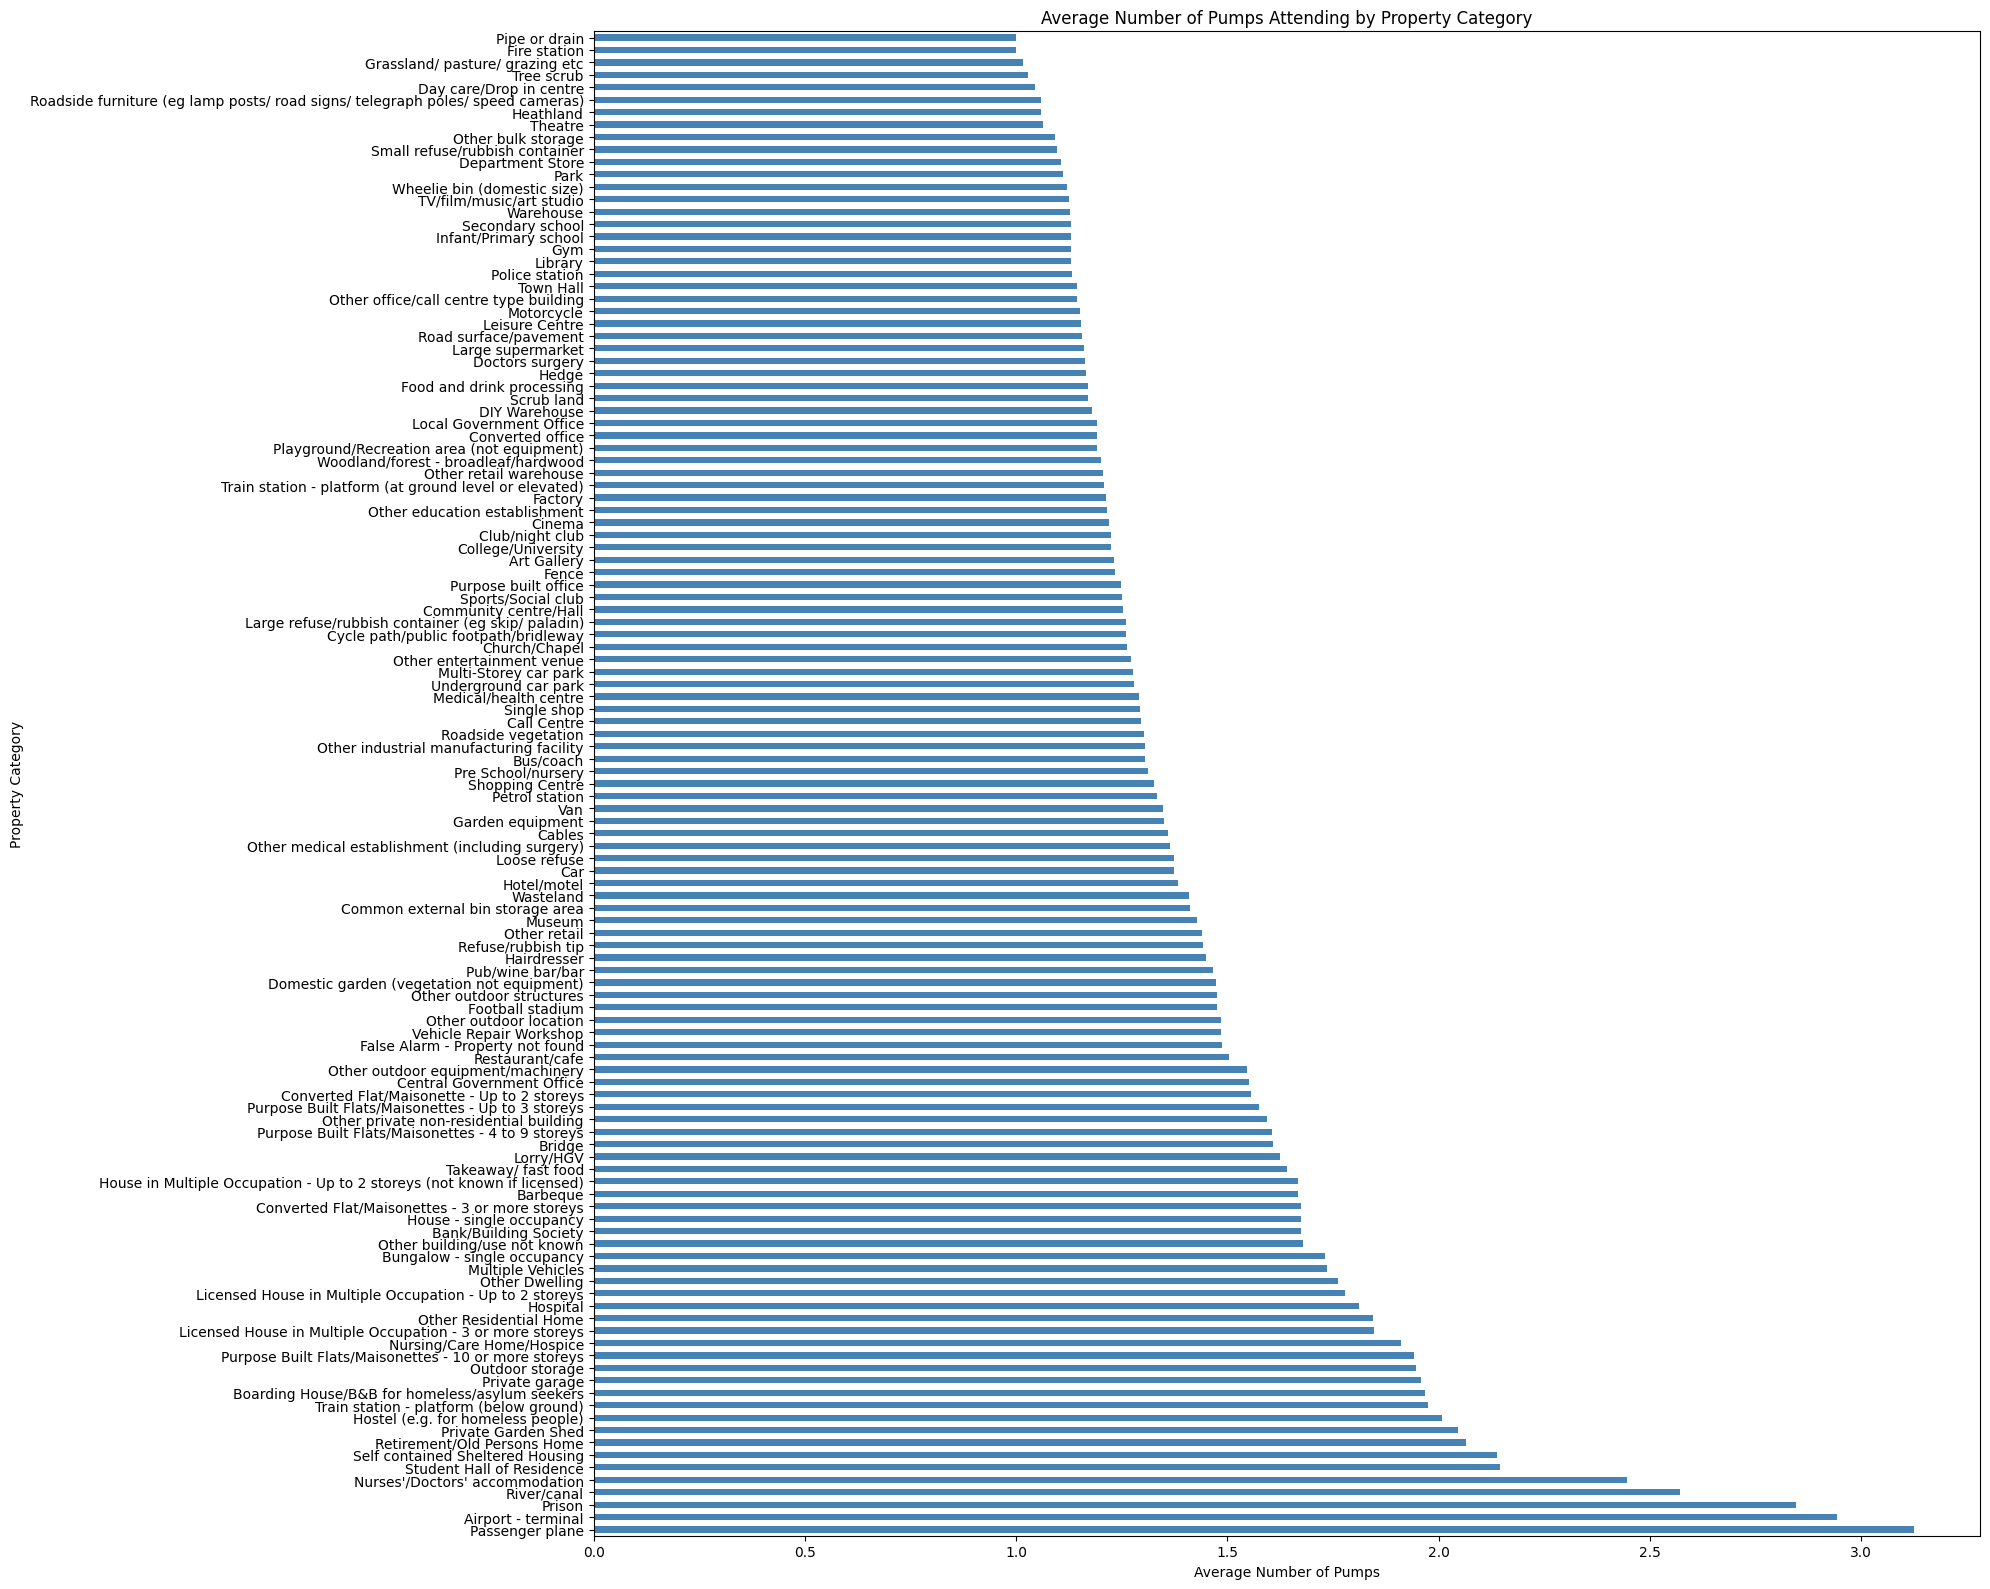

Minimum average pumps: 1.00
Maximum average pumps: 3.12
Range: 2.12
Standard deviation: 0.40


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the average pumps by property category
avg_pumps = df_model.groupby('property_type')['n_pumps'].mean().sort_values(ascending=False)

# Counting  the incidents by property category
counts = df_model.groupby('property_type').size()

# We are Keeping only categories with at least 20 incidents for reliability
avg_pumps = avg_pumps[counts >= 20]


plt.figure(figsize=(20, 16))
avg_pumps.plot(kind='barh', color='steelblue')
plt.title('Average Number of Pumps Attending by Property Category')
plt.xlabel('Average Number of Pumps')
plt.ylabel('Property Category')
plt.tight_layout()
plt.savefig('property_pump_relationship.png')
plt.show()


print(f"Minimum average pumps: {avg_pumps.min():.2f}")
print(f"Maximum average pumps: {avg_pumps.max():.2f}")
print(f"Range: {avg_pumps.max() - avg_pumps.min():.2f}")
print(f"Standard deviation: {avg_pumps.std():.2f}")

https://data.london.gov.uk/dataset/incident-response-times-fire-facts

From research conducted observing Fire Facts - Incident response times 2017  page - 34
Feature Engineering Based on Historical Response Standards

Rationale for Area Density and Property Usage Classifications
When analysing London Fire Brigade response times, we identified a critical need to incorporate information about property types and area characteristics into our predictive model. This decision was informed by historical context from the Fire Facts 2017 report, which revealed how response time standards were previously structured in London.

Historical Context

Prior to the Fire and Rescue Services Act 2004, London was divided into four risk categories (A-D) that determined target response times:
"London was subdivided into four categories of risk (Categories A-D) based on government guidance on property characteristics. Category A represented the highest risk to property, and Category D represented the lowest risk to property."
These categories created significant disparities in service levels:
"For example, an area within Category A, which constituted 2 per cent of London in geographical terms immediately prior to the removal of these standards in 2004, demanded a fast response (five minutes for the first two appliances and a third appliance within eight minutes). By contrast, parts of London in Category D, which constituted 17 per cent of London geographically, could expect to wait up to 20 minutes for a response from one fire engine."
Furthermore, these categories were primarily based on property types and commercial activity:
"Category A areas were generally focussed on parts of inner London which had main shopping centre and business buildings, theatres and other entertainment venues or high-risk industrial property; significantly, there was no mention of housing in the Government's 'A' risk category."

Implementation of New Features

Although these categorical standards were officially replaced after 2004 with a principle of "equal entitlement," the physical infrastructure (station locations) established under the previous system would still impact current response patterns:
"London's emergency response and station locations were configured to provide a faster response in central and inner London than outer London, and there was a cluster of resources in the inner London boroughs."
To capture these historical influences, we engineered two new features:
Area Density Classification: Categorising locations into high-density commercial, high-density residential, low-density residential, and industrial areas to mirror the historical risk categorisation system.
Property Usage: Classifying properties as commercial, residential, industrial, or educational to reflect the different priority levels historically assigned to various property types.
These features help our model account for the legacy effects of historical resource allocation, which likely continue to influence response times today. Even with policy changes emphasising equal service, the physical distribution of fire stations and resources would retain imprints of the previous system, making these features valuable predictors for our response time model.

By incorporating these engineered features, our model can better understand and predict response time variations across different parts of London, accounting for modern operational practices and historical infrastructure patterns.

In [ ]:
def classify_area_density(property_type):

    if pd.isna(property_type):
        return "Unknown"
    
    # High-density commercial properties
    high_density_commercial = [
        'Purpose built office', 'Single shop', 'Restaurant/cafe', 'Hospital', 
        'Large supermarket', 'Warehouse', 'Converted office', 'Hotel/motel', 
        'Pub/wine bar/bar', 'Medical/health centre', 'Gym', 'Leisure Centre',
        'Shopping Centre', 'Community centre/Hall', 'Factory', 'Fire station',
        'Takeaway/ fast food', 'Library', 'Church/Chapel', 'Food and drink processing',
        'Club/night club', 'Airport - terminal', 'Police station', 'Department Store',
        'Other retail', 'Petrol station', 'Doctors surgery', 'TV/film/music/art studio',
        'Train station', 'Bank/Building Society', 'Sports/Social club', 'DIY Warehouse',
        'Underground car park', 'Vehicle Repair Workshop', 'Cinema', 'Theatre',
        'Central Government Office', 'Museum', 'Multi-Storey car park', 'Call Centre',
        'Art Gallery', 'Local Government Office', 'Football stadium', 'Town Hall',
        'Other office/call centre type building', 'Telephone exchange', 'Dental surgery',
        'Laundrette', 'Exhibition Centre'
    ]
    
    # High-density residential properties
    high_density_residential = [
        'Purpose Built Flats/Maisonettes - 4 to 9 storeys',
        'Purpose Built Flats/Maisonettes - 10 or more storeys',
        'Converted Flat/Maisonettes - 3 or more storeys',
        'Retirement/Old Persons Home',
        'Nursing/Care Home/Hospice',
        'Hostel (e.g. for homeless people)',
        'Student Hall of Residence',
        'Licensed House in Multiple Occupation - 3 or more storeys',
        'House in Multiple Occupation - 3 or more storeys',
        'Unlicensed House in Multiple Occupation - 3 or more storeys',
        'Boarding House/B&B for homeless/asylum seekers',
        'Prison'
    ]
    
    # Low-density residential properties
    low_density_residential = [
        'House - single occupancy',
        'Purpose Built Flats/Maisonettes - Up to 3 storeys',
        'Self contained Sheltered Housing',
        'Converted Flat/Maisonette - Up to 2 storeys',
        'Licensed House in Multiple Occupation - Up to 2 storeys',
        'Bungalow - single occupancy',
        'House in Multiple Occupation - Up to 2 storeys',
        'Unlicensed House in Multiple Occupation - Up to 2 storeys',
        'Other Dwelling',
        'Caravan/Mobile home (permanent dwelling)',
        'Houseboat (permanent dwelling)'
    ]
    
    # Industrial areas
    industrial_areas = [
        'Warehouse', 'Factory', 'Food and drink processing', 'Other industrial manufacturing facility',
        'Other bulk storage', 'Engineering manufacturing plant', 'Other industrial processing plant',
        'Electricity power station', 'Recycling plant', 'Printing works', 'Laboratory/research Establishment',
        'Electrical warehouse', 'Water works', 'Sewage works', 'Manufacturing assembly plant',
        'Chemical plant', 'Bulk gas storage', 'Bulk hazardous materials storage', 'Bulk oil storage',
        'Distillery plant', 'Animal products processing plant'
    ]
    
    for keyword in high_density_commercial:
        if keyword.lower() in property_type.lower():
            return "High-density commercial"
            
    for keyword in high_density_residential:
        if keyword.lower() in property_type.lower():
            return "High-density residential"
            
    for keyword in low_density_residential:
        if keyword.lower() in property_type.lower():
            return "Low-density residential"
            
    for keyword in industrial_areas:
        if keyword.lower() in property_type.lower():
            return "Industrial area"
            
    return "Other_density"

In [ ]:
def classify_commercial_residential(property_type):

    if pd.isna(property_type):
        return "Unknown"
    
    # Commercial properties
    commercial = [
        'Purpose built office', 'Single shop', 'Restaurant/cafe', 'Large supermarket', 
        'Converted office', 'Hotel/motel', 'Pub/wine bar/bar', 'Medical/health centre', 
        'Gym', 'Leisure Centre', 'Shopping Centre', 'Community centre/Hall',
        'Takeaway/ fast food', 'Library', 'Church/Chapel', 'Club/night club', 
        'Airport - terminal', 'Department Store', 'Other retail', 'Petrol station', 
        'Doctors surgery', 'TV/film/music/art studio', 'Bank/Building Society', 
        'Sports/Social club', 'DIY Warehouse', 'Cinema', 'Theatre', 'Call Centre',
        'Art Gallery', 'Other entertainment venue', 'Hairdresser', 
        'Other office/call centre type building', 'Sports pavilion/shower block/changing facility',
        'Swimming Pool', 'Post office', 'Veterinary surgery', 'Indoor Market'
    ]
    
    # Residential properties
    residential = [
        'House - single occupancy', 'Purpose Built Flats/Maisonettes',
        'Self contained Sheltered Housing', 'Converted Flat/Maisonettes',
        'Converted Flat/Maisonette', 'Retirement/Old Persons Home',
        'Nursing/Care Home/Hospice', 'Hostel', 'Student Hall of Residence',
        'Licensed House in Multiple Occupation', 'Bungalow', 
        'Nurses\'/Doctors\' accommodation', 'Other Residential Home',
        'House in Multiple Occupation', 'Unlicensed House in Multiple Occupation',
        'Children\'s Home', 'Boarding House/B&B', 'Youth hostel',
        'Caravan/Mobile home (permanent dwelling)', 'Houseboat (permanent dwelling)'
    ]
    
    # Educational properties
    educational = [
        'Infant/Primary school', 'Secondary school', 'College/University',
        'Pre School/nursery', 'Other education establishment'
    ]
    
    # Industrial properties
    industrial = [
        'Warehouse', 'Factory', 'Food and drink processing', 'Other industrial manufacturing facility',
        'Other bulk storage', 'Engineering manufacturing plant', 'Other industrial processing plant',
        'Electricity power station', 'Recycling plant', 'Printing works', 'Laboratory/research Establishment',
        'Water works', 'Sewage works', 'Manufacturing assembly plant',
        'Chemical plant', 'Bulk gas storage', 'Bulk oil storage', 'Distillery plant'
    ]
    
    # Match property_type with category
    for keyword in commercial:
        if keyword.lower() in property_type.lower():
            return "Commercial"
            
    for keyword in residential:
        if keyword.lower() in property_type.lower():
            return "Residential"
            
    for keyword in educational:
        if keyword.lower() in property_type.lower():
            return "Educational"
            
    for keyword in industrial:
        if keyword.lower() in property_type.lower():
            return "Industrial"
            
    return "Other_property"

In [136]:
df_model['area_density_class'] = df_model['property_type'].apply(classify_area_density)
df_model['property_usage'] = df_model['property_type'].apply(classify_commercial_residential)

We decided to remove the property_type column with high cardinality and choose to keep the more manageable property_category column. This decision supports our modelling goals for the following reasons:

Dimensionality Reduction
The property_type column contains 258 distinct values, which introduces considerable complexity when encoded for machine learning.

Model Interpretability
Models trained on fewer, more meaningful categories are generally more interpretable. Using property_category rather than individual property types makes it easier to understand how different classes of properties affect response times.

In [137]:
df_model.drop(columns=["property_type"], inplace=True)


In [138]:
borough_response_times = df_model.groupby('borough_name')['first_pump_arriving_attendance_time'].median().reset_index()
borough_response_times = borough_response_times.sort_values('first_pump_arriving_attendance_time')

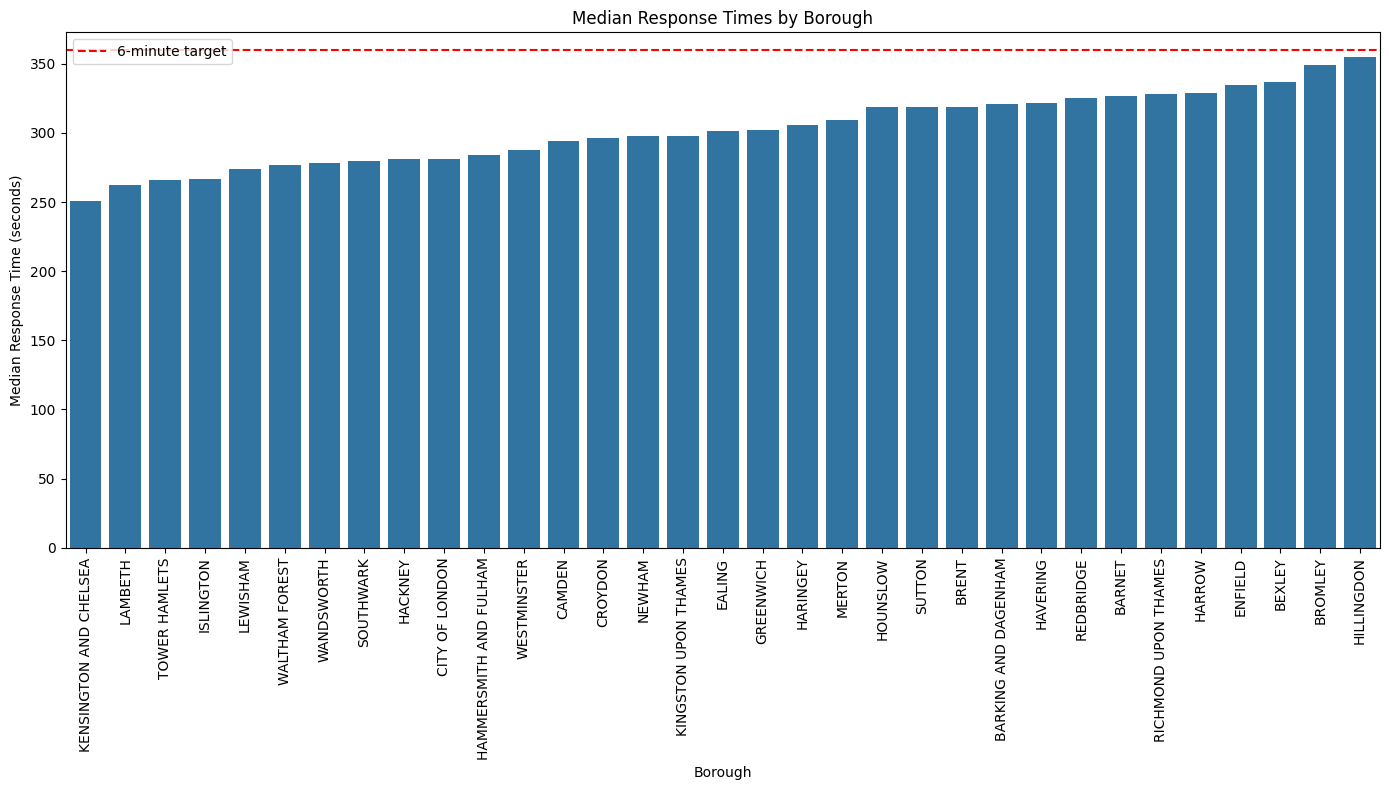

In [139]:
plt.figure(figsize=(14, 8))
sns.barplot(x='borough_name', y='first_pump_arriving_attendance_time', data=borough_response_times)
plt.title('Median Response Times by Borough')
plt.xlabel('Borough')
plt.ylabel('Median Response Time (seconds)')
plt.axhline(y=360, color='r', linestyle='--', label='6-minute target')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

When analysing our London Fire Brigade (LFB) dataset, we encountered rows where the responding station (first_response_station) had missing values. For these cases, we needed to impute appropriate values for the response times (first_pump_arriving_attendance_time) to maintain the integrity of our analysis.

Borough-Based Imputation: Fire brigade response times are primarily influenced by geographic location. Using the median response time for each borough, we acknowledged that incidents in the same area typically experience similar response times, regardless of which specific station responds.

We chose to use the median rather than the mean because response time data often contains outliers (unusually long response times due to exceptional circumstances). The median provides a more robust measure of central tendency that isn't skewed by these extreme values.

This imputation method allows us to fill in missing response times with values that are likely to be close to what they would have been in reality,

In [140]:
borough_median_times = df_model.groupby('borough_name')['first_pump_arriving_attendance_time'].median()

In [141]:
missing_mask = (df_model['first_response_station'].isna()) & (~df_model['borough_name'].isna())

In [142]:
# Counting how many values we'll impute
print(f"Total rows with missing station values: {missing_mask.sum()}")

Total rows with missing station values: 1585


Any instances of false alarms were changed to alarms because fire brigades respond to alarms and, at the time of dispatch, would only know that they're responding to an alarm, not a false alarm.

In [143]:

df_model['incident_group'] = df_model['incident_group'].replace('False Alarm', 'Alarm')

In [144]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32004 entries, 0 to 32003
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   address_qualifier                    32004 non-null  object        
 1   borough_name                         32004 non-null  object        
 2   easting                              32004 non-null  float64       
 3   first_response_station               30419 non-null  object        
 4   incident_group                       32004 non-null  object        
 5   incident_station_ground              32004 non-null  object        
 6   northing                             32004 non-null  float64       
 7   n_pumps                              32004 non-null  float64       
 8   n_stations                           32004 non-null  float64       
 9   postcode_district                    32004 non-null  object        
 10  property_c

In [145]:
df_model['call_datetime'] = pd.to_datetime(df_model['call_datetime'])

Used cyclical encoding to preserve the circular nature of the days of the week:
It preserves the circular nature of the week. With regular encoding, the model would see Sunday (6) and Monday (0) as far apart when they are consecutive days.
The sine and cosine components together completely capture the cyclical pattern, allowing the model to learn seasonal effects more easily.

In [146]:
# Cyclical encoding for day of week
df_model['dow_sin'] = np.sin(2 * np.pi * df_model['call_datetime'].dt.dayofweek/7)
df_model['dow_cos'] = np.cos(2 * np.pi * df_model['call_datetime'].dt.dayofweek/7) 

In [147]:
df_model['is_weekend'] = df_model['call_datetime'].dt.dayofweek >= 5

In [148]:

df_model.drop(columns=["call_datetime"], inplace=True)

Cyclical encoding was used for the hour feature (from 0 to 23). Hours have a clear cyclical pattern, where 23:00 and 0:00 are adjacent times, not 23 hours apart, as linear encoding would suggest.
Given that we already have hour_of_call extracted as a numerical value from 0-23, I applied cyclical encoding to this column:

In [149]:
# Cyclical encoding for hour
df_model['hour_sin'] = np.sin(2 * np.pi * df_model['call_hour']/24)
df_model['hour_cos'] = np.cos(2 * np.pi * df_model['call_hour']/24)

perform cyclic encoding on our hour_of_week column, you need to convert these values into sine and cosine components. This is particularly useful for cyclical features like hours, days, or months where the values wrap around (e.g., hour 0 is close to hour 23).
Given that our values appear to be "hour of week" (which typically would range from 0-167 for 24 hours × 7 days)

In [150]:


max_value = 168  # 24 hours * 7 days
df_model['hour_of_week_sin'] = np.sin(2 * np.pi * df_model['hour_of_week'] / max_value)
df_model['hour_of_week_cos'] = np.cos(2 * np.pi * df_model['hour_of_week'] / max_value)

In [151]:
df_model.drop(columns=["hour_of_week","call_hour"], inplace=True)

We removed stop_code_description this is because, incident_group column provides are higher level abstraction 

In [152]:
df_model.drop(columns=["stop_code_description"], inplace=True) 

Adding easting and northing coordinates for all fire stations

In [153]:
df_model['first_response_station'].unique()

array(['Euston', 'Stratford', nan, 'Ealing', 'Battersea', 'Poplar',
       'Orpington', 'Tooting', 'Enfield', 'Hillingdon', 'Sidcup',
       'Tottenham', 'Stoke Newington', 'Heston', 'Chiswick', 'Fulham',
       'Eltham', 'Wimbledon', 'Norbury', 'Edmonton', 'Woodside',
       'Kentish Town', 'Surbiton', 'Peckham', 'Brixton', 'Croydon',
       'West Hampstead', 'Bethnal Green', 'Old Kent Road', 'Kingston',
       'Hendon', 'Shoreditch', 'Finchley', 'Barnet', 'Hainault',
       'Leytonstone', 'East Ham', 'Lambeth', 'Bromley', 'Whitechapel',
       'Willesden', 'Hammersmith', 'Heathrow', 'North Kensington',
       'Paddington', 'Lewisham', 'Stanmore', 'Hayes', 'Beckenham',
       'Plumstead', 'Holloway', 'Southall', 'Greenwich', 'Ruislip',
       'New Malden', 'Kensington', 'Hornsey', 'New Cross', 'Barking',
       'East Greenwich', 'Feltham', 'Ilford', 'Chingford', 'Chelsea',
       'Woodford', 'Homerton', 'Erith', 'Walthamstow', 'Soho',
       'Wallington', 'Bexley', 'Park Royal', 'Clap

We created a new column that calculates the distance between fire stations and incident locations using the Euclidean distance formula with the easting and northing coordinates.
We did this by utilising the external source: https://gridreferencefinder.com/
The easting and northing coordinates of where the station is located were captured by utilising our postcode columns within our dataset and using the source Gridreferencefinder to convert the postcode into an appropriate format(easting and northing).
We then calculated the distance between each incident and the responding station and outputted the distances in meters.

In [154]:
# Format used was: (easting, northing)}
station_coordinates = {
    'Euston': (529772, 182635),
    'Stratford': (539586, 184611),
    'Ealing': (516744, 180406),
    'Battersea': (527283, 175854),
    'Poplar': (537797, 180972),
    'Orpington': (547020, 165756),
    'Tooting': (527791, 172606),
    'Enfield': (534885, 197519),
    'Hillingdon': (507470, 182597),
    'Sidcup': (545665, 171879),
    'Tottenham': (533496, 189985),
    'Stoke Newington': (533424, 186541),
    'Heston': (515167, 176444),
    'Chiswick': (521096, 178471),
    'Fulham': (525008, 176918),
    'Eltham': (543176, 174419),
    'Wimbledon': (525527, 170048),
    'Norbury': (530748, 169235),
    'Edmonton': (533739, 193818),
    'Woodside': (534937, 167005),
    'Kentish Town': (528899, 185441),
    'Surbiton': (518514, 167286),
    'Peckham': (533584, 176741),
    'Brixton': (531432, 175548),
    'Croydon': (531995, 165038),
    'West Hampstead': (525375, 185219),
    'Bethnal Green': (535223, 182797),
    'Old Kent Road': (533778, 178203),
    'Kingston': (517844, 171226),
    'Hendon': (522813, 189265),
    'Shoreditch': (532990, 182596),
    'Finchley': (526205, 190359),
    'Barnet': (525610, 195833),
    'Hainault': (545718, 191773),
    'Leytonstone': (539346, 186598),
    'East Ham': (542802, 182508),
    'Lambeth': (530489, 178783),
    'Bromley': (540358, 169453),
    'Whitechapel': (534099, 181345),
    'Willesden': (522363, 184342),
    'Hammersmith': (523367, 178903),
    'Heathrow': (507134, 176819),
    'North Kensington': (524146, 181779),
    'Paddington': (526160, 181709),
    'Lewisham': (538131, 175010),
    'Stanmore': (518043, 190757),
    'Hayes': (508968, 178447),
    'Beckenham': (536834, 169498),
    'Plumstead': (545297, 178538),
    'Holloway': (530660, 186446),
    'Southall': (512938, 180399),
    'Greenwich': (538018, 176874),
    'Ruislip': (508548, 189105),
    'New Malden': (522166, 168126),
    'Kensington': (525717, 179778),
    'Hornsey': (529784, 189075),
    'New Cross': (535682, 176790),
    'Barking': (544989, 183280),
    'East Greenwich': (540490, 178392),
    'Feltham': (510336, 174756),
    'Ilford': (545075, 186911),
    'Chingford': (538296, 194208),
    'Chelsea': (527144, 178063),
    'Woodford': (540406, 191944),
    'Homerton': (535759, 185118),
    'Erith': (549872, 178498),
    'Walthamstow': (536740, 189736),
    'Soho': (529856, 180942),
    'Wallington': (529016, 164214),
    'Bexley': (549705, 175771),
    'Park Royal': (520345, 183328),
    'Clapham': (529230, 175676),
    'Hornchurch': (554004, 187415),
    'Plaistow': (541085, 182156),
    'Wembley': (517684, 185014),
    'Acton': (519701, 180170),
    'Mill Hill': (521714, 192157),
    'Wennington': (554164, 180931),
    'Dowgate': (532622, 180738),
    'Twickenham': (514887, 172005),
    'Millwall': (537136, 179834),
    'Sutton': (524666, 164923),
    'Shadwell': (535007, 180901),
    'Forest Hill': (536074, 173304),
    'Romford': (551345, 190507),
    'Islington': (531707, 184056),
    'Harrow': (513276, 189260),
    'Southgate': (529726, 194154),
    'Harold Hill': (554111.16, 191174.81),
    'Leyton': (537503, 186876),
    'Wandsworth': (525057, 174595),
    'Deptford': (536589, 178076),
    'Dockhead': (533980, 179738),
    'Dagenham': (549606, 186718),
    'Lee Green': (539975, 174951),
    'Mitcham': (527206, 168078),
    'West Norwood': (531822, 171395),
    'Richmond': (519243, 175674),
    'Biggin Hill': (541905, 159201),
    'Northolt': (513827, 185250),
    'Addington': (537728, 163196),
    'Purley': (530762, 160910),
    'Staines': (506435, 170860),
}

When analysing emergency response times, the physical distance between fire stations and incident locations is a critical factor. Our approach produced three powerful spatial features that significantly enhance our model's predictive capabilities while handling missing data.

Our implementation calculates three key distance-based features:

Distance to Responding Station: Measures how far the responding fire station was from the incident location
Distance to Nearest Station: Identifies the closest station to the incident, regardless of which one responded
Nearest Station Responded Flag: Indicates whether the closest station was the one that responded

Why we choose this approach
Preserving Data Integrity: Rather than removing rows with missing station information, we used the incident_station_ground column, which represents the station whose response area contains the incident location.

Geographical Reality: This substitution makes sense because incidents typically occur within the response area of their nearest station. Even if another station responded, the ground station provided a reasonable estimate for distance calculations.

Creates Features: The three distance-based features capture different aspects of response efficiency:
Actual travel distance for the responding engine.
Potential shortest response distance.
Whether optimal station allocation occurred.

Euclidean Efficiency: While not accounting for road networks, the straight-line Euclidean distance provides an efficient approximation that strongly correlates with actual travel distances in urban environments.

Calculating distance between incident and fire station in meters

In [155]:
# Function to calculate Euclidean distance with fallback to incident_station_ground
def calculate_distance(row, station_coords):
    # First try to use first_pump_arriving_deployed_from_station
    station = row['first_response_station']
    
    # If station is Unknown_station or NaN, use incident_station_ground instead
    if pd.isna(station) or station == "Unknown Station":
        station = row['incident_station_ground']
    
    # Checking to see if we have coordinates for this station
    if station not in station_coords:
        return np.nan
        
    station_easting, station_northing = station_coords[station]
    
    # Calculating Euclidean distance
    distance = np.sqrt(
        (row['easting'] - station_easting)**2 + 
        (row['northing'] - station_northing)**2
    )
    
    return distance

In [156]:
# Apply the function to create the new column
df_model['distance_to_station'] = df_model.apply(
    lambda row: calculate_distance(row, station_coordinates), 
    axis=1
)

Calculate distance to the nearest fire station in meters

In [157]:

def distance_to_nearest_station(row, station_coords):
    min_distance = float('inf')
    
    for station, (station_easting, station_northing) in station_coords.items():
        distance = np.sqrt(
            (row['easting'] - station_easting)**2 + 
            (row['northing'] - station_northing)**2
        )
        min_distance = min(min_distance, distance)
    
    return min_distance

In [158]:
# Applying function to create another column
df_model['distance_to_nearest_station'] = df_model.apply(
    lambda row: distance_to_nearest_station(row, station_coordinates), 
    axis=1
)

# handling Unknown_station cases
df_model['nearest_station_responded'] = df_model.apply(
    lambda row: row['distance_to_station'] == row['distance_to_nearest_station'] 
    if not pd.isna(row['distance_to_station']) else np.nan,
    axis=1
)

In [ ]:

print(f"Total rows: {len(df_model)}")
print(f"Rows with calculated distance_to_station: {df_model['distance_to_station'].notna().sum()}")
print(f"Rows with Unknown Station as first responding station: {(df_model['first_response_station'] == 'Unknown Station').sum()}")

Total rows: 32004
Rows with calculated distance_to_station: 32004
Rows with Unknown Station as first responding station: 0


Binary encoding for Is_weekend and nearest_station_responded in order my machine learning algorithms to interpret

In [160]:
df_model['is_weekend'] = df_model['is_weekend'].astype(int)
df_model['nearest_station_responded'] = df_model['nearest_station_responded'].astype(int)

In [161]:
from sklearn.preprocessing import OneHotEncoder

One hot encoded Property_category, area_density_class and property_usage

In [162]:
cols_to_encode = ['property_category','area_density_class', 'property_usage', 'incident_group']
df_model = pd.get_dummies(df_model, columns=cols_to_encode, prefix=cols_to_encode, drop_first=True)

# Converting all boolean columns to integers 1/0's

In [163]:

bool_columns = df_model.select_dtypes(include=['bool']).columns
for col in bool_columns:
    df_model[col] = df_model[col].astype(int)

postcode_district was removed because it infers the same information as borough_name. This column has 292 distinct values; thus, when binned, most of these postcode districts would belong to a particular borough, and the column borough name already exists. Thus, converting this column into 292 binary columns creates a very sparse matrix when utilising one-hot encoding and dramatically increases dimensionality.

In [164]:
df_model.drop(columns=["postcode_district"], inplace=True)

The address_qualifier column values indicate that it was filled after dispatch reached and confirmed the location. We cannot guarantee that it was available at dispatch (which is the information that we want the model to be trained on). This is a soft form of target leakage and would likely be benefit us if it was dropped. Let's first visualise the relationships of this column before dropping it

In [165]:
df_model.drop(columns=["address_qualifier"], inplace=True)

The special service type contains 69% missing values
Imputing (filling in) missing values for a categorical variable like "service type" would likely introduce significant bias. There's no reliable way to guess what type of service was used when no data exists.

In [166]:
df_model.drop(columns=["special_service_type"], inplace=True)

Splitting data into training and test

In [167]:
X = df_model.drop('first_pump_arriving_attendance_time', axis=1)
y = df_model['first_pump_arriving_attendance_time']

Applying log transformation to our target variable, Using log1p instead of log to handle zeros properly

- Plotting  the log-transformed distribution
- Plotting the original distribution

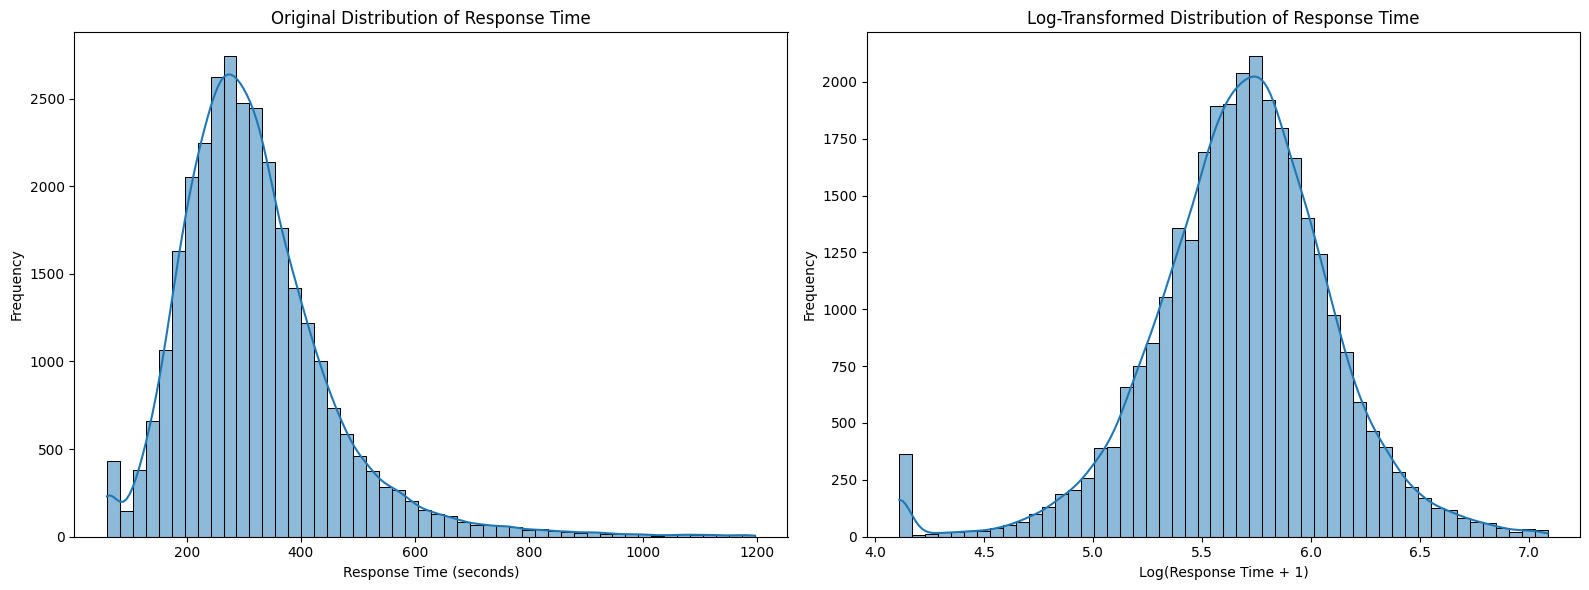

In [168]:
# Plotting  the log-transformed distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the original distribution
sns.histplot(y, bins=50, kde=True, ax=ax1)
ax1.set_title('Original Distribution of Response Time')
ax1.set_xlabel('Response Time (seconds)')
ax1.set_ylabel('Frequency')

# Applying log transformation
y_log = np.log1p(y)

# Plotting the log-transformed distribution
sns.histplot(y_log, bins=50, kde=True, ax=ax2)
ax2.set_title('Log-Transformed Distribution of Response Time')
ax2.set_xlabel('Log(Response Time + 1)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.3, random_state=42)

# Create training DataFrame for encoding
train = X_train.copy()
train['first_pump_arriving_attendance_time'] = np.expm1(y_train_log)  # Converting back for encoding

In [170]:
test = X_test.copy()
test['first_pump_arriving_attendance_time'] = np.expm1(y_test_log)

#### Imputing missing response times using the borough's median time

In [171]:
# Imputing missing response times using the borough's median time
imputed_count = 0
for borough in train['borough_name'].unique():
    # Skip if borough is NaN
    if pd.isna(borough):
        continue
        
    # Creating borough-specific mask
    borough_mask = missing_mask & (train['borough_name'] == borough)
    
    # Skipping if no rows match
    if borough_mask.sum() == 0:
        continue
        
    # Calculating median time for this borough directly
    borough_data = train[train['borough_name'] == borough]
    median_time = borough_data['first_pump_arriving_attendance_time'].median()
    
    # Skipping if median time is NaN
    if pd.isna(median_time):
        print(f"Borough '{borough}': No valid median time available")
        continue
    
    # Imputing the missing response times for this borough
    train.loc[borough_mask & train['first_pump_arriving_attendance_time'].isna(), 'first_pump_arriving_attendance_time'] = median_time
    
    # Counting the numbre imputed values
    borough_imputed = (borough_mask & train['first_pump_arriving_attendance_time'].isna()).sum()
    imputed_count += borough_imputed
    print(f"Borough '{borough}': Imputed {borough_imputed} response times with median of {median_time:.2f} seconds")

print(f"\nTotal imputed response times: {imputed_count}")

Borough 'CAMDEN': Imputed 0 response times with median of 294.00 seconds
Borough 'TOWER HAMLETS': Imputed 0 response times with median of 265.00 seconds
Borough 'HARINGEY': Imputed 0 response times with median of 306.00 seconds
Borough 'KINGSTON UPON THAMES': Imputed 0 response times with median of 302.00 seconds
Borough 'HOUNSLOW': Imputed 0 response times with median of 305.00 seconds
Borough 'ENFIELD': Imputed 0 response times with median of 333.00 seconds
Borough 'WANDSWORTH': Imputed 0 response times with median of 277.50 seconds
Borough 'BROMLEY': Imputed 0 response times with median of 358.00 seconds
Borough 'HAMMERSMITH AND FULHAM': Imputed 0 response times with median of 284.00 seconds
Borough 'WALTHAM FOREST': Imputed 0 response times with median of 280.00 seconds
Borough 'LEWISHAM': Imputed 0 response times with median of 275.00 seconds
Borough 'HILLINGDON': Imputed 0 response times with median of 349.50 seconds
Borough 'NEWHAM': Imputed 0 response times with median of 298.0

ensures that information from the test set doesn't leak into our model training or evaluation process.

we only calculated statistics (like medians) from our training data
and then applied the same transformation to both train and test sets
No information from the test set influences our imputation strategy

In [172]:
# calculating the median times from training data
borough_median_times = {}
for borough in train['borough_name'].unique():
    if pd.isna(borough):
        continue
    
    borough_data = train[train['borough_name'] == borough]
    median_time = borough_data['first_pump_arriving_attendance_time'].median()
    
    if not pd.isna(median_time):
        borough_median_times[borough] = median_time
        print(f"Borough '{borough}': Training median time = {median_time:.2f} seconds")

# Now we are using these precomputed medians for the test set
test_imputed_count = 0
for borough, median_time in borough_median_times.items():
    # Creating mask for missing values in this borough
    borough_mask = (test['borough_name'] == borough) & (test['first_pump_arriving_attendance_time'].isna())
    
    # Imputing the missing values using the training median
    test.loc[borough_mask, 'first_pump_arriving_attendance_time'] = median_time
    
    # Counting the imputed values
    test_imputed_count += borough_mask.sum()
    if borough_mask.sum() > 0:
        print(f"Borough '{borough}': Imputed {borough_mask.sum()} test values with training median of {median_time:.2f} seconds")

print(f"\nTotal imputed response times in test set: {test_imputed_count}")

Borough 'CAMDEN': Training median time = 294.00 seconds
Borough 'TOWER HAMLETS': Training median time = 265.00 seconds
Borough 'HARINGEY': Training median time = 306.00 seconds
Borough 'KINGSTON UPON THAMES': Training median time = 302.00 seconds
Borough 'HOUNSLOW': Training median time = 305.00 seconds
Borough 'ENFIELD': Training median time = 333.00 seconds
Borough 'WANDSWORTH': Training median time = 277.50 seconds
Borough 'BROMLEY': Training median time = 358.00 seconds
Borough 'HAMMERSMITH AND FULHAM': Training median time = 284.00 seconds
Borough 'WALTHAM FOREST': Training median time = 280.00 seconds
Borough 'LEWISHAM': Training median time = 275.00 seconds
Borough 'HILLINGDON': Training median time = 349.50 seconds
Borough 'NEWHAM': Training median time = 298.00 seconds
Borough 'BRENT': Training median time = 319.00 seconds
Borough 'RICHMOND UPON THAMES': Training median time = 327.00 seconds
Borough 'GREENWICH': Training median time = 302.00 seconds
Borough 'WESTMINSTER': Trai

#Checking if there are any remaining missing response times for missing stations

In [173]:

remaining_missing = (train['first_response_station'].isna()) & (train['first_pump_arriving_attendance_time'].isna())
print(f"Remaining missing response times for unknown stations: {remaining_missing.sum()}")

remaining_missing = (test['first_response_station'].isna()) & (test['first_pump_arriving_attendance_time'].isna())
print(f"Remaining missing response times for unknown stations: {remaining_missing.sum()}")

Remaining missing response times for unknown stations: 0
Remaining missing response times for unknown stations: 0


In [174]:
y_train = train['first_pump_arriving_attendance_time']
y_test = test['first_pump_arriving_attendance_time']

for 'first_response_station' column rows with missing values were replaced with Unknown_station.

In [175]:
train.loc[train['first_response_station'].isna(), 'first_response_station'] = 'Unknown Station'

In [176]:

test.loc[test['first_response_station'].isna(), 'first_response_station'] = 'Unknown Station'

Target encoding columns with high cardinality 

- This method captures the relationship between the categorical features and the target variable, potentially improving the model performance

In [177]:
!pip install category_encoders


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
import category_encoders as ce
# Specifying which categorical columns to encode
categorical_cols = ['borough_name', 'incident_station_ground', 'ward_name', 'first_response_station', ]

# Initialising the target encoder
encoder = ce.TargetEncoder(cols=categorical_cols)

# Separating features and target in our training data
X_train = train.drop('first_pump_arriving_attendance_time', axis=1)
y_train = train['first_pump_arriving_attendance_time']

# Fitting and transforming the training features
train_encoded = train.copy()
train_encoded[categorical_cols] = encoder.fit_transform(X_train, y_train)[categorical_cols]

# Transforming the test features using the same encoder
test_encoded = test.copy()
X_test = test.drop('first_pump_arriving_attendance_time', axis=1)
test_encoded[categorical_cols] = encoder.transform(X_test)[categorical_cols]

In [179]:

print(f"Encoded training data shape: {train_encoded.shape}")
print(f"Encoded test data shape: {test_encoded.shape}")

# Looking at the first few rows to see if the encoding worked
print("\nOriginal categorical columns:")
print(train[categorical_cols].head())
print("\nEncoded categorical columns:")
print(train_encoded[categorical_cols].head())

Encoded training data shape: (22402, 47)
Encoded test data shape: (9602, 47)

Original categorical columns:
               borough_name incident_station_ground      ward_name  \
18114                CAMDEN                  Euston     BLOOMSBURY   
28646         TOWER HAMLETS                Homerton       BOW EAST   
18586              HARINGEY                 Hornsey      NOEL PARK   
31190  KINGSTON UPON THAMES                Surbiton  SURBITON HILL   
30497              HOUNSLOW                 Feltham       HANWORTH   

      first_response_station  
18114                 Euston  
28646               Homerton  
18586        Unknown Station  
31190               Surbiton  
30497                Feltham  

Encoded categorical columns:
       borough_name  incident_station_ground   ward_name  \
18114    305.810684               304.608607  285.020586   
28646    279.258861               311.576132  344.889233   
18586    320.761905               313.400000  334.388943   
31190    321.60

Given the nature of our dataset, we decided to use tree-based algorithms (such as Random Forest or XGBoost) rather than traditional linear regression models.

My dataset contains:
- A large number of binary encoded columns (0s and 1s),
- One-hot encoded features representing categorical variables,
- Numerical mappings like Easting and Northing coordinates.
- Tree algorithms are better suited for this kind of data because:
- They can naturally handle many binary and one-hot features without requiring feature scaling or transformations.
- They are able to capture non-linear relationships and feature interactions automatically, which would be difficult for a linear regression model to learn without heavy manual feature engineering.
- They are more robust when dealing with irrelevant features, as trees can ignore unimportant splits during training.

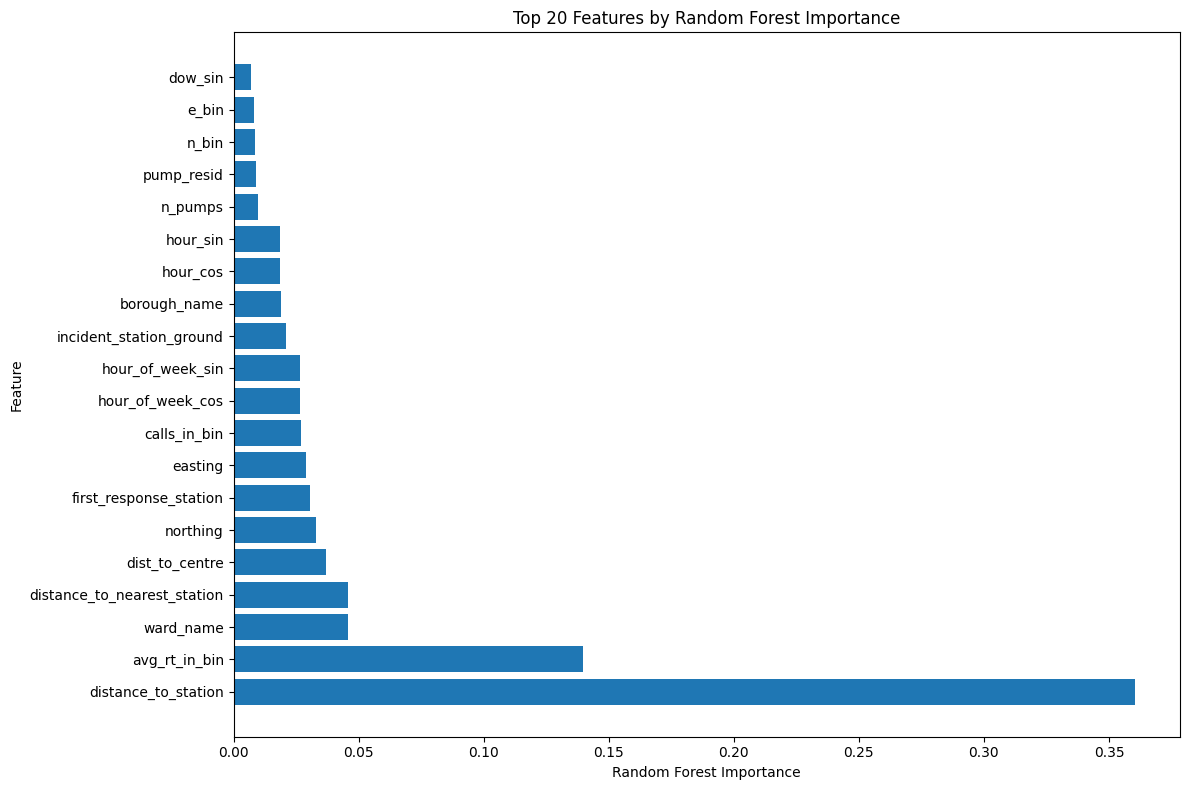

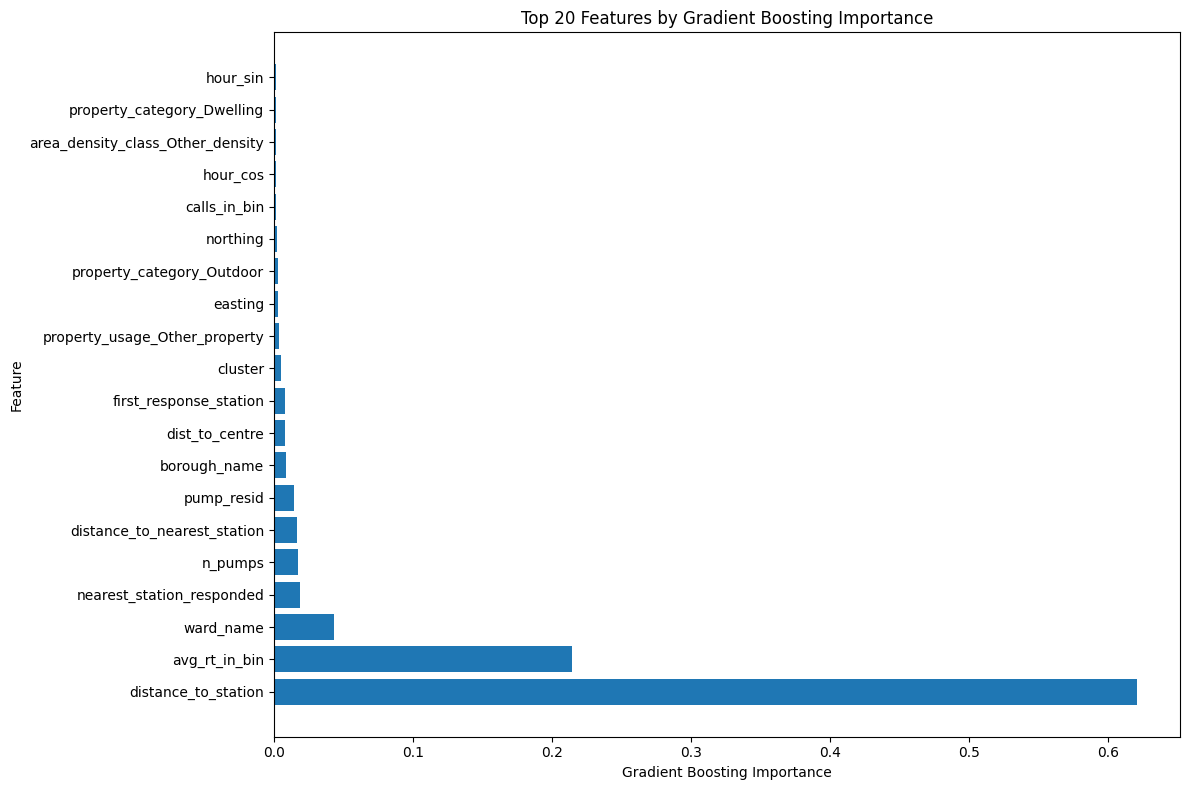

Top 20 features by different methods:
                  Random Forest                 Gradient Boosting
0           distance_to_station               distance_to_station
1                 avg_rt_in_bin                     avg_rt_in_bin
2                     ward_name                         ward_name
3   distance_to_nearest_station         nearest_station_responded
4                dist_to_centre                           n_pumps
5                      northing       distance_to_nearest_station
6        first_response_station                        pump_resid
7                       easting                      borough_name
8                  calls_in_bin                    dist_to_centre
9              hour_of_week_cos            first_response_station
10             hour_of_week_sin                           cluster
11      incident_station_ground     property_usage_Other_property
12                 borough_name                           easting
13                     hour_cos       

In [180]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X_train = train_encoded.drop('first_pump_arriving_attendance_time', axis=1)
y_train = train_encoded['first_pump_arriving_attendance_time']
X_test = test_encoded.drop('first_pump_arriving_attendance_time', axis=1)
y_test = test_encoded['first_pump_arriving_attendance_time']

# Training my Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Use all features, not just selected ones

# Getting the feature importances from Random Forest
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Trainning our Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)  # Use all features, not just selected ones

# Getting feature importances from Gradient Boosting
gb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualise Random Forest feature importances (top 20)
plt.figure(figsize=(12, 8))
plt.barh(rf_importance['Feature'][:20], rf_importance['Importance'][:20])
plt.xlabel('Random Forest Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Random Forest Importance')
plt.tight_layout()
plt.show()

# Visualising Gradient Boosting feature importances (top 20)
plt.figure(figsize=(12, 8))
plt.barh(gb_importance['Feature'][:20], gb_importance['Importance'][:20])
plt.xlabel('Gradient Boosting Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Gradient Boosting Importance')
plt.tight_layout()
plt.show()

# Comparing the top features selected by different methods
top_features = pd.DataFrame({
    'Random Forest': rf_importance['Feature'][:20].values,
    'Gradient Boosting': gb_importance['Feature'][:20].values
})

print("Top 20 features by different methods:")
print(top_features)


# Finding the common important features across methods
rf_top = set(rf_importance['Feature'][:20])
gb_top = set(gb_importance['Feature'][:20])

common_features = rf_top.intersection(gb_top)
print(f"\nFeatures important in both methods: {len(common_features)}")
print(common_features)

In [181]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [182]:
!pip install lightgbm


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [183]:
import xgboost as xgb
import lightgbm as lgb
import random

In [ ]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


X_train_selected = X_train[rf_importance['Feature']]
X_test_selected = X_test[rf_importance['Feature']]

#Trying multiple regression models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    #
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5),

    "XGBoost": xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1),

    "LightGBM": lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    
}

n_folds = 5

def rmsle_cv(model, X, y):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                    scoring="neg_mean_squared_error", 
                                    cv=kf))
    return rmse.mean()

results = {}

for name, model in models.items():
    # Cross-validated RMSE
    cv_rmse = rmsle_cv(model, X_train_selected, y_train)
    
    # Fitting the model
    model.fit(X_train_selected, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_selected)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "CV RMSE": cv_rmse,
        "Model": model,
        "Predictions": y_pred
    }
    
    print(f"{name}:")
    print(f"  MAE: {mae:.2f} seconds")
    print(f"  RMSE: {rmse:.2f} seconds")
    print(f"  CV RMSE: {cv_rmse:.2f} seconds")
    print(f"  R²: {r2:.4f}")
    print("-" * 50)

#Choosing the best model based on our preferred metric (e.g., lowest RMSE)
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = results[best_model_name]["Model"]
best_pred = results[best_model_name]["Predictions"]

print(f"\nBest model: {best_model_name}")
print(f"RMSE: {results[best_model_name]['RMSE']:.2f} seconds")


KeyboardInterrupt: 

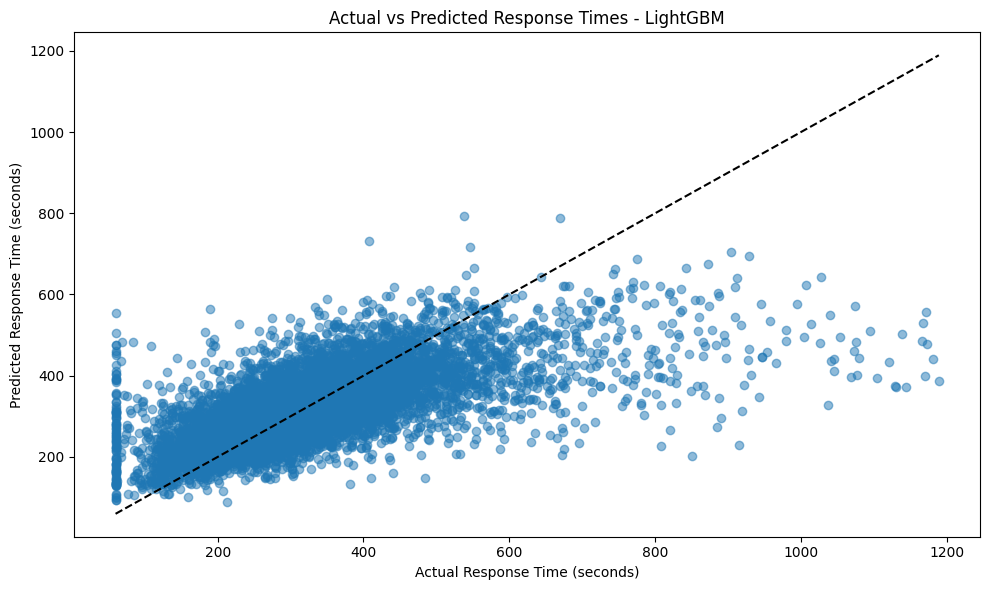

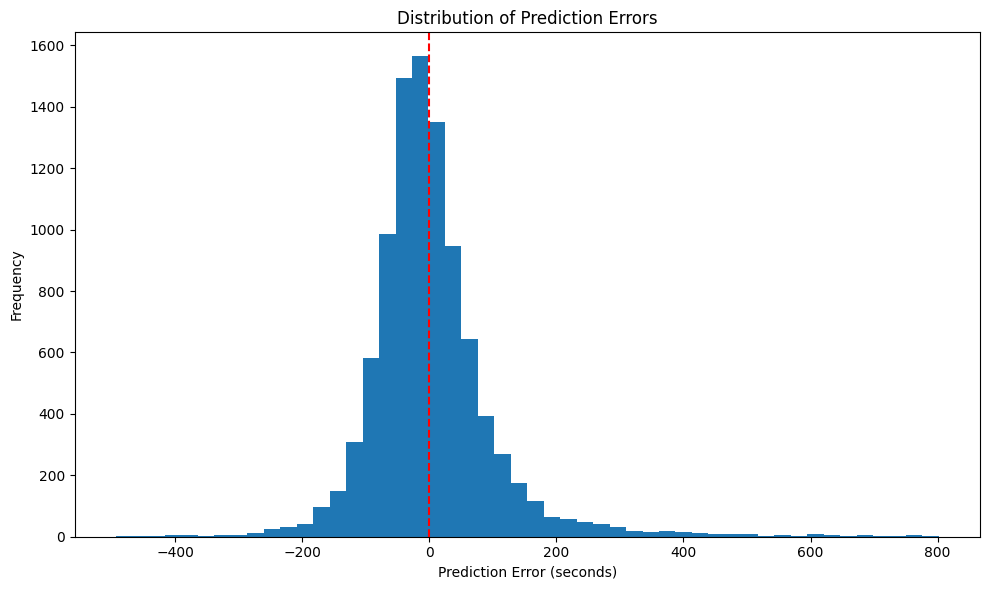

In [ ]:
# Visualising actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Response Time (seconds)')
plt.ylabel('Predicted Response Time (seconds)')
plt.title(f'Actual vs Predicted Response Times - {best_model_name}')
plt.tight_layout()
plt.show()

# Error distribution
errors = y_test - best_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

Stacking models
Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

Averaged base models class

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold, cross_val_score

#Defining the base models for stacking
base_models = [
    ('rf', models["Random Forest"]),
    ('gb', models["Gradient Boosting"]),
    ('xgb', models["XGBoost"]),
    ('lgb', models["LightGBM"])
]

# Defining the meta-learner we are going to use a simpler model
meta_learner = Ridge()

#  this step involves Creating and evaluate the stacking ensemble
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Creating the stacking model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=kf,  # Use same CV strategy as our evaluation
    n_jobs=-1  # Using all available cores
)

# Cross-validating performance
cv_rmse = rmsle_cv(stacking_model, X_train_selected, y_train)

# Fitting the stacking the model
stacking_model.fit(X_train_selected, y_train)

# Making the predictions
stacking_pred = stacking_model.predict(X_test_selected)

# Evaluating the predictions
stacking_mae = mean_absolute_error(y_test, stacking_pred)
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred))
stacking_r2 = r2_score(y_test, stacking_pred)

# Adding to the  results
results["Stacking Ensemble"] = {
    "MAE": stacking_mae,
    "RMSE": stacking_rmse,
    "R²": stacking_r2,
    "CV RMSE": cv_rmse,
    "Model": stacking_model,
    "Predictions": stacking_pred
}

print(f"Stacking Ensemble:")
print(f"  MAE: {stacking_mae:.2f} seconds")
print(f"  RMSE: {stacking_rmse:.2f} seconds") 
print(f"  CV RMSE: {cv_rmse:.2f} seconds")
print(f"  R²: {stacking_r2:.4f}")
print("-" * 50)

# Updating the  best model check
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = results[best_model_name]["Model"]
best_pred = results[best_model_name]["Predictions"]

print(f"\nBest model: {best_model_name}")
print(f"RMSE: {results[best_model_name]['RMSE']:.2f} seconds")



[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11